<a href="https://colab.research.google.com/github/ikram-data/Violet-WD-Hackathon/blob/van/Hackathon_target1%262_EDA%20(commented).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [1]:
# Import needed Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as st

In [ ]:
# Load the data
ieq = pd.read_csv('Data/inequality.csv',index_col=0)
vdem = pd.read_csv('Data/vdem.zip',index_col=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1234,3291,3292,3347,3349,3354,3357) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Target1
Growth rate of expenditure or income per capita

## Prep

In [ ]:
# Check datatypes
ieq.dtypes

Country Name                                                                            object
Country Code                                                                            object
Year                                                                                     int64
Continent                                                                               object
World Regions (UN SDG Definition)                                                       object
Regime Type (RoW Measure Definition)                                                    object
Population, total - SP.POP.TOTL                                                        float64
Access to electricity (% of population) - EG.ELC.ACCS.ZS                               float64
GDP (current US$) - NY.GDP.MKTP.CD                                                     float64
GDP per capita (current US$) - NY.GDP.PCAP.CD                                          float64
Renewable energy consumption (% of total final ene

In [ ]:
# Convert Year to categorical
ieq['Year'] = ieq['Year'].astype('category')

In [ ]:
# Check nulls
ieq.isnull().sum()

## But for basic EDA let's look at the raw data 

Country Name                                                                              0
Country Code                                                                              0
Year                                                                                      0
Continent                                                                                 2
World Regions (UN SDG Definition)                                                         2
Regime Type (RoW Measure Definition)                                                    211
Population, total - SP.POP.TOTL                                                         181
Access to electricity (% of population) - EG.ELC.ACCS.ZS                                 94
GDP (current US$) - NY.GDP.MKTP.CD                                                       41
GDP per capita (current US$) - NY.GDP.PCAP.CD                                            41
Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW

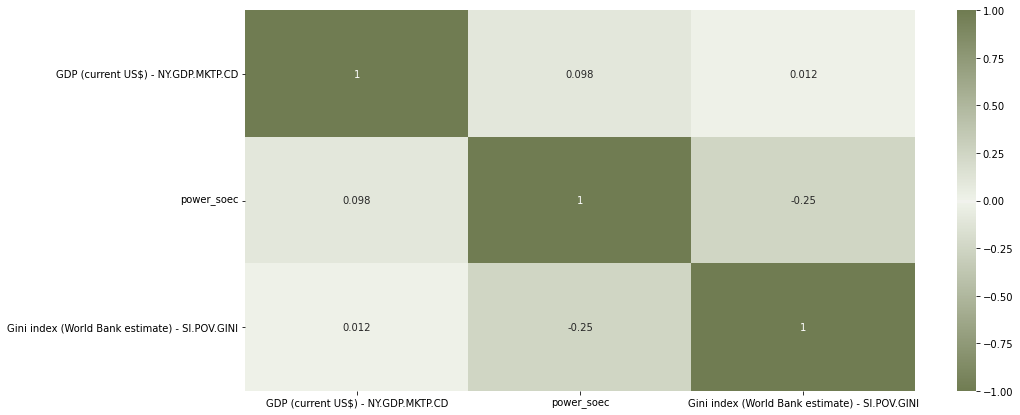

In [ ]:
# Check correlation of Target 1's contributing variables
tg1 = ieq[['Country Name','Year','Continent','World Regions (UN SDG Definition)',
           'Regime Type (RoW Measure Definition)','GDP (current US$) - NY.GDP.MKTP.CD',
           'power_soec','Gini index (World Bank estimate) - SI.POV.GINI']]
plt.figure(figsize=(15,7))
sym_col = sns.diverging_palette(100, 100, s=50, as_cmap=True)
sns.heatmap(tg1.corr(),annot=True, vmin=-1,vmax=1, center = 0,cmap=sym_col)
plt.show()

## As seen below there exists no high correlation

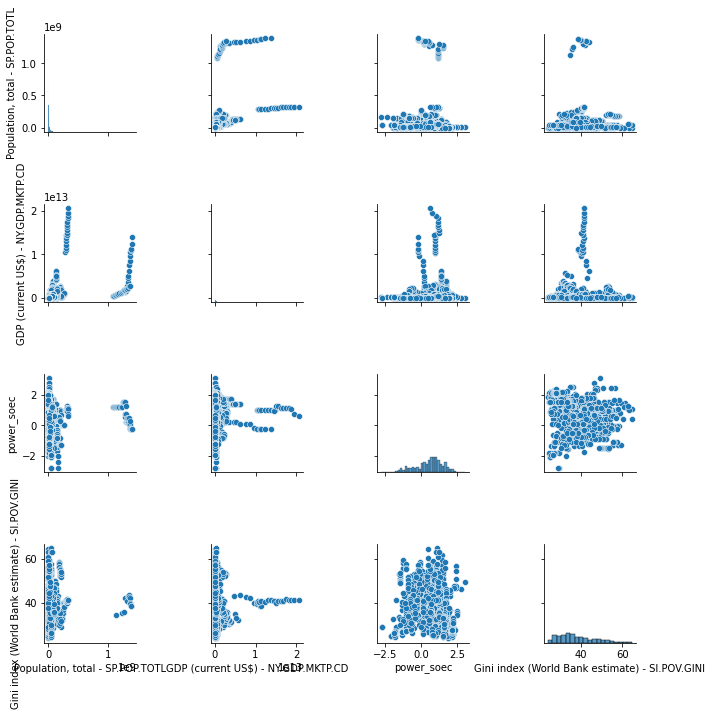

In [ ]:
# Take a look at the pairplots
sns.pairplot(tg1)

## GDP


### Overall

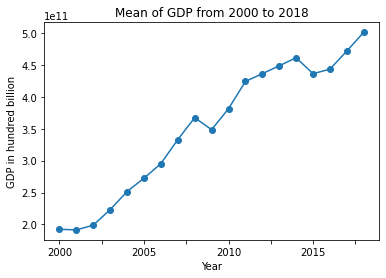

In [ ]:
# Overall GDP (mean) line graph
ieq.groupby('Year')['GDP (current US$) - NY.GDP.MKTP.CD'].mean().plot(linestyle='-', marker='o')
plt.title('Mean of GDP from 2000 to 2018')
plt.ylabel('GDP in hundred billion')
plt.show()

## Generally postive, with slight dips at 08-09 and 14-15

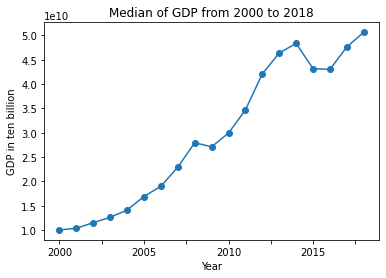

In [ ]:
# Overall GDP (median) line graph
ieq.groupby('Year')['GDP (current US$) - NY.GDP.MKTP.CD'].median().plot(linestyle='-', marker='o')
plt.title('Median of GDP from 2000 to 2018')
plt.ylabel('GDP in ten billion')
plt.show()

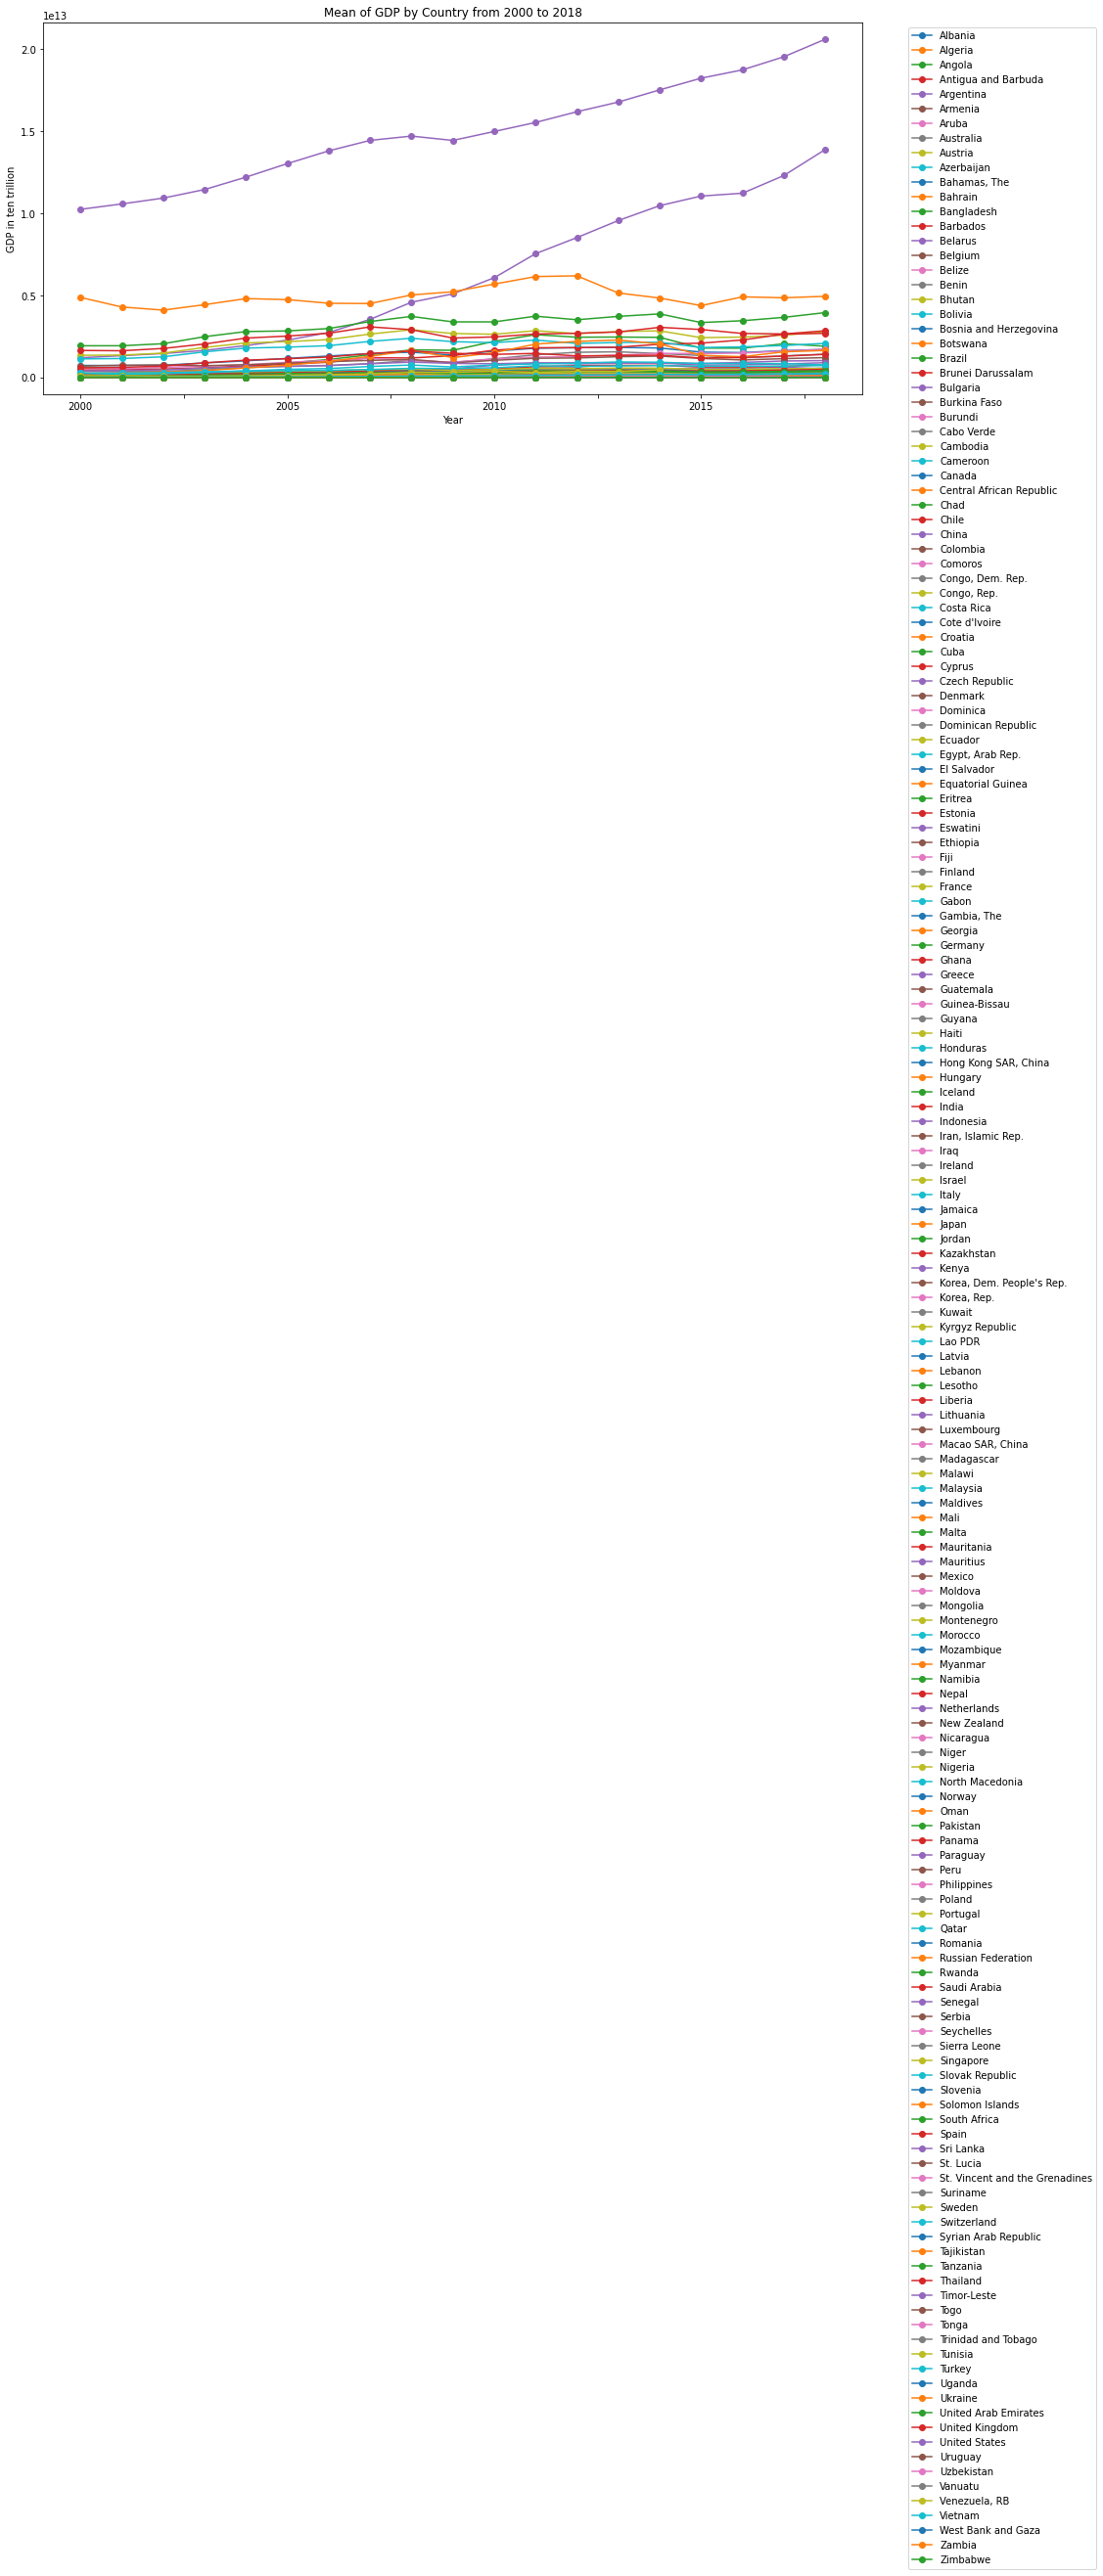

In [ ]:
# GDP (mean) by countries line graph 
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','Country Name'])['GDP (current US$) - NY.GDP.MKTP.CD'].mean().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Mean of GDP by Country from 2000 to 2018')
plt.ylabel('GDP in ten trillion')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## Needa fix the lengend

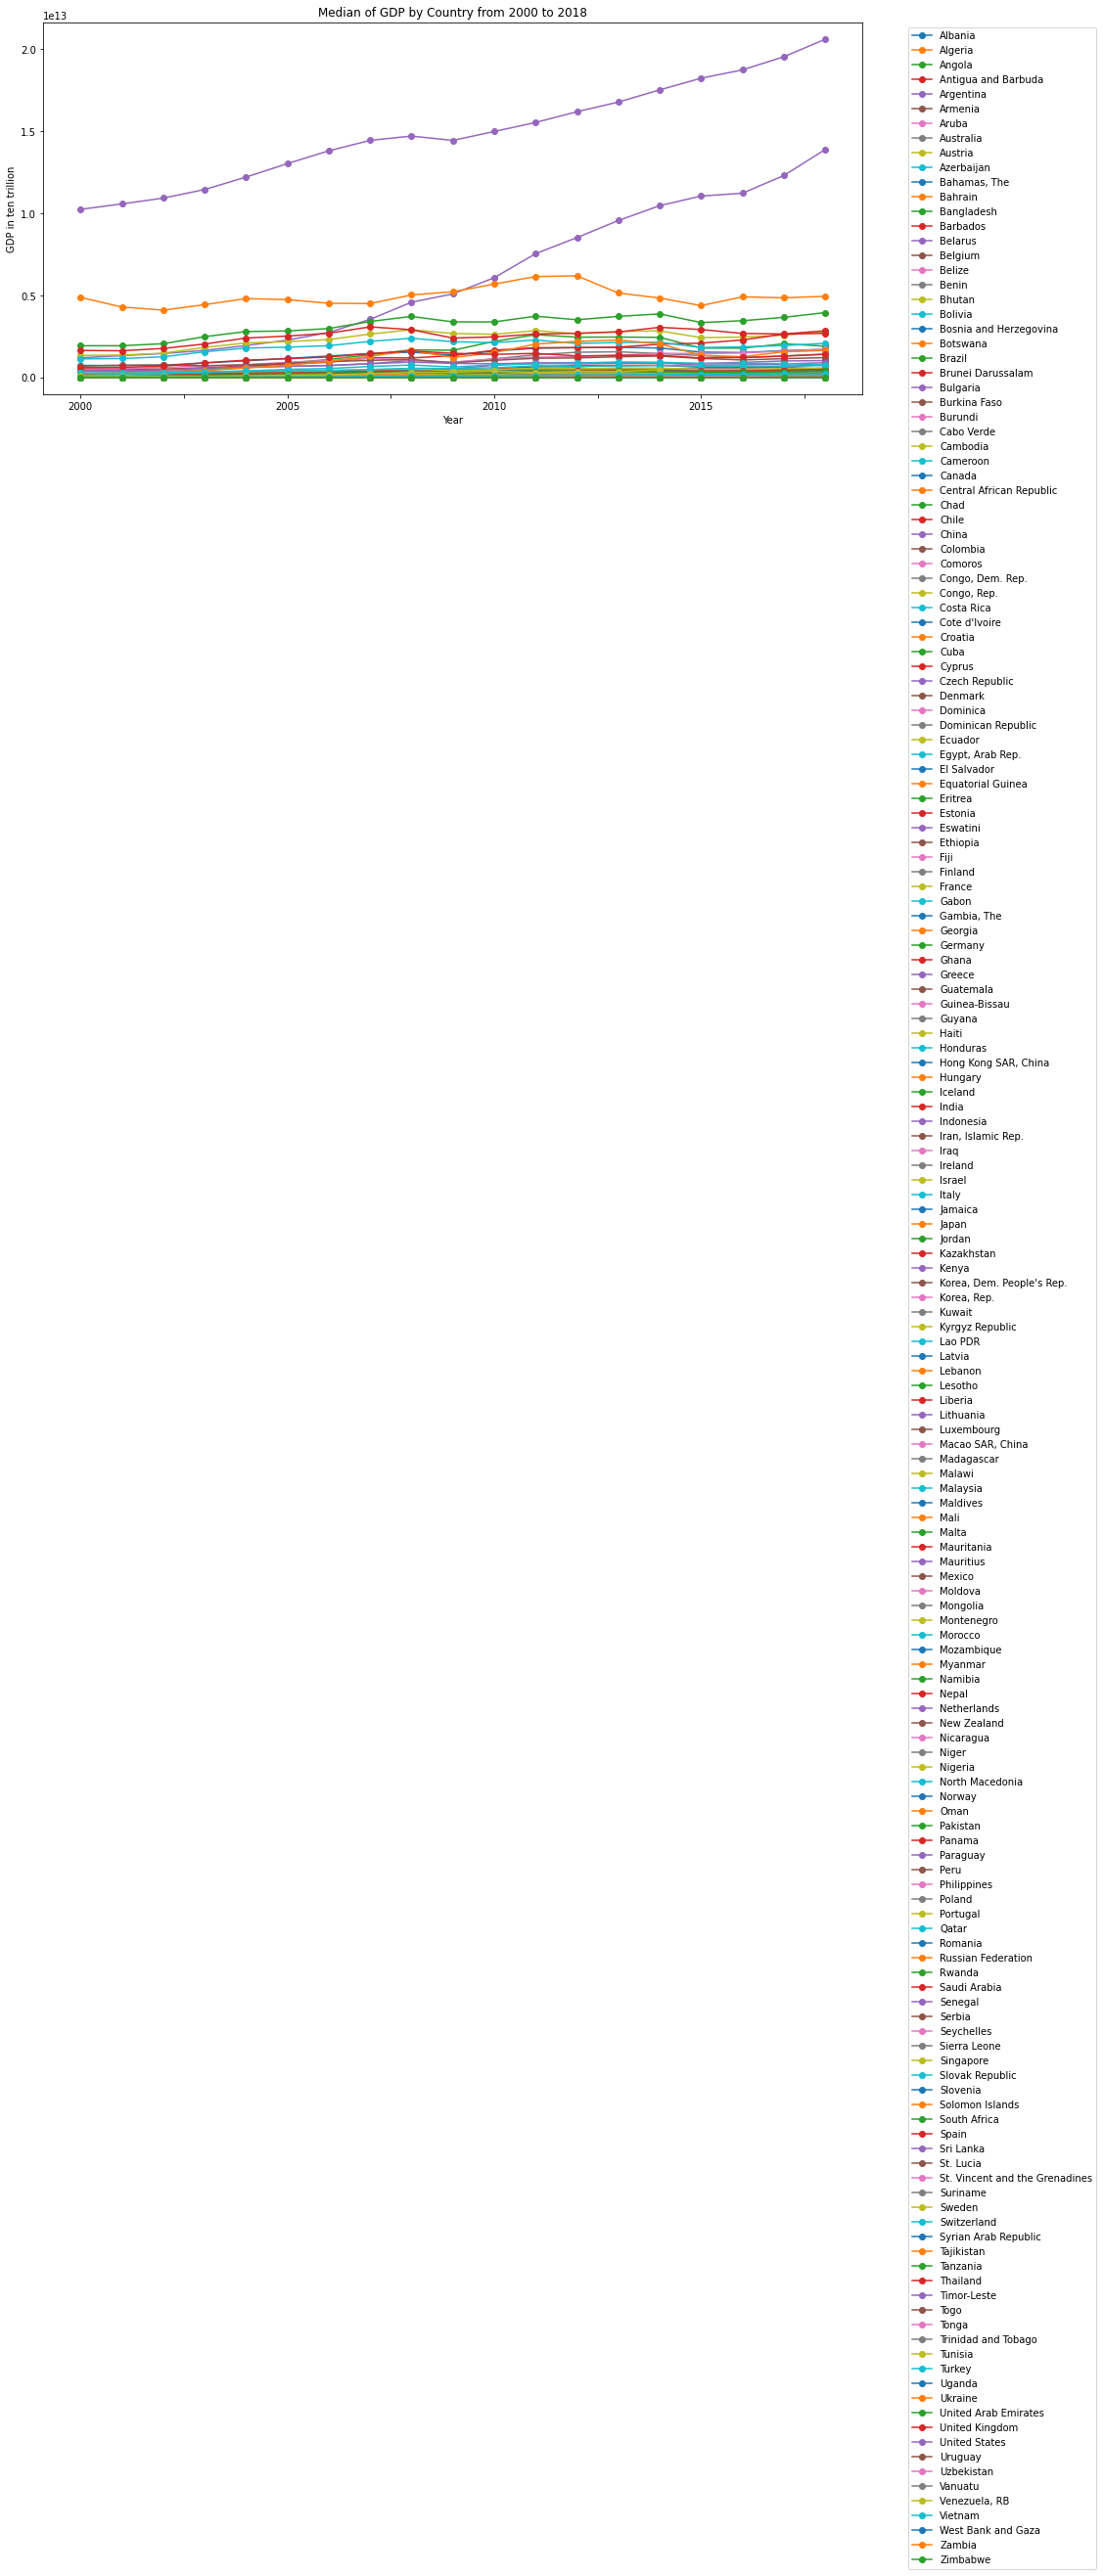

In [ ]:
# GDP (median) by countries line graph 
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','Country Name'])['GDP (current US$) - NY.GDP.MKTP.CD'].median().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Median of GDP by Country from 2000 to 2018')
plt.ylabel('GDP in ten trillion')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## Needa fix the legend

### Continent

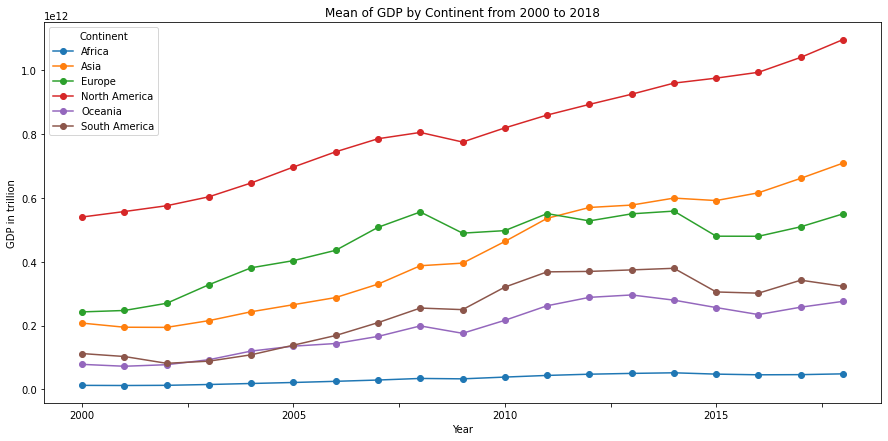

In [ ]:
# GDP (mean) by continent line graph 
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','Continent'])['GDP (current US$) - NY.GDP.MKTP.CD'].mean().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Mean of GDP by Continent from 2000 to 2018')
plt.ylabel('GDP in trillion')
plt.show()

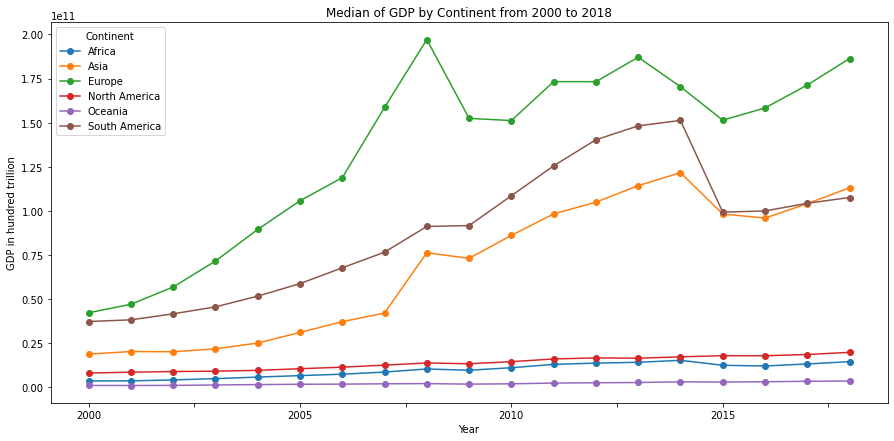

In [ ]:
# GDP (median) by continent line graph 
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','Continent'])['GDP (current US$) - NY.GDP.MKTP.CD'].median().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Median of GDP by Continent from 2000 to 2018')
plt.ylabel('GDP in hundred trillion')
plt.show()

### Region

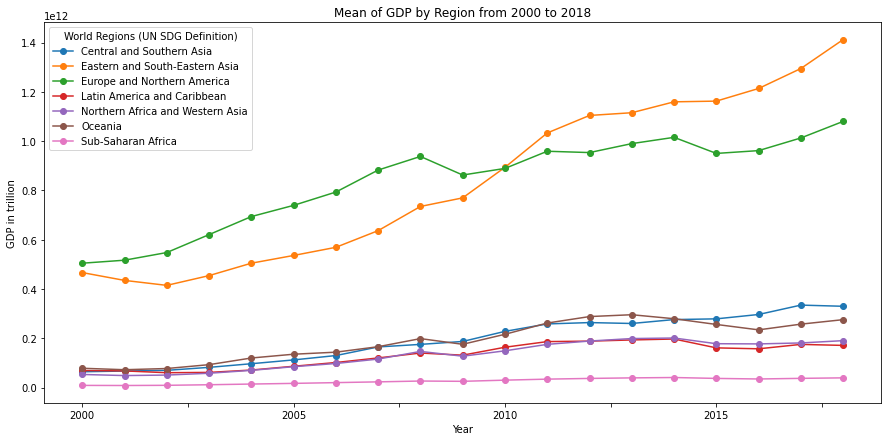

In [ ]:
# GDP (mean) by region line graph 
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','World Regions (UN SDG Definition)'])['GDP (current US$) - NY.GDP.MKTP.CD'].mean().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Mean of GDP by Region from 2000 to 2018')
plt.ylabel('GDP in trillion')
plt.show()

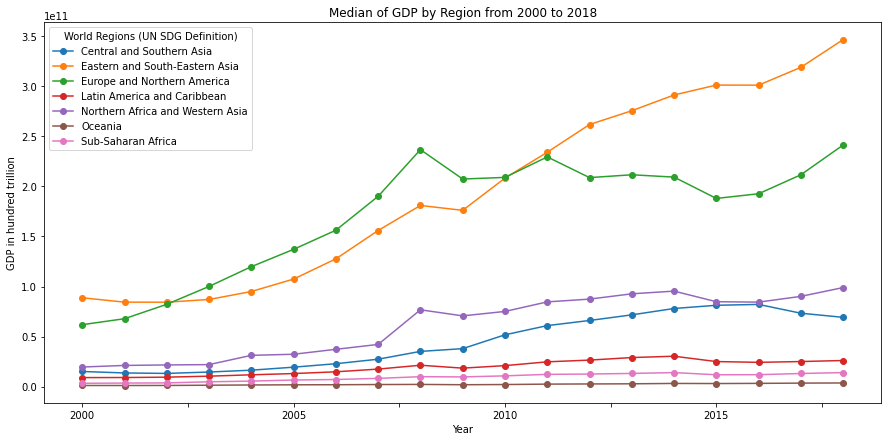

In [ ]:
# GDP (median) by region line graph 
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','World Regions (UN SDG Definition)'])['GDP (current US$) - NY.GDP.MKTP.CD'].median().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Median of GDP by Region from 2000 to 2018')
plt.ylabel('GDP in hundred trillion')
plt.show()

### Regime Type

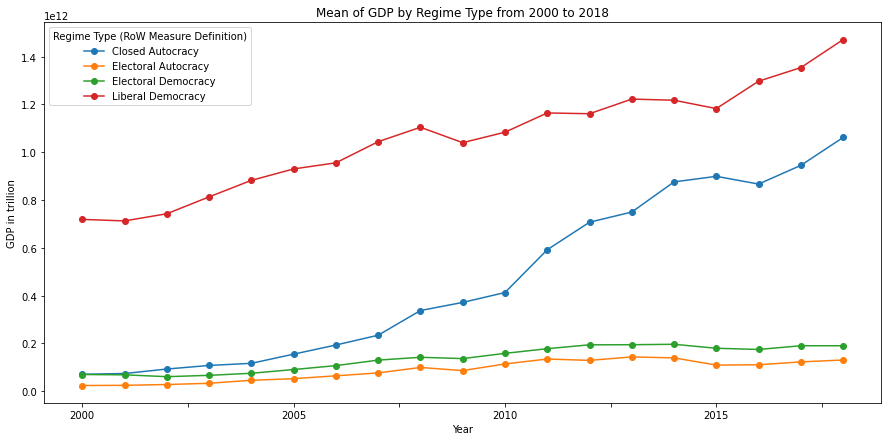

In [ ]:
# GDP (mean) by regime type line graph 
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','Regime Type (RoW Measure Definition)'])['GDP (current US$) - NY.GDP.MKTP.CD'].mean().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Mean of GDP by Regime Type from 2000 to 2018')
plt.ylabel('GDP in trillion')
plt.show()

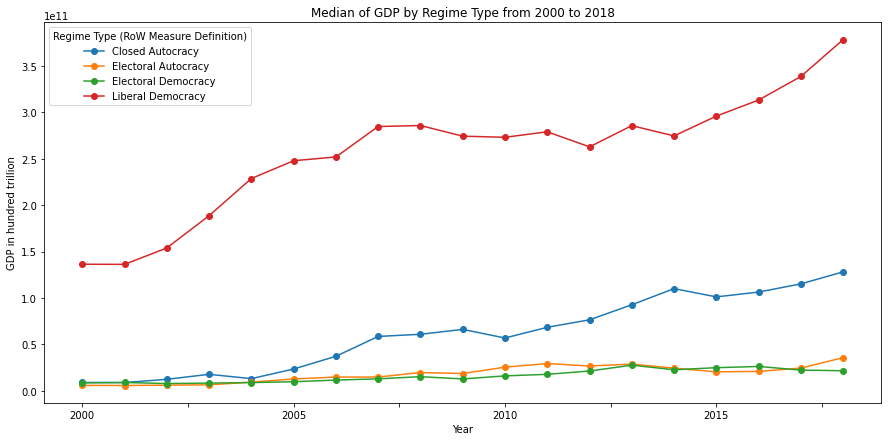

In [ ]:
# GDP (median) by regime type line graph 
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','Regime Type (RoW Measure Definition)'])['GDP (current US$) - NY.GDP.MKTP.CD'].median().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Median of GDP by Regime Type from 2000 to 2018')
plt.ylabel('GDP in hundred trillion')
plt.show()

##**GINI - needa fix this (maybe choose other indicators instead - too much nulls**

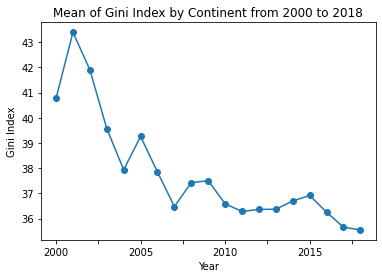

In [ ]:
ieq.groupby('Year')['Gini index (World Bank estimate) - SI.POV.GINI'].mean().plot(linestyle='-', marker='o')
plt.title('Mean of Gini Index by Continent from 2000 to 2018')
plt.ylabel('Gini Index')
plt.show()

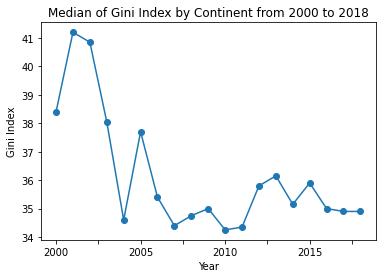

In [ ]:
ieq.groupby('Year')['Gini index (World Bank estimate) - SI.POV.GINI'].median().plot(linestyle='-', marker='o')
plt.title('Median of Gini Index by Continent from 2000 to 2018')
plt.ylabel('Gini Index')
plt.show()

### Continent

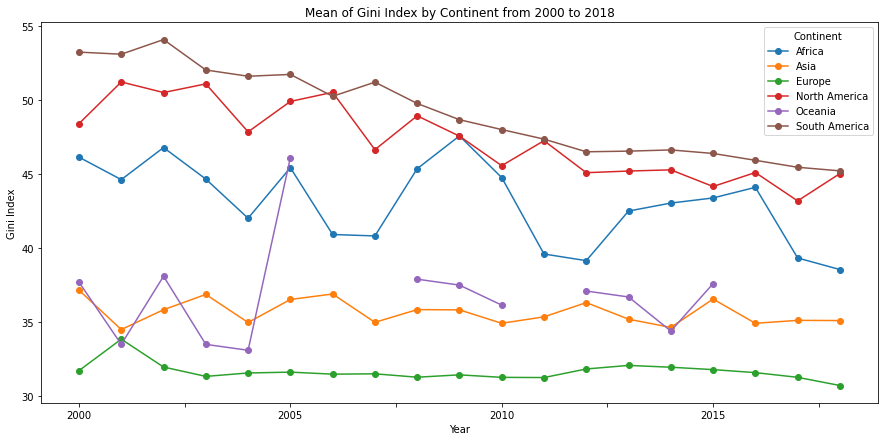

In [ ]:
#check GDP first
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','Continent'])['Gini index (World Bank estimate) - SI.POV.GINI'].mean().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Mean of Gini Index by Continent from 2000 to 2018')
plt.ylabel('Gini Index')
plt.show()

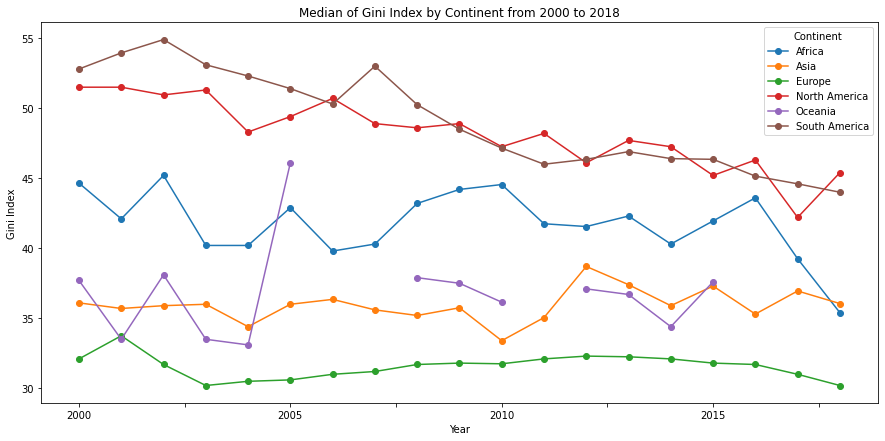

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','Continent'])['Gini index (World Bank estimate) - SI.POV.GINI'].median().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Median of Gini Index by Continent from 2000 to 2018')
plt.ylabel('Gini Index')
plt.show()

### Region

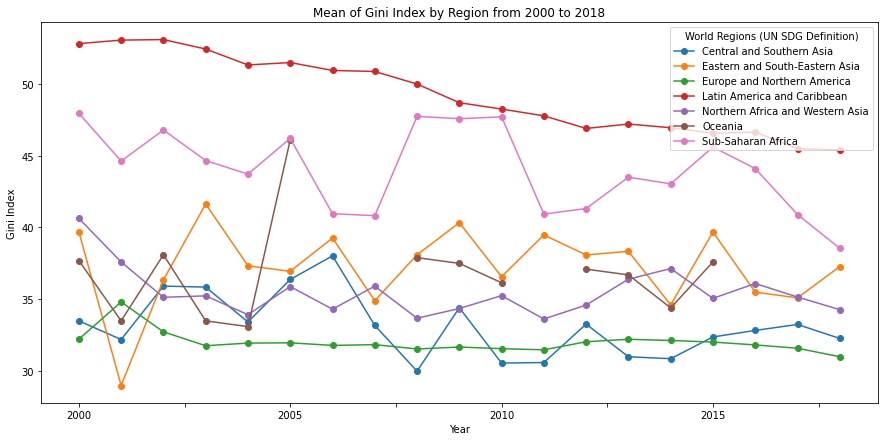

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','World Regions (UN SDG Definition)'])['Gini index (World Bank estimate) - SI.POV.GINI'].mean().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Mean of Gini Index by Region from 2000 to 2018')
plt.ylabel('Gini Index')
plt.show()

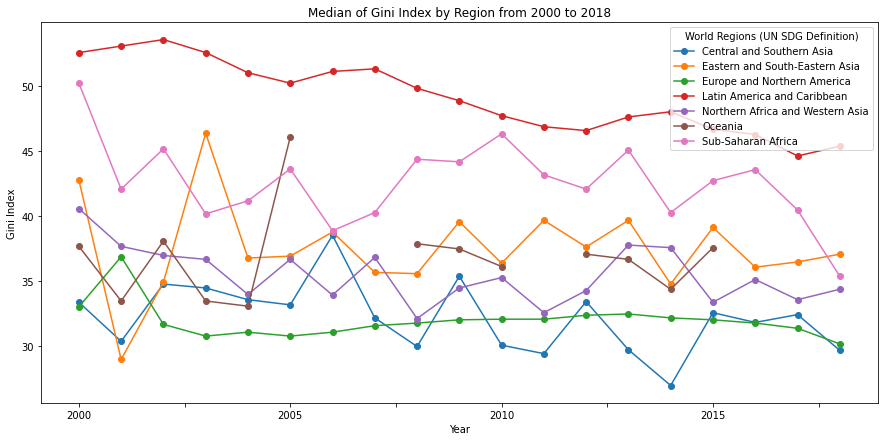

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','World Regions (UN SDG Definition)'])['Gini index (World Bank estimate) - SI.POV.GINI'].median().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Median of Gini Index by Region from 2000 to 2018')
plt.ylabel('Gini Index')
plt.show()

### Regime Type

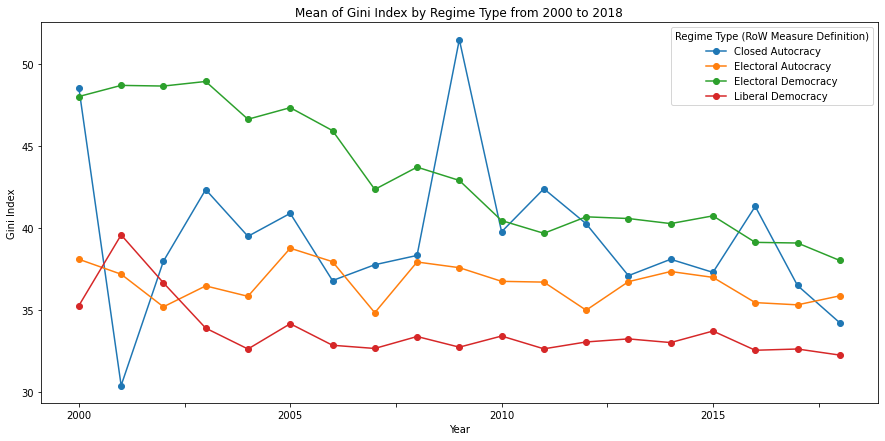

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','Regime Type (RoW Measure Definition)'])['Gini index (World Bank estimate) - SI.POV.GINI'].mean().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Mean of Gini Index by Regime Type from 2000 to 2018')
plt.ylabel('Gini Index')
plt.show()

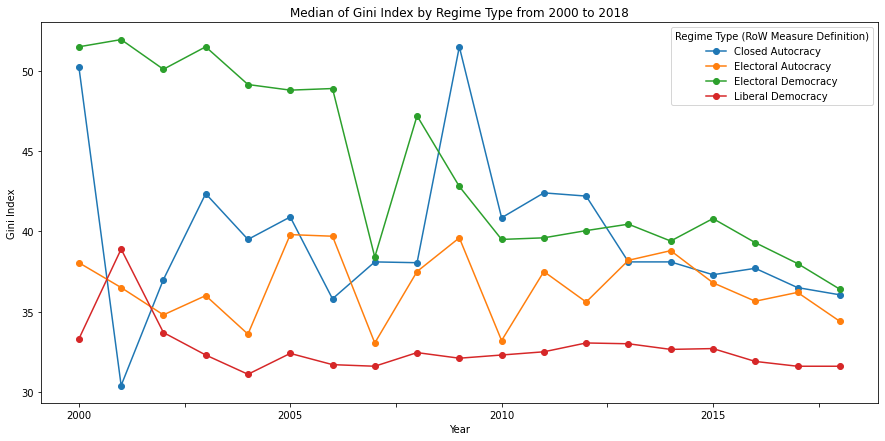

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','Regime Type (RoW Measure Definition)'])['Gini index (World Bank estimate) - SI.POV.GINI'].median().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Median of Gini Index by Regime Type from 2000 to 2018')
plt.ylabel('Gini Index')
plt.show()

## Power by social economic position

### Overall

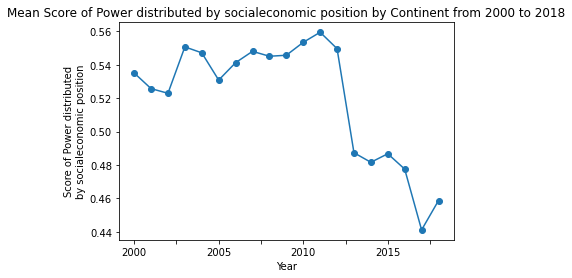

In [ ]:
# Overall Power distributed by social economic position (mean) line graph 
ieq.groupby('Year')['power_soec'].mean().plot(linestyle='-', marker='o')
plt.title('Mean Score of Power distributed by socialeconomic position by Continent from 2000 to 2018')
plt.ylabel('Score of Power distributed\nby socialeconomic position')
plt.show()

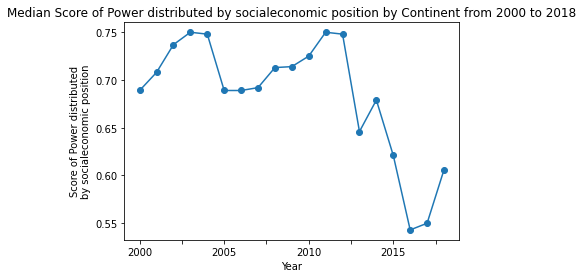

In [ ]:
# Overall Power distributed by social economic position (median) line graph 
ieq.groupby('Year')['power_soec'].median().plot(linestyle='-', marker='o')
plt.title('Median Score of Power distributed by socialeconomic position by Continent from 2000 to 2018')
plt.ylabel('Score of Power distributed\nby socialeconomic position')
plt.show()

### Continent

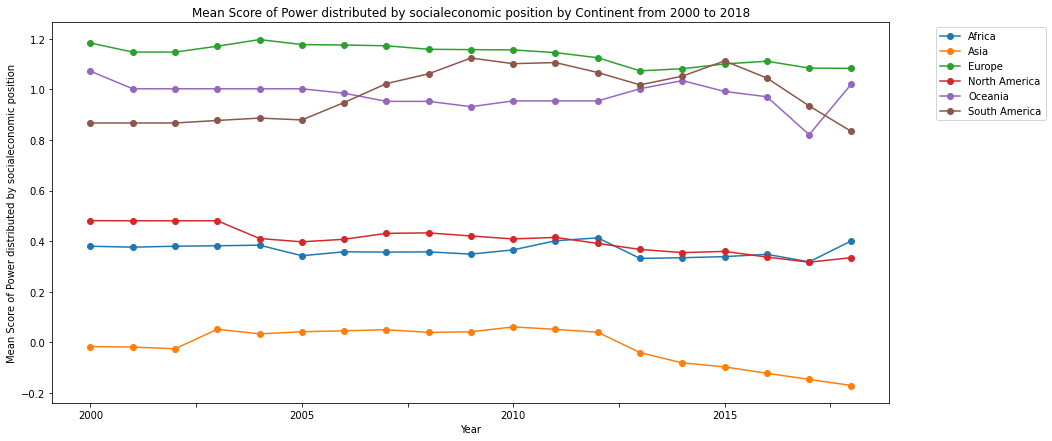

In [ ]:
# Power distributed by social economic position (mean)by continent line graph 
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','Continent'])['power_soec'].mean().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Mean Score of Power distributed by socialeconomic position by Continent from 2000 to 2018')
plt.ylabel('Mean Score of Power distributed by socialeconomic position')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

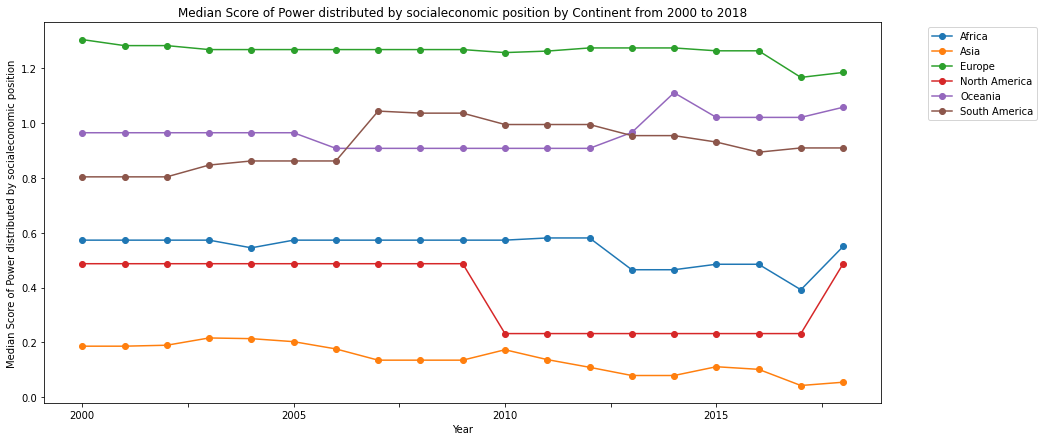

In [ ]:
# Power distributed by social economic position (median)by continent line graph 
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','Continent'])['power_soec'].median().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Median Score of Power distributed by socialeconomic position by Continent from 2000 to 2018')
plt.ylabel('Median Score of Power distributed by socialeconomic position')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

### Region

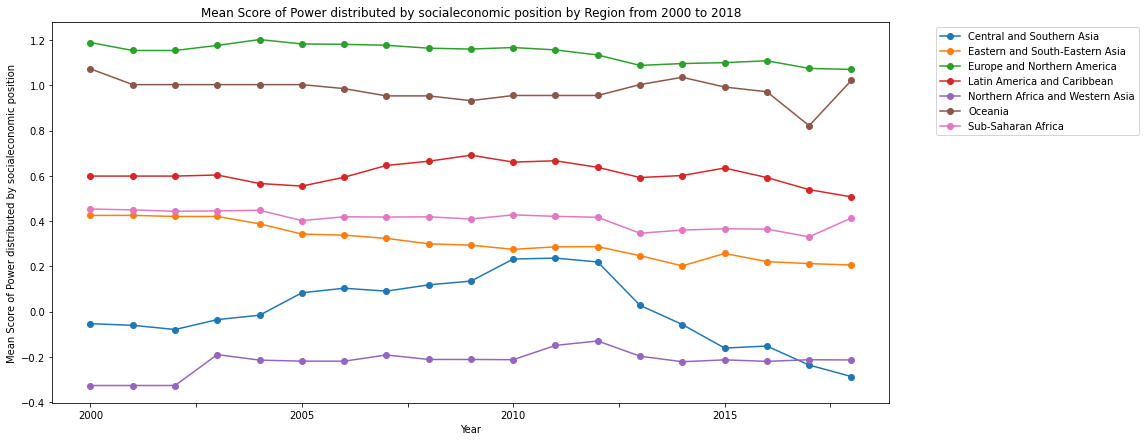

In [ ]:
# Power distributed by social economic position (mean) by region line graph 
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','World Regions (UN SDG Definition)'])['power_soec'].mean().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Mean Score of Power distributed by socialeconomic position by Region from 2000 to 2018')
plt.ylabel('Mean Score of Power distributed by socialeconomic position')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

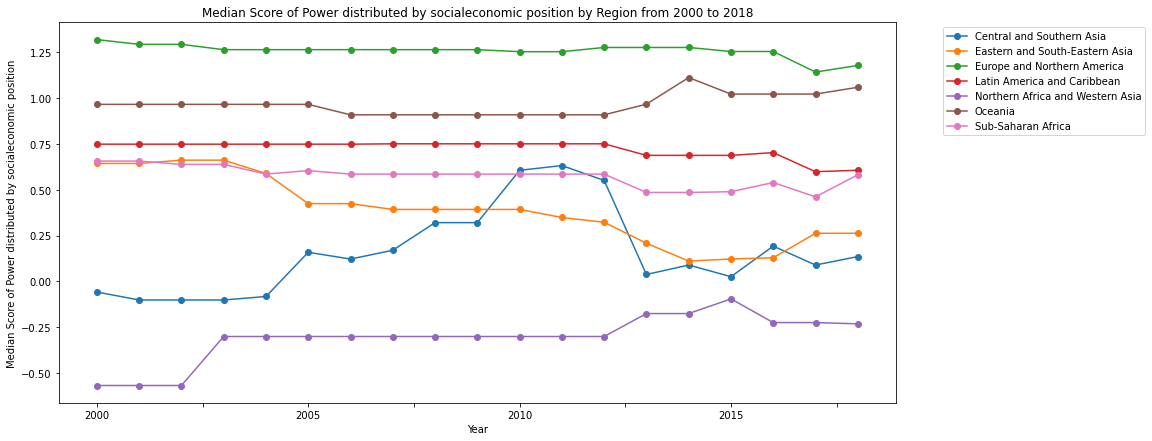

In [ ]:
# Power distributed by social economic position (median) by region line graph 
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','World Regions (UN SDG Definition)'])['power_soec'].median().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Median Score of Power distributed by socialeconomic position by Region from 2000 to 2018')
plt.ylabel('Median Score of Power distributed by socialeconomic position')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

### Regime Type

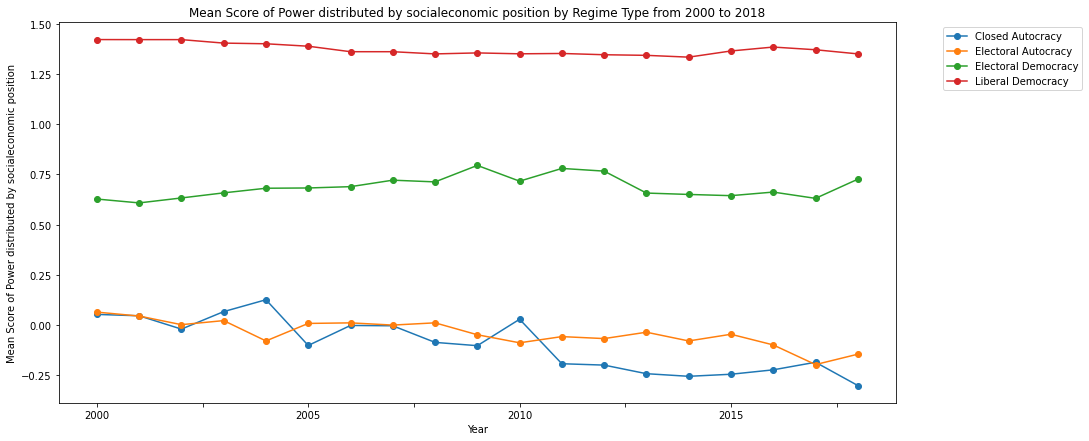

In [ ]:
# Power distributed by social economic position (mean) by regime type line graph 
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','Regime Type (RoW Measure Definition)'])['power_soec'].mean().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Mean Score of Power distributed by socialeconomic position by Regime Type from 2000 to 2018')
plt.ylabel('Mean Score of Power distributed by socialeconomic position')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

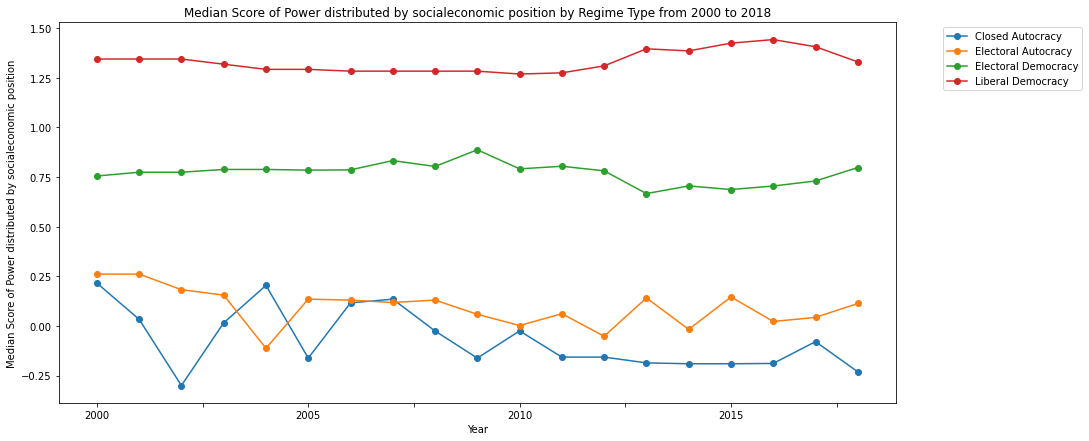

In [ ]:
# Power distributed by social economic position (median) by regime type line graph 
fig, ax = plt.subplots(figsize=(15,7))
ieq.groupby(['Year','Regime Type (RoW Measure Definition)'])['power_soec'].median().unstack().plot(ax=ax,linestyle='-', marker='o')
plt.title('Median Score of Power distributed by socialeconomic position by Regime Type from 2000 to 2018')
plt.ylabel('Median Score of Power distributed by socialeconomic position')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# Target2

## Prep

In [ ]:
# Take a look at the vdem dataset
vdem.head()

country_name country_text_id  country_id  ...  e_miinteco e_miinterc  e_pt_coup
211       Mexico             MEX           3  ...         0.0        0.0        0.0
212       Mexico             MEX           3  ...         NaN        NaN        0.0
213       Mexico             MEX           3  ...         NaN        NaN        0.0
214       Mexico             MEX           3  ...         NaN        NaN        0.0
215       Mexico             MEX           3  ...         NaN        NaN        0.0

[5 rows x 4176 columns]

The list of indicators' full name:


1. Rigorous and impartial public administration (v2clrspct) 

2. Freedom of academic and cultural expression (v2clacfree)

3. Freedom of religion (v2clrelig)

4. Power distributed by sexual orientation (v2pepwrort)

5. Candidate restriction by ethnicity, race, religion, or language (v2elrstrct)

6. HOG restriction by ethnicity, race, religion, or language (v2elrsthog) 

7. HOS restriction by ethnicity, race, religion, or language (v2elrsthos)

8. Women political empowerment index ordinal (v2x_gender)

9. Equal distribution of resources index (v2xeg_eqdr)

10. Exclusion by Socio-Economic Group (v2xpe_exlecon)

11. Exclusion by Gender index (v2xpe_exlgender)

12. Exclusion by Urban-Rural Location index (v2xpe_exlgeo)

13. Exclusion by Political Group index (v2xpe_exlpol) 

14. Exclusion by Social Group index (v2xpe_exlsocgr)

In [ ]:
# Extract the indicators needed
tg2 = vdem[['country_name','country_text_id','year','v2clrspct','v2clacfree',
            'v2clrelig','v2pepwrort','v2elrstrct','v2elrsthog','v2elrsthos','v2x_gender','v2xeg_eqdr',
            'v2xpe_exlecon','v2xpe_exlgender','v2xpe_exlgeo','v2xpe_exlpol','v2xpe_exlsocgr']]
tg2 = tg2.reset_index(drop=True)

# Check data types
tg2.dtypes

country_name        object
country_text_id     object
year                 int64
v2clrspct          float64
v2clacfree         float64
v2clrelig          float64
v2pepwrort         float64
v2elrstrct         float64
v2elrsthog         float64
v2elrsthos         float64
v2x_gender         float64
v2xeg_eqdr         float64
v2xpe_exlecon      float64
v2xpe_exlgender    float64
v2xpe_exlgeo       float64
v2xpe_exlpol       float64
v2xpe_exlsocgr     float64
dtype: object

In [ ]:
# Rename columns for merging and easier access
tg2.rename(columns={'country_name':'Country Name','country_text_id':'Country Code','year':'Year','v2clrspct':'just_pbadm','v2clacfree':'free_acexp',
                    'v2clrelig':'free_rel','v2pepwrort':'pow_sxo','v2elrstrct':'cddrst_soc','v2elrsthog':'hogrst_soc','v2elrsthos':'hosrst_soc',
                    'v2x_gender':'pol_gen','v2xeg_eqdr':'eq_res','v2xpe_exlecon':'exl_eco','v2xpe_exlgender':'exl_gen','v2xpe_exlgeo':'exl_geo',
                    'v2xpe_exlpol':'exl_pol','v2xpe_exlsocgr':'exl_soc'},inplace=True)

In [ ]:
# Merge the inequality dataset with the newly created tg2 dataset
# merge on country code and year as country name might have recorded differently
ieq1 = pd.merge(ieq,tg2,how='left',on=['Country Code','Year'],copy=False)

# Check columns
ieq1.columns

Index(['Country Name_x', 'Country Code', 'Year', 'Continent',
       'World Regions (UN SDG Definition)',
       'Regime Type (RoW Measure Definition)',
       'Population, total - SP.POP.TOTL',
       'Access to electricity (% of population) - EG.ELC.ACCS.ZS',
       'GDP (current US$) - NY.GDP.MKTP.CD',
       'GDP per capita (current US$) - NY.GDP.PCAP.CD',
       'Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS',
       'Renewable electricity output (% of total electricity output) - EG.ELC.RNEW.ZS',
       'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
       'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
       'Income Classification (World Bank Definition)',
       'Individuals using the Internet (% of population) - IT.NET.USER.ZS',
       'power_soec', 'power_f', 'suffrage_f', 'dmr_f',
       'Gini index (World Bank estimate) - SI.POV.GINI', 'Country Name_y',
       'just_pbadm', 'free_

In [ ]:
# Discard the duplicate columns and unrelated variables
# only keep the indicators for Target2
lst = ['Country Name_x', 'Country Code', 'Year','Continent','World Regions (UN SDG Definition)','Regime Type (RoW Measure Definition)',
       'Income Classification (World Bank Definition)','Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
       'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS','Country Name_y','just_pbadm', 'free_acexp', 
       'free_rel', 'pow_sxo', 'cddrst_soc','hogrst_soc', 'hosrst_soc', 'pol_gen', 'eq_res', 'exl_eco', 'exl_gen','exl_geo', 'exl_pol', 'exl_soc']
ieq1 = ieq1[lst]

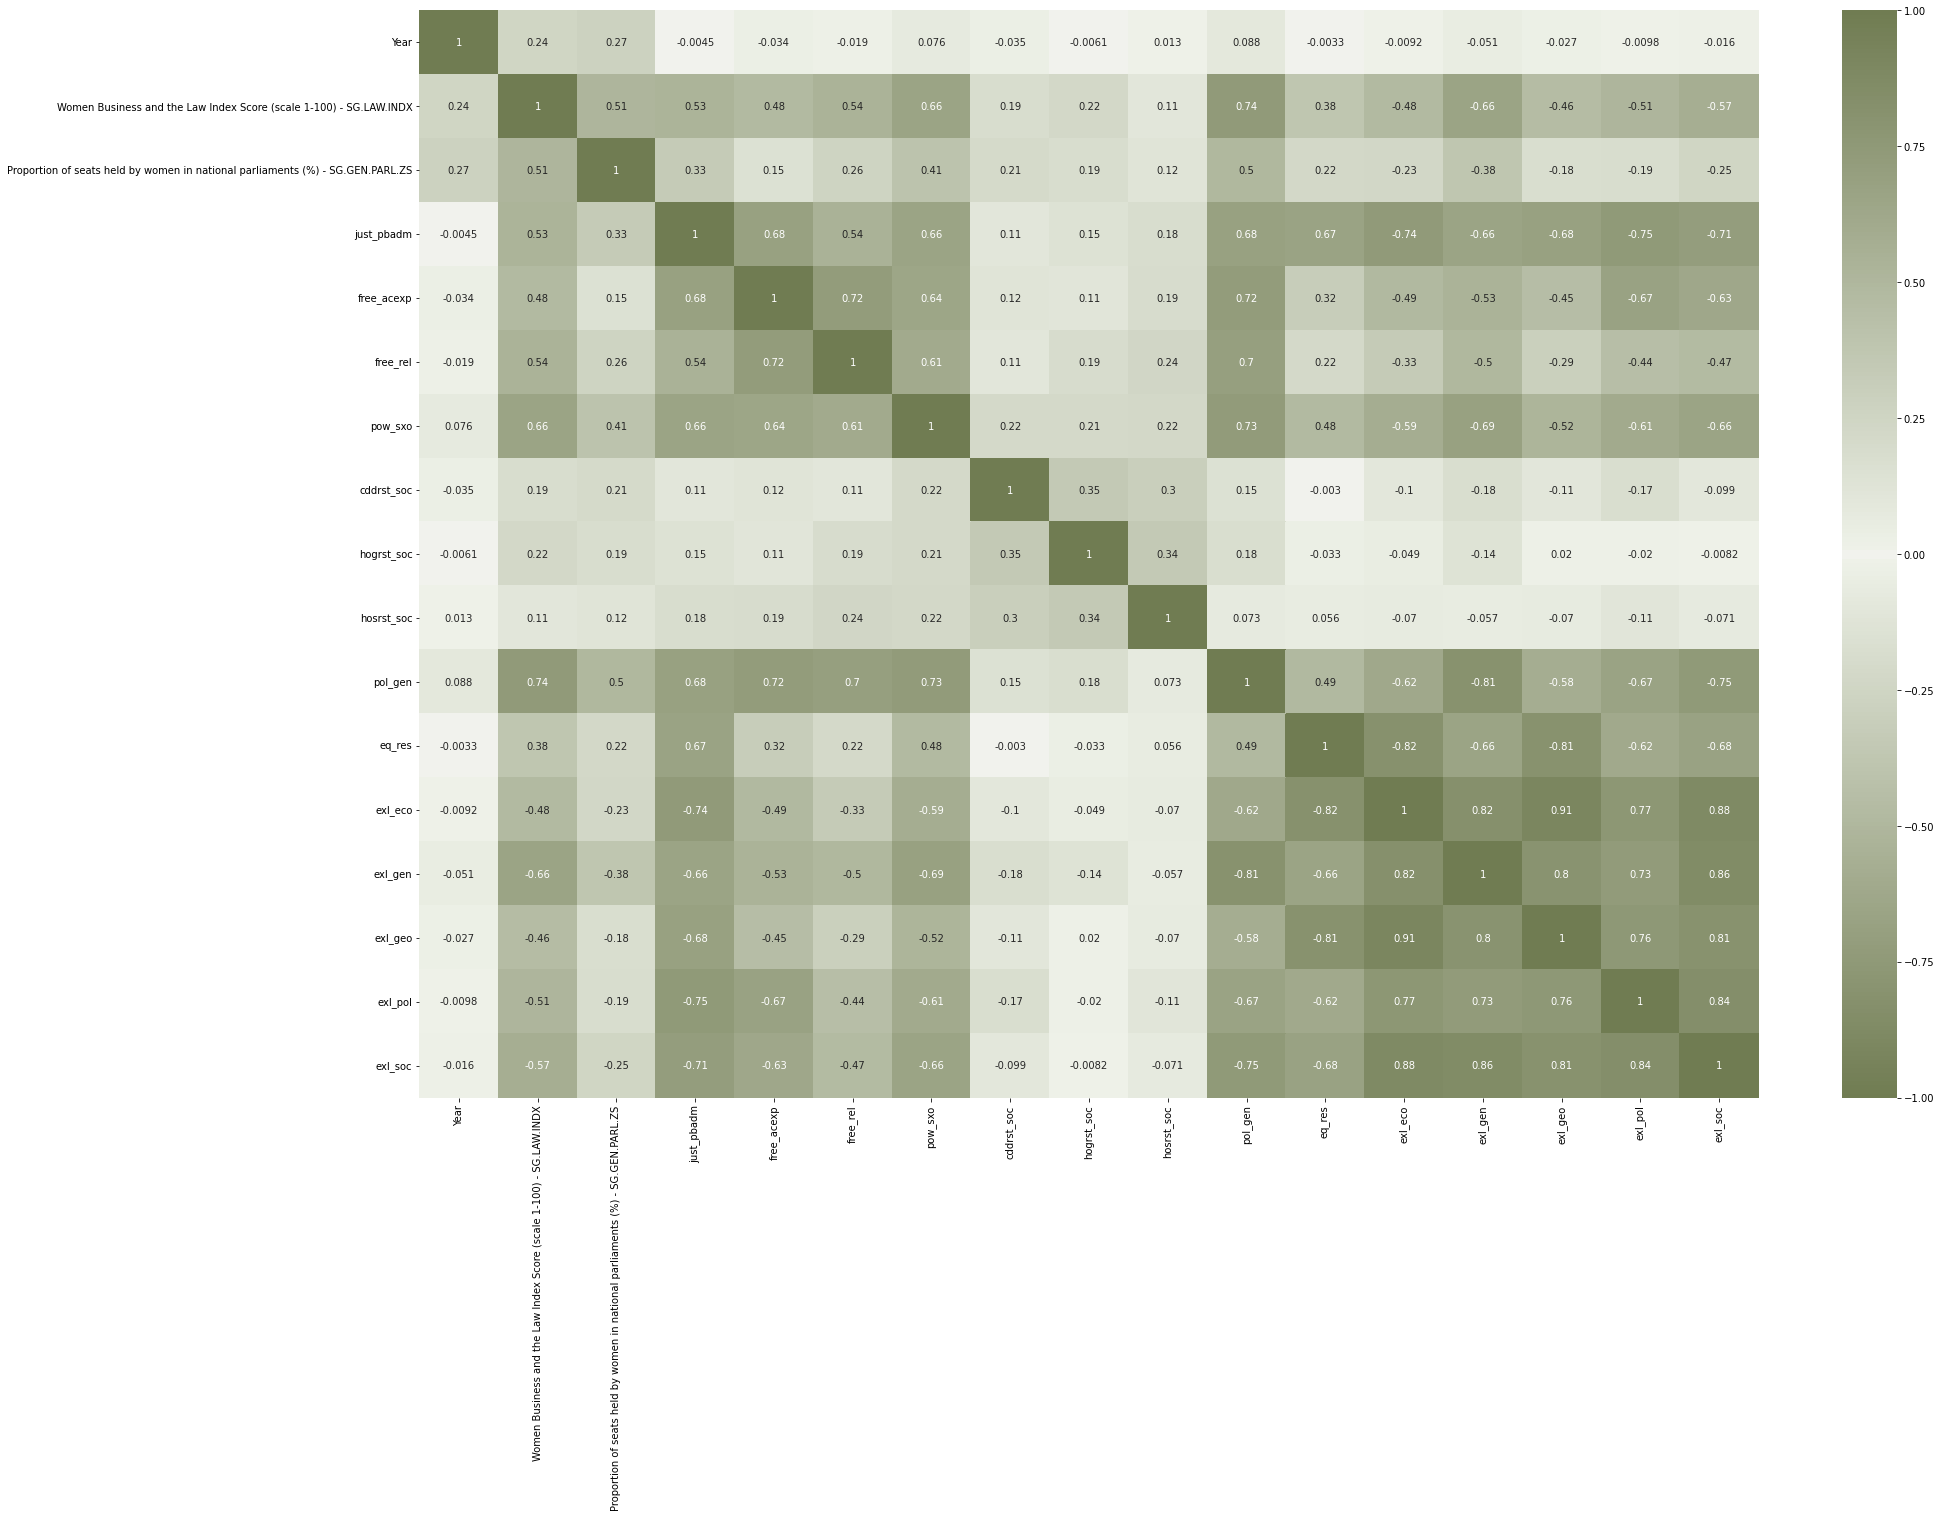

In [ ]:
# Pairplots for all variables
plt.figure(figsize=(30,20))
sym_col = sns.diverging_palette(100, 100, s=50, as_cmap=True)
sns.heatmap(ieq1.corr(),annot=True, vmin=-1,vmax=1, center = 0,cmap=sym_col)
plt.show()

##**plots (raw) may get rid of it, could be useful tho, let's discuss further**

In [ ]:
ieq1.columns

Index(['Country Name_x', 'Country Code', 'Year', 'Continent',
       'World Regions (UN SDG Definition)',
       'Regime Type (RoW Measure Definition)',
       'Population, total - SP.POP.TOTL',
       'Access to electricity (% of population) - EG.ELC.ACCS.ZS',
       'GDP (current US$) - NY.GDP.MKTP.CD',
       'GDP per capita (current US$) - NY.GDP.PCAP.CD',
       'Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS',
       'Renewable electricity output (% of total electricity output) - EG.ELC.RNEW.ZS',
       'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
       'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
       'Income Classification (World Bank Definition)',
       'Individuals using the Internet (% of population) - IT.NET.USER.ZS',
       'Gini index (World Bank estimate) - SI.POV.GINI', 'Country Name_y',
       'pol_gen', 'exl_gen', 'cddrst_soc', 'hogrst_soc', 'hosrst_soc',
       'jus

In [ ]:
for_plt = ieq1[['Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
               'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
               'pol_gen', 'exl_gen', 'cddrst_soc', 'hogrst_soc', 'hosrst_soc','just_pbadm', 
               'free_acexp', 'free_rel', 'pow_sxo', 'exl_eco', 'exl_geo','exl_pol', 'exl_soc']]

### Overall

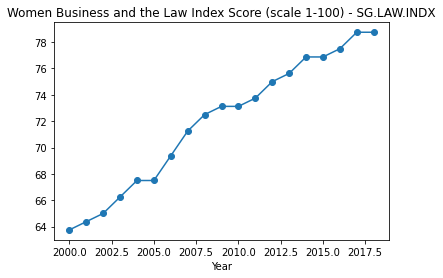

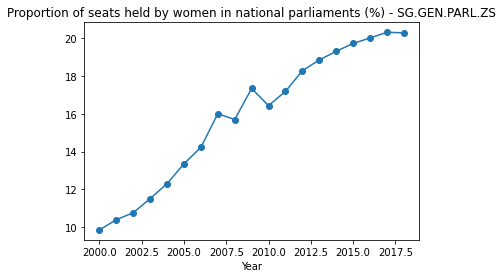

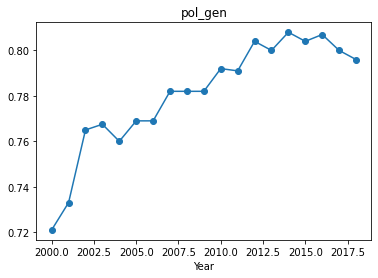

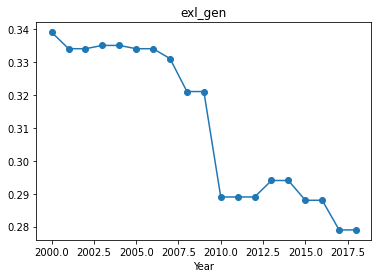

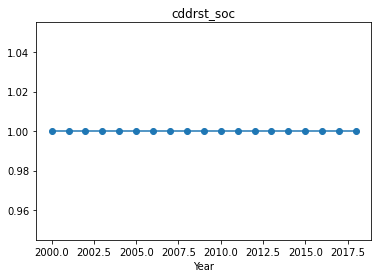

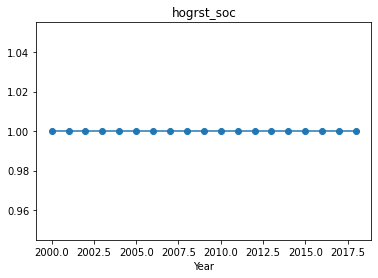

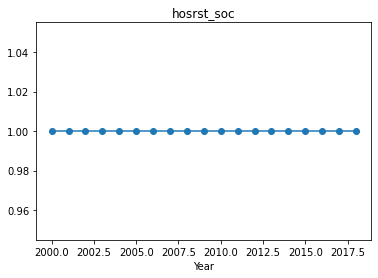

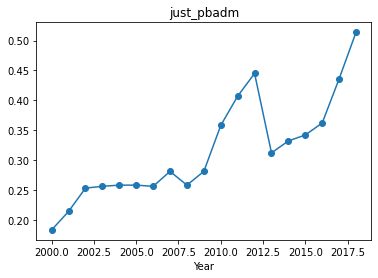

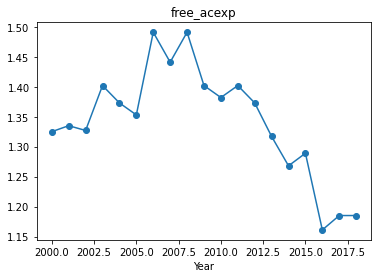

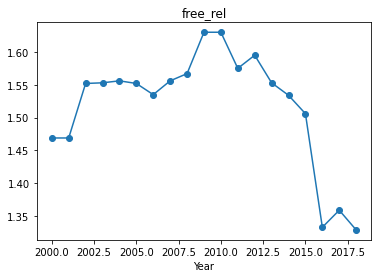

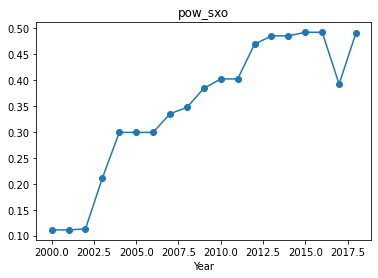

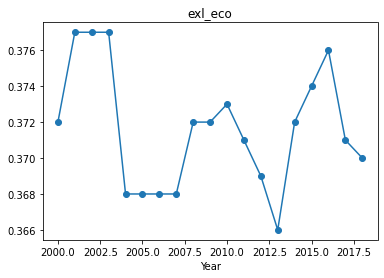

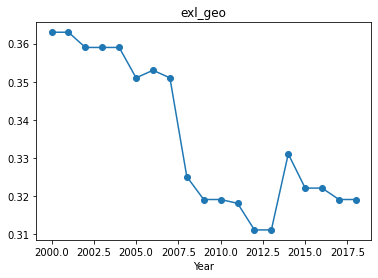

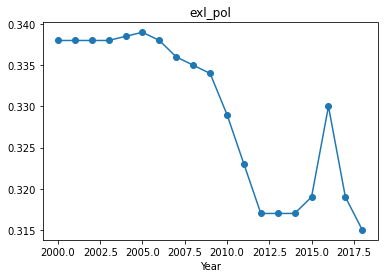

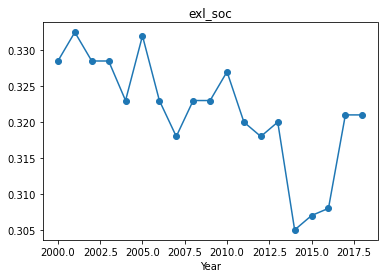

In [ ]:
for x in for_plt:
  ieq1.groupby('Year')[x].median().plot(linestyle='-', marker='o')
  plt.title(x)
#plt.ylabel('GDP in ten billion')
  plt.show()

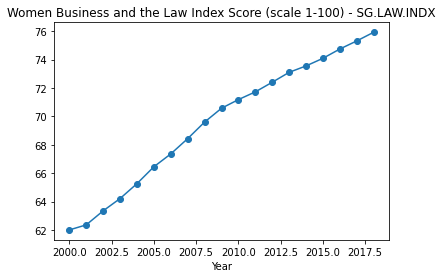

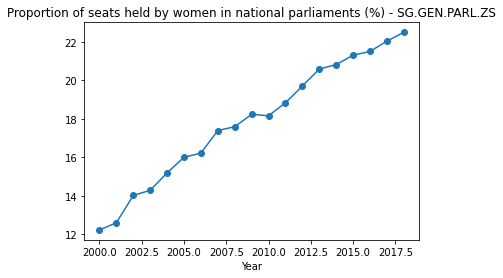

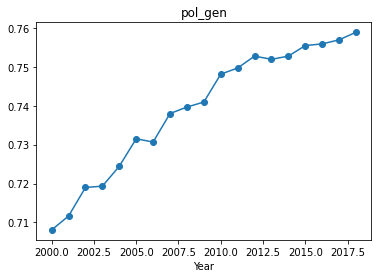

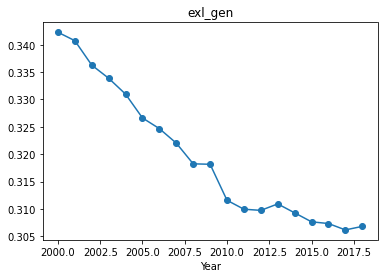

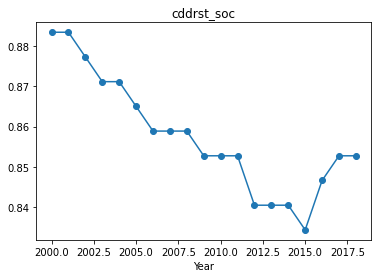

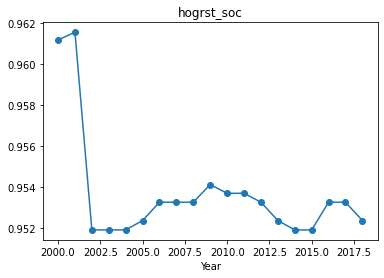

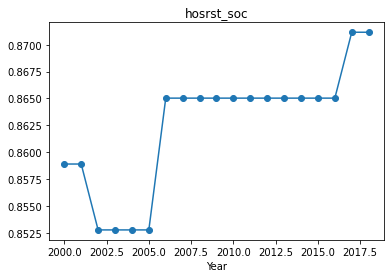

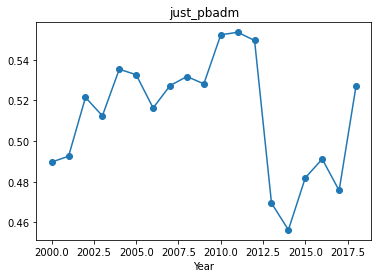

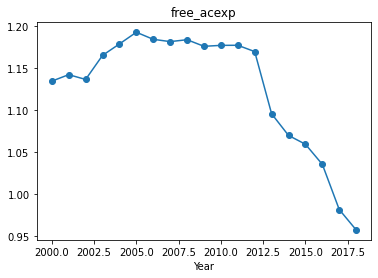

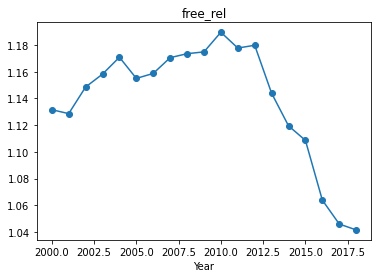

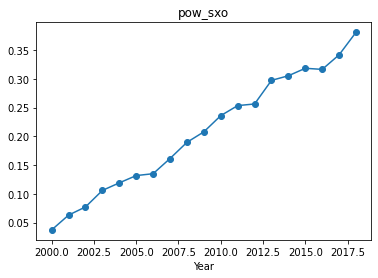

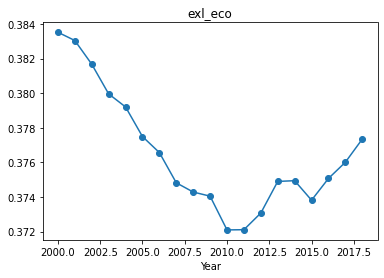

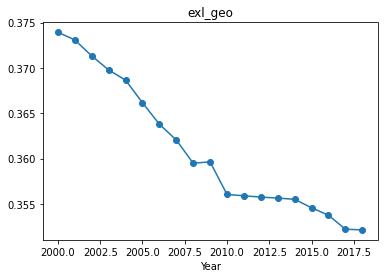

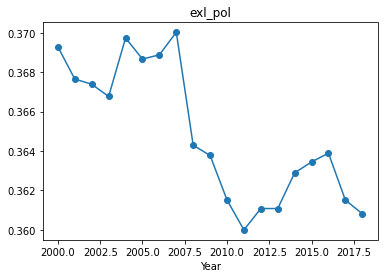

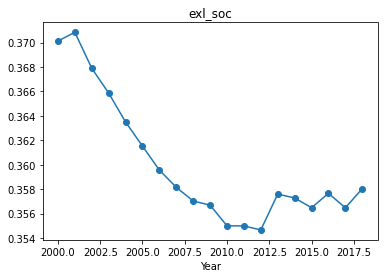

In [ ]:
for x in for_plt:
  ieq1.groupby('Year')[x].mean().plot(linestyle='-', marker='o')
  plt.title(x)
#plt.ylabel('GDP in ten billion')
  plt.show()

### Check

In [ ]:
for x in for_plt:
  print(x,ieq1[x].nunique(),sep='\n', end='\n\n')

Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX
106

Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS
903

pol_gen
602

exl_gen
518

cddrst_soc
2

hogrst_soc
2

hosrst_soc
2

just_pbadm
835

free_acexp
902

free_rel
640

pow_sxo
555

exl_eco
615

exl_geo
392

exl_pol
468

exl_soc
592



In [ ]:
to

1.0    2656
0.0     441
Name: cddrst_soc, dtype: int64

### Continent

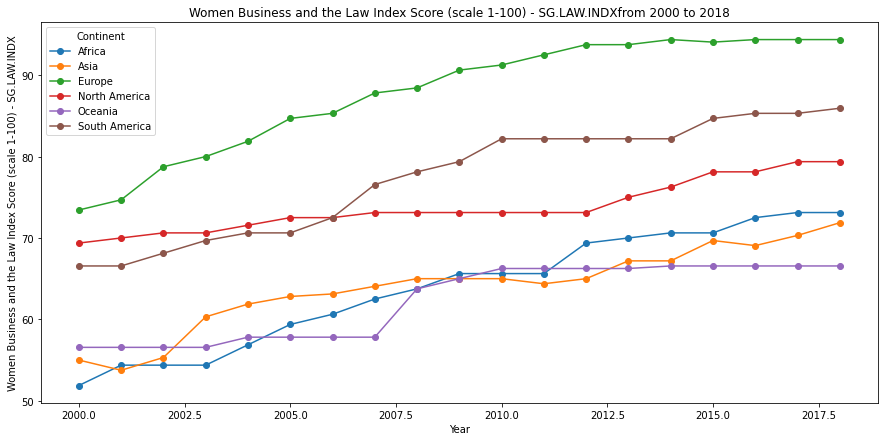

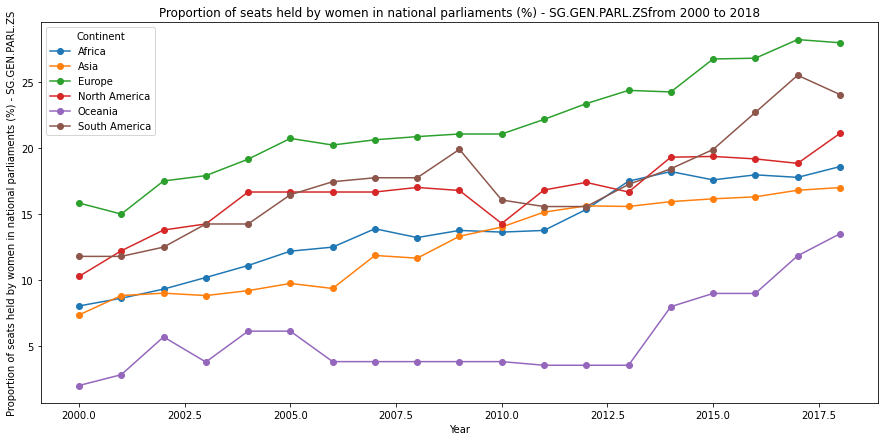

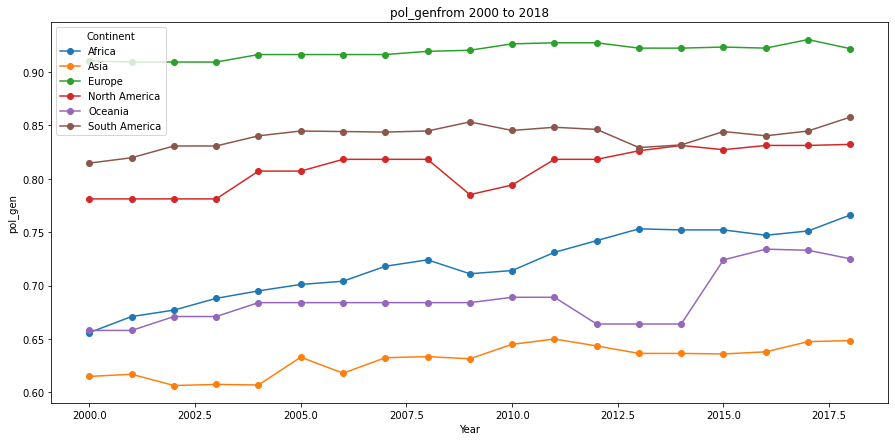

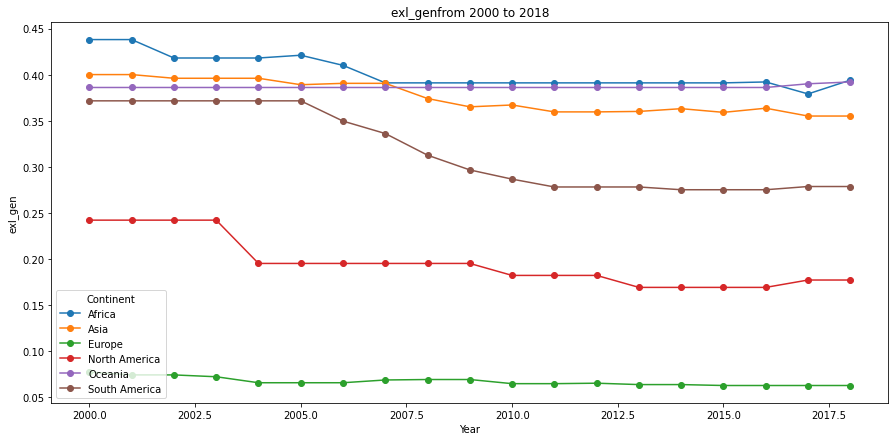

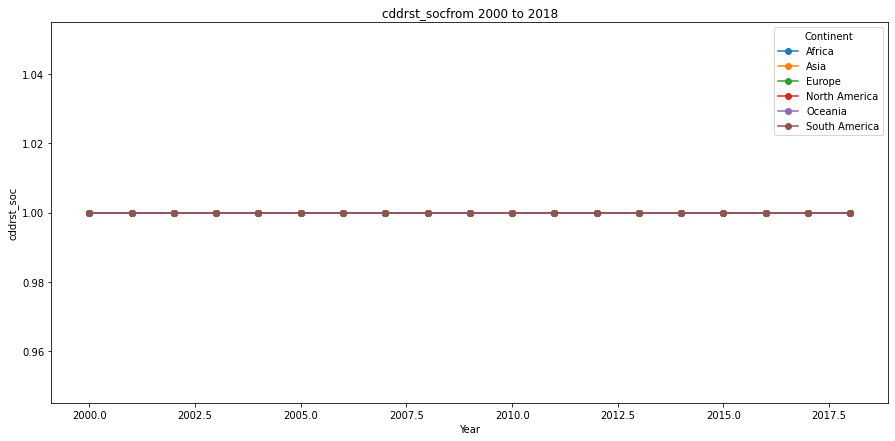

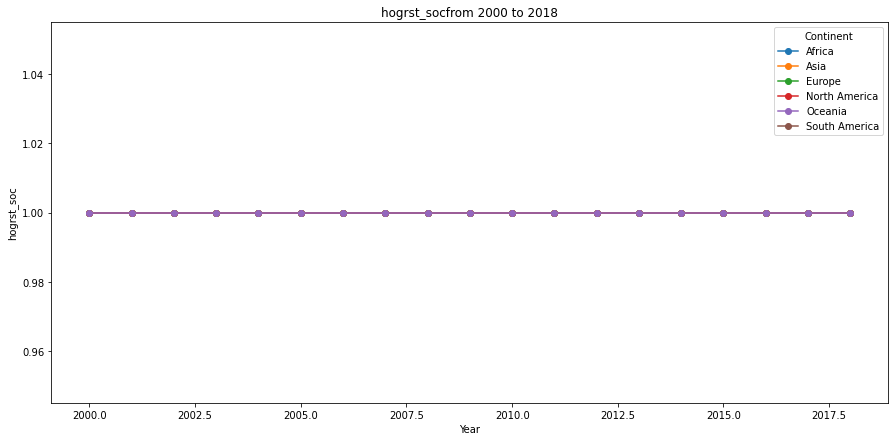

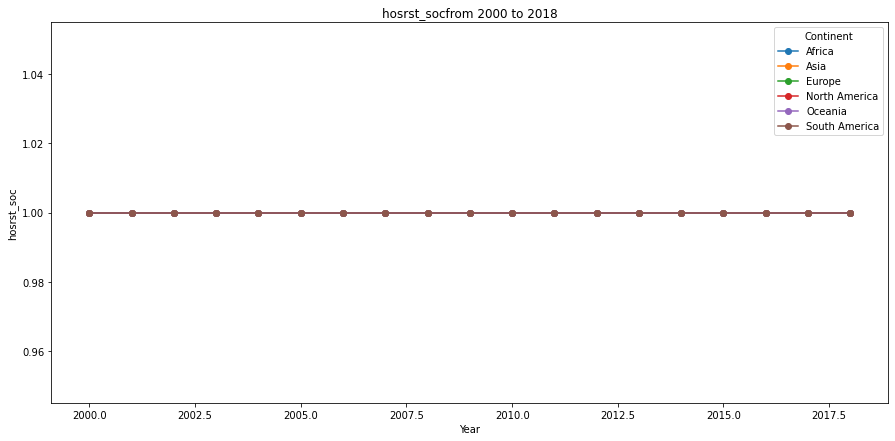

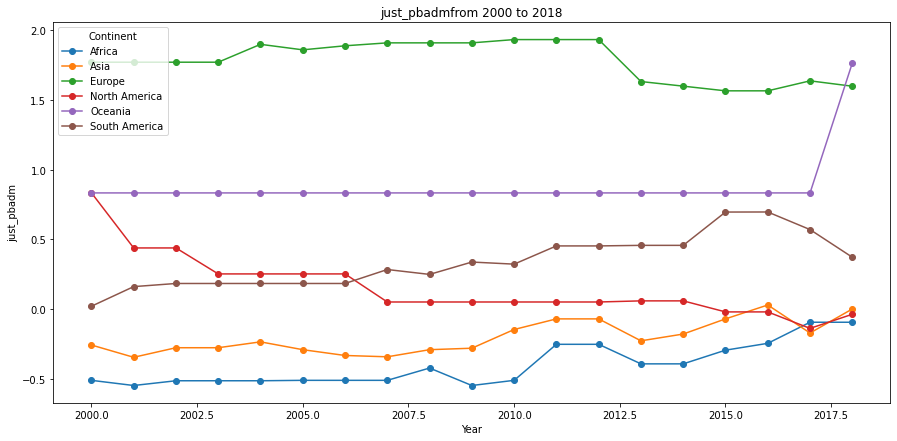

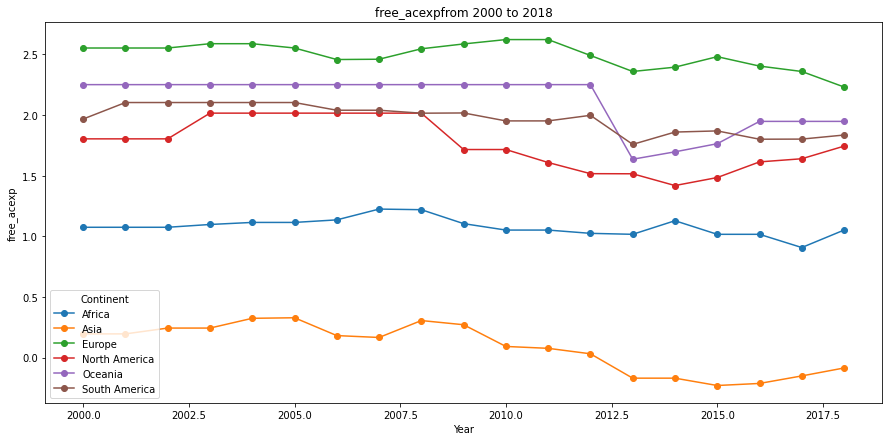

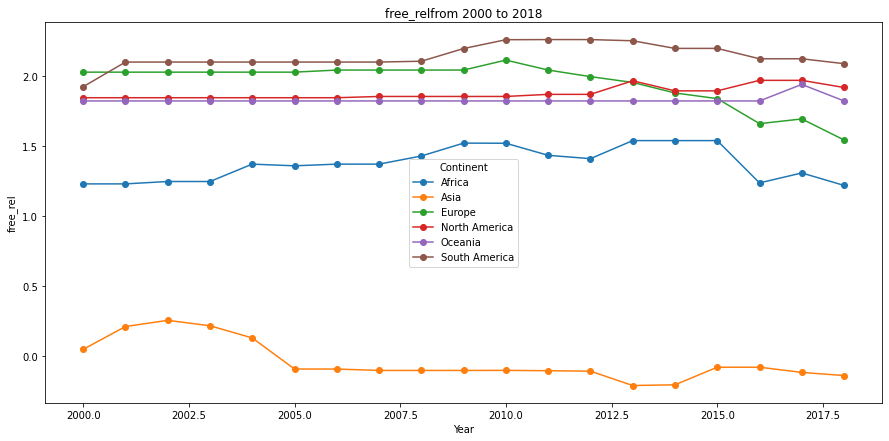

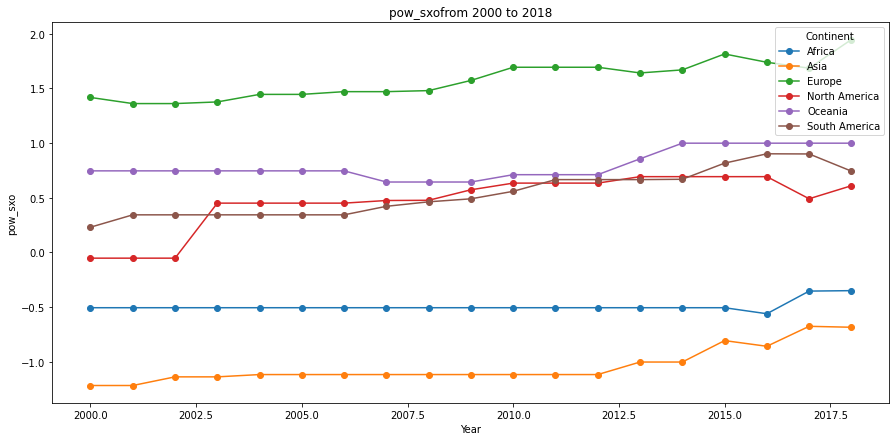

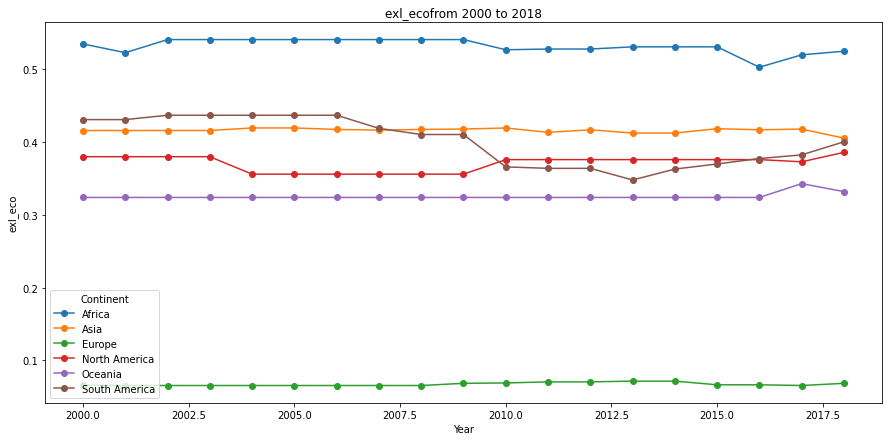

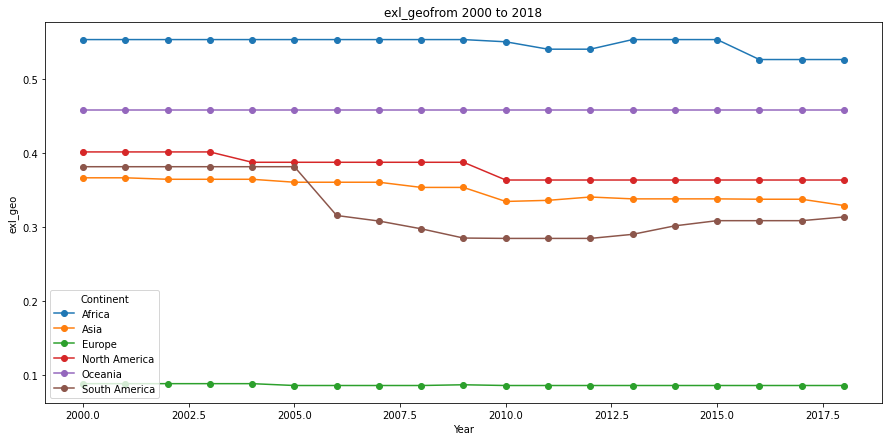

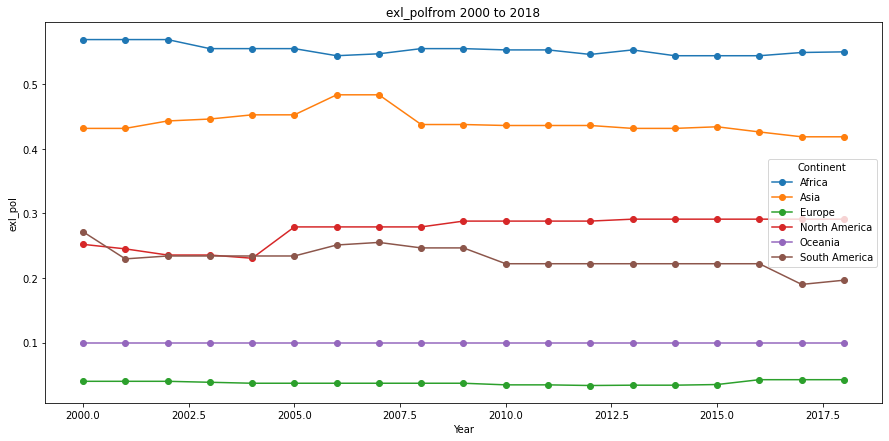

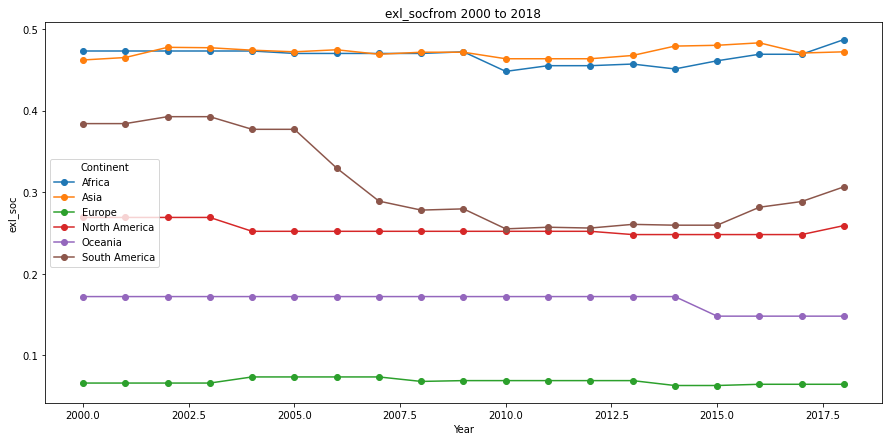

In [ ]:
for x in for_plt:
  fig, ax = plt.subplots(figsize=(15,7))
  ieq1.groupby(['Year','Continent'])[x].median().unstack().plot(ax=ax,linestyle='-', marker='o')
  plt.title(str(x)+'from 2000 to 2018')
  plt.ylabel(x)
  plt.show()

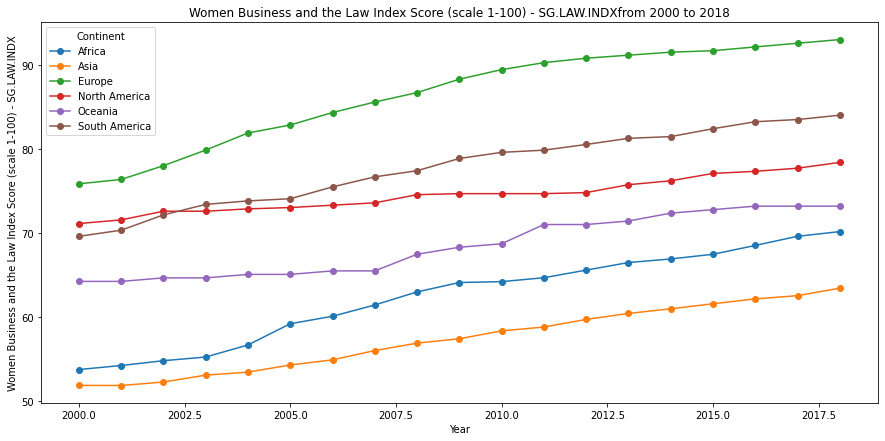

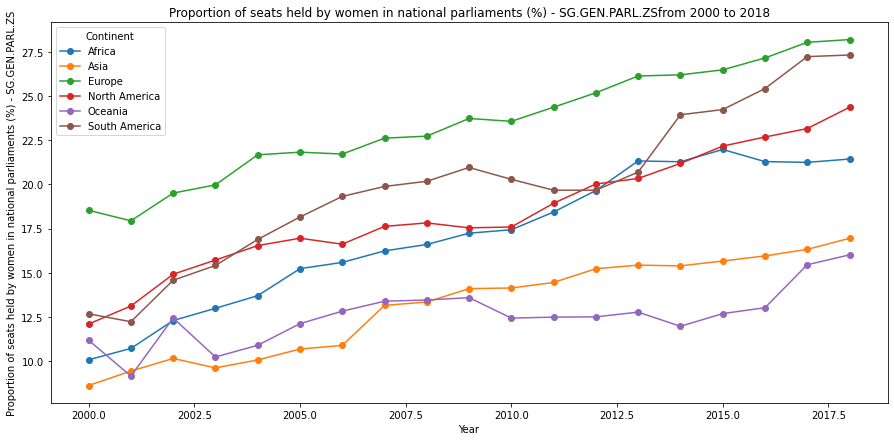

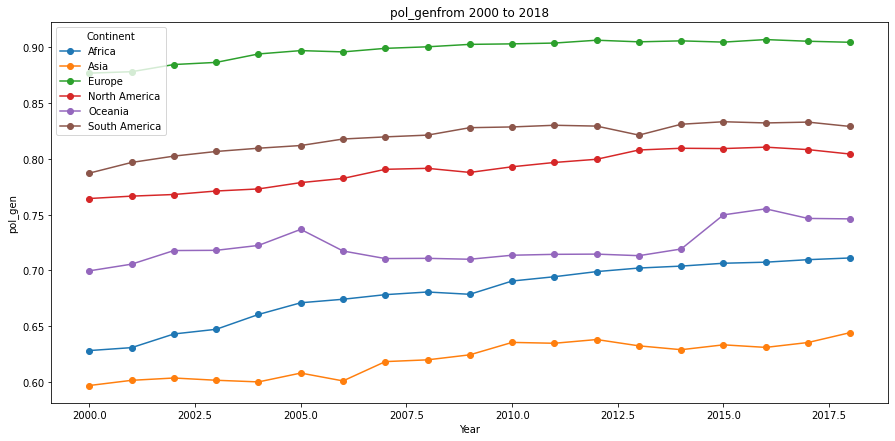

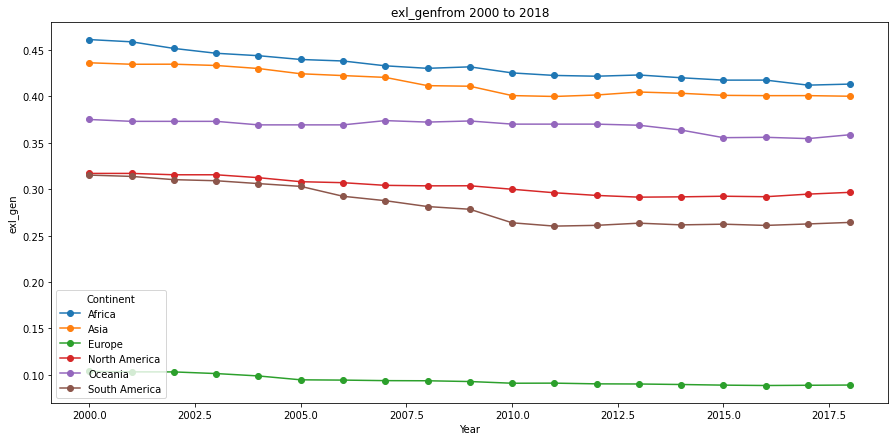

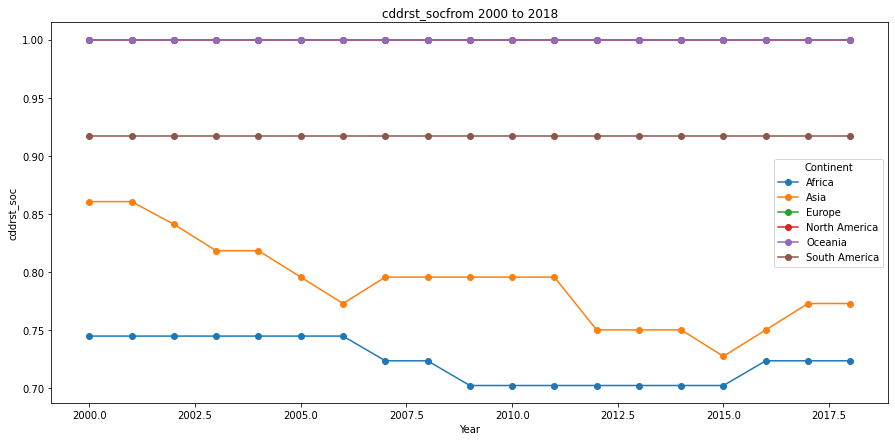

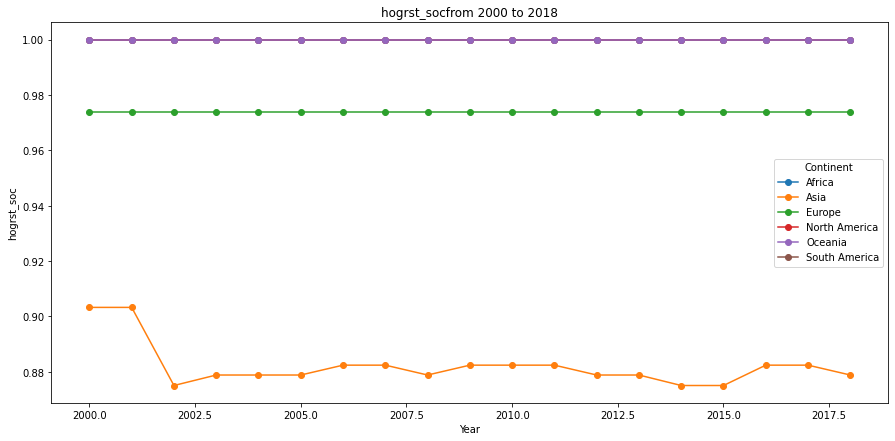

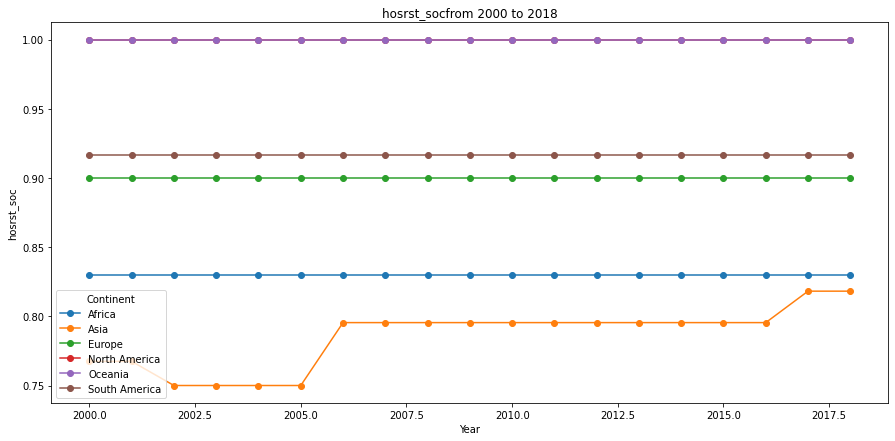

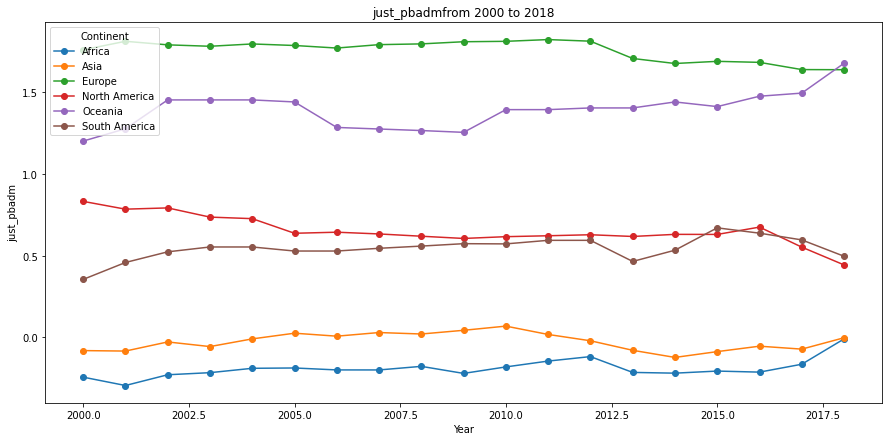

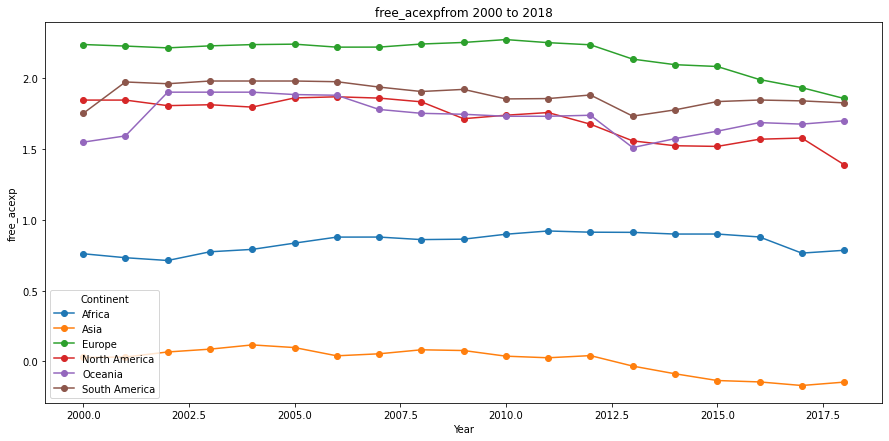

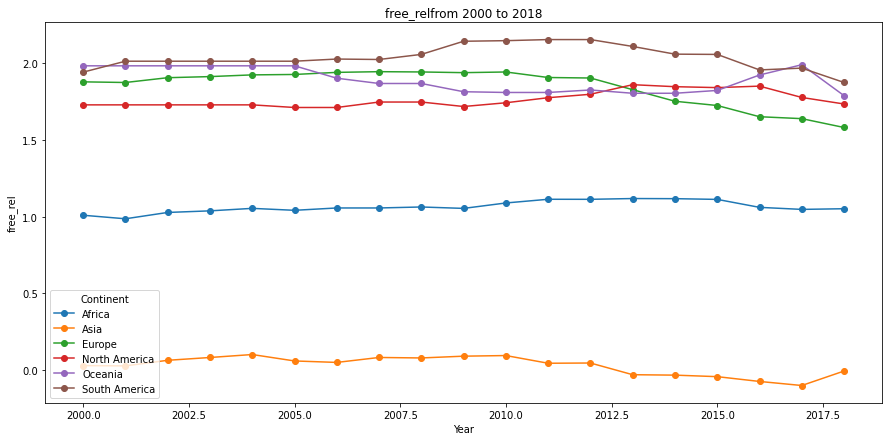

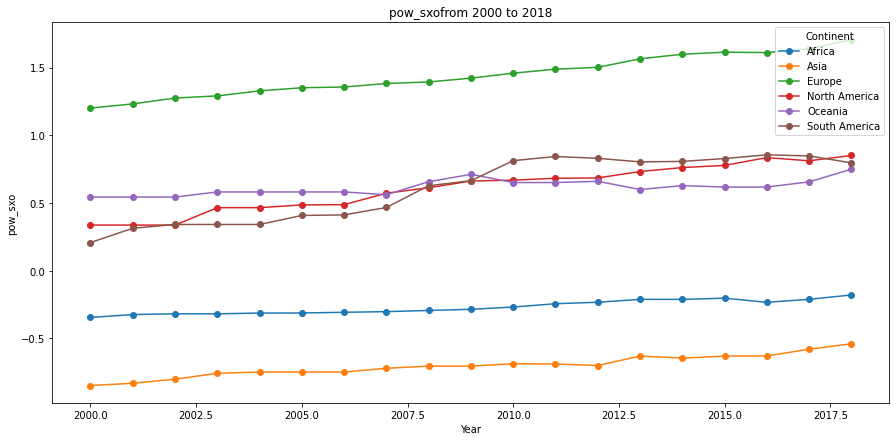

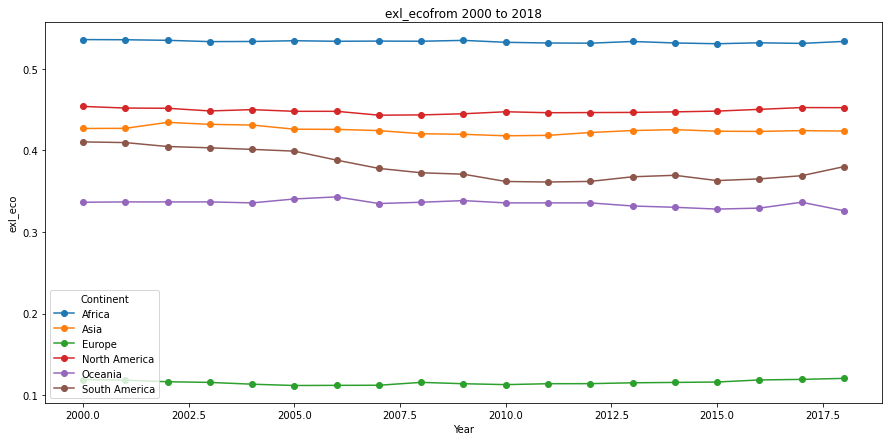

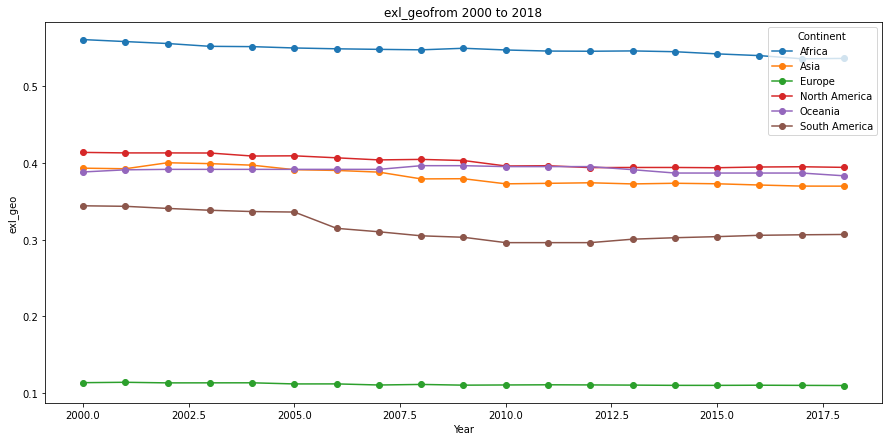

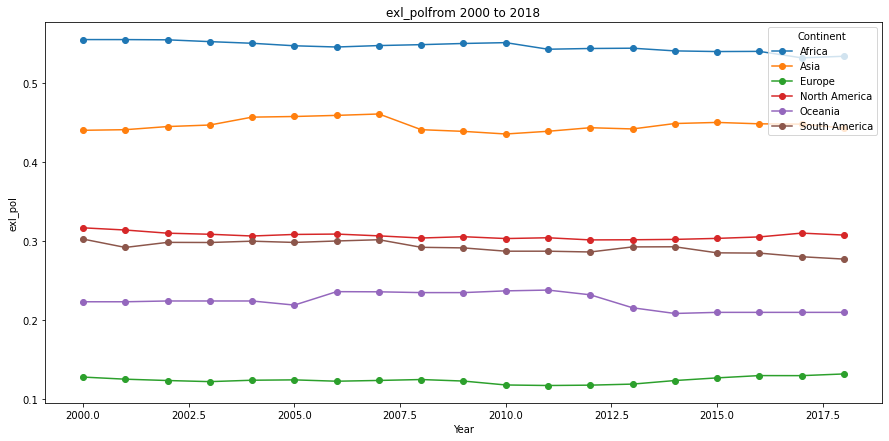

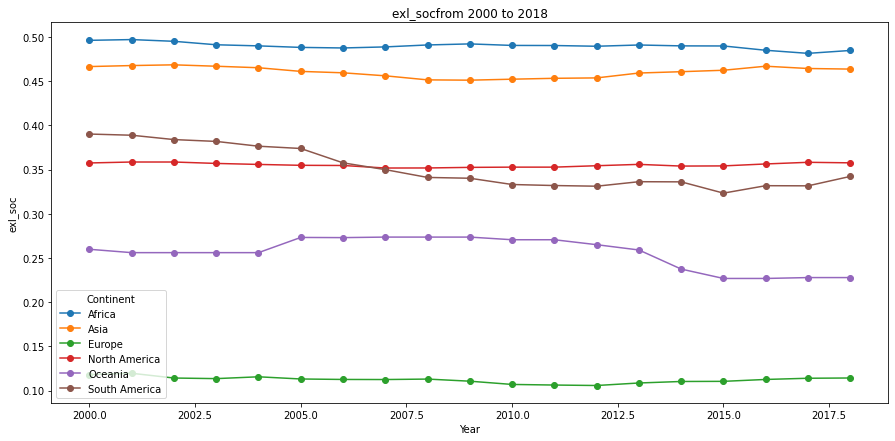

In [ ]:
for x in for_plt:
  fig, ax = plt.subplots(figsize=(15,7))
  ieq1.groupby(['Year','Continent'])[x].mean().unstack().plot(ax=ax,linestyle='-', marker='o')
  plt.title(str(x)+'from 2000 to 2018')
  plt.ylabel(x)
  plt.show()

### Region

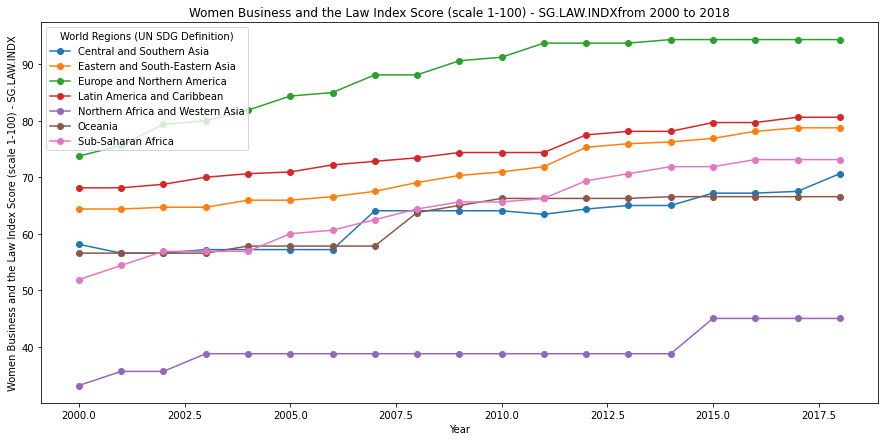

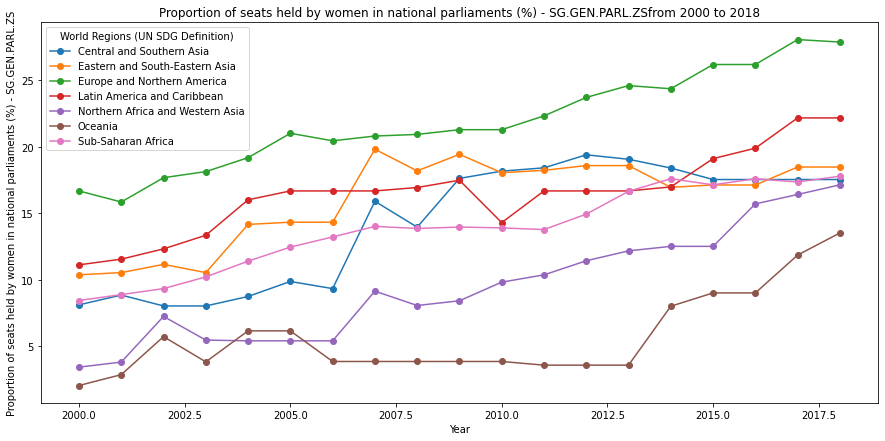

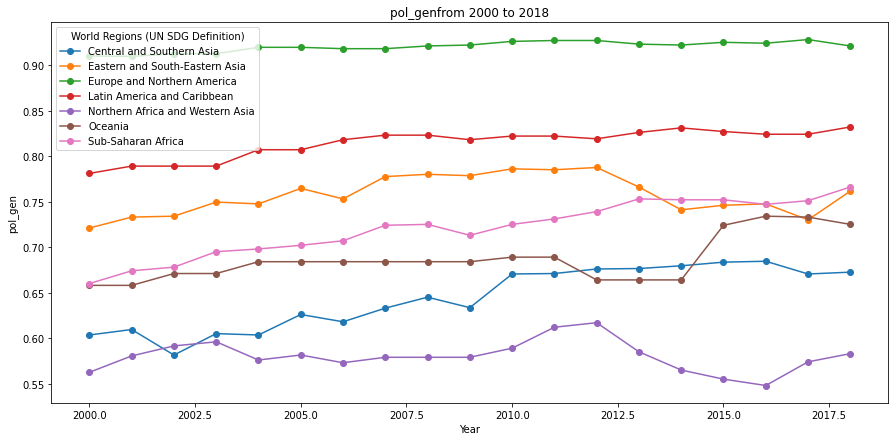

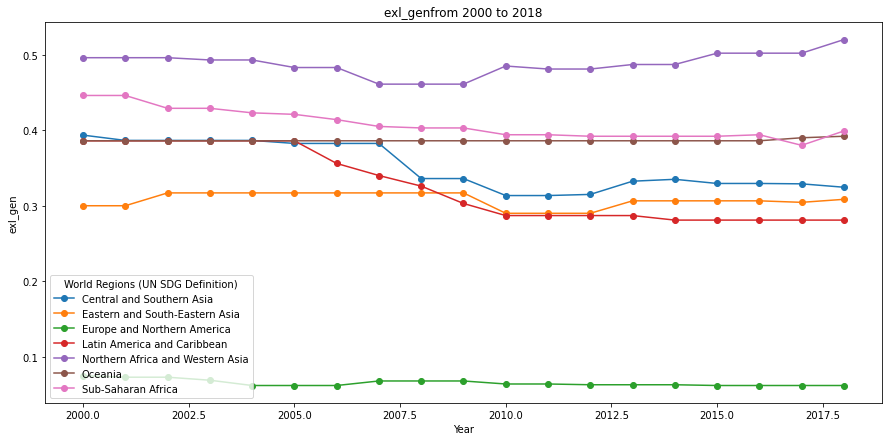

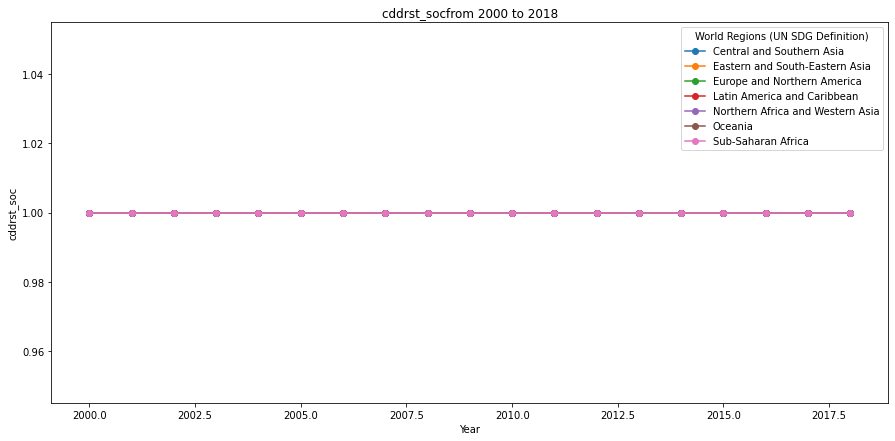

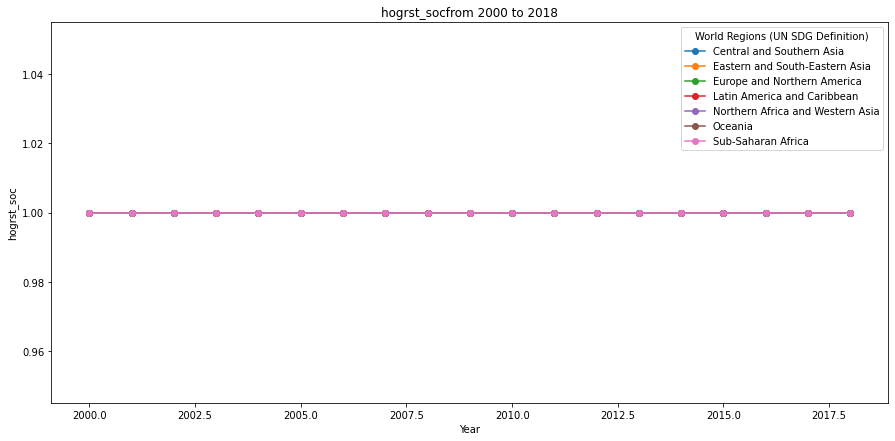

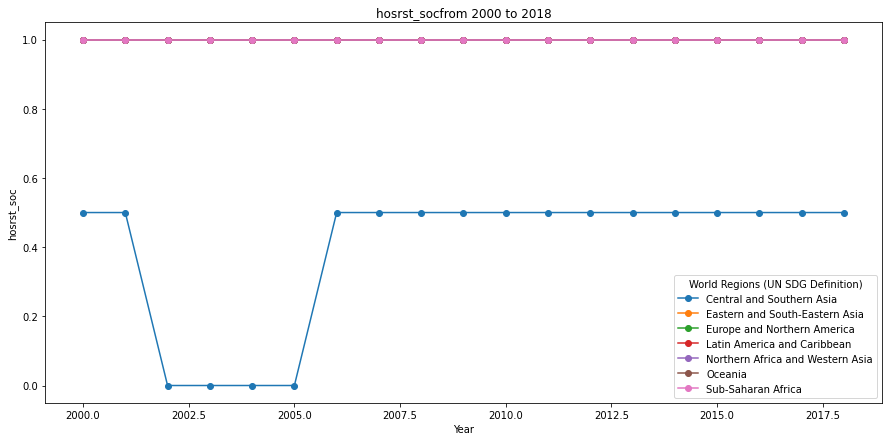

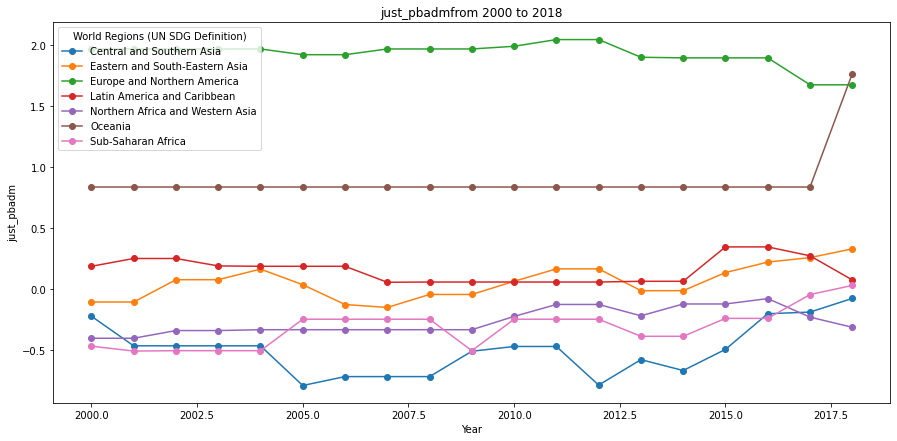

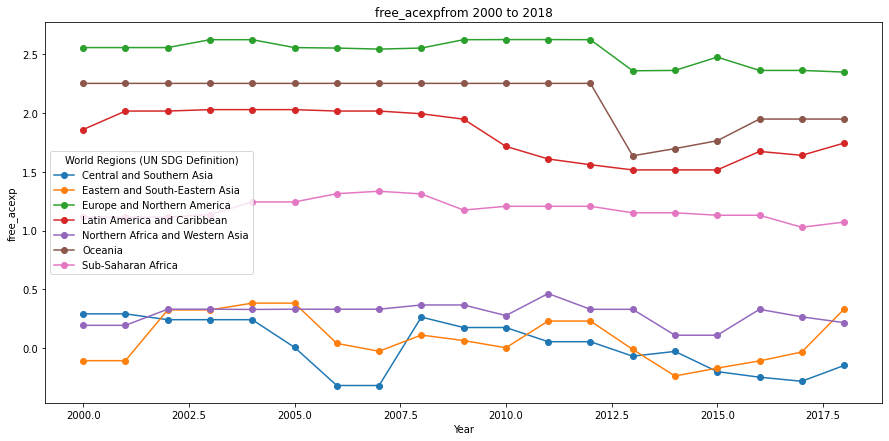

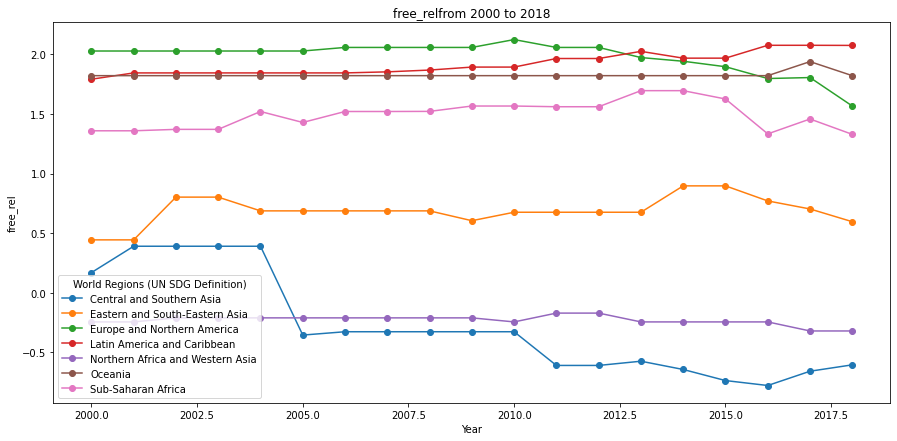

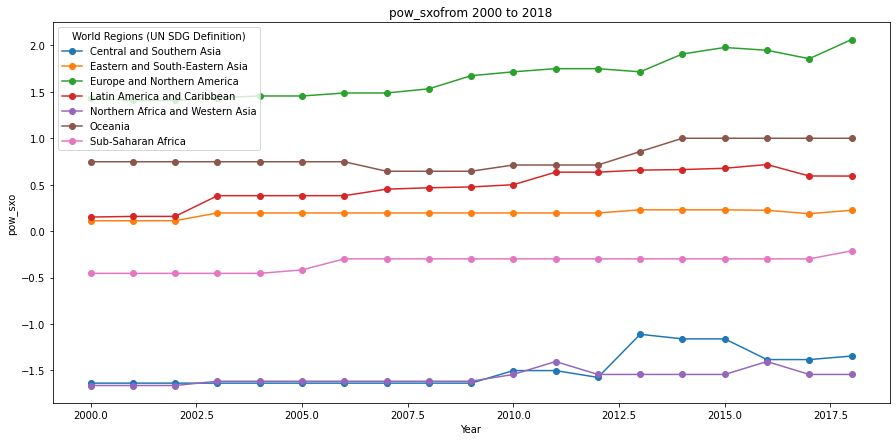

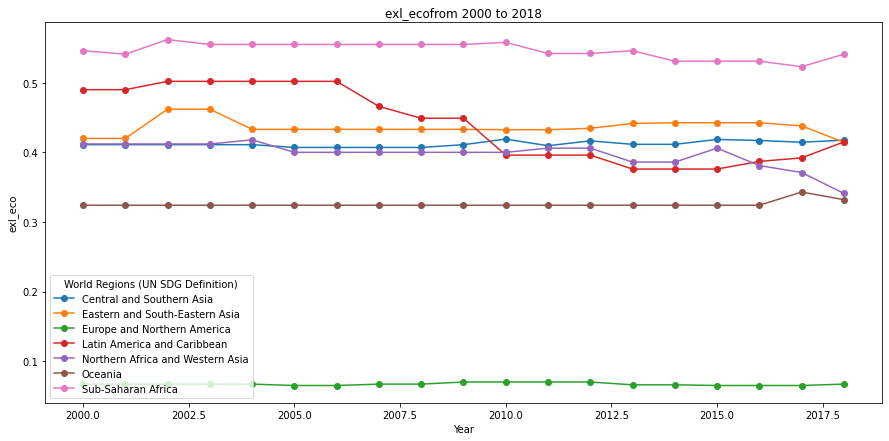

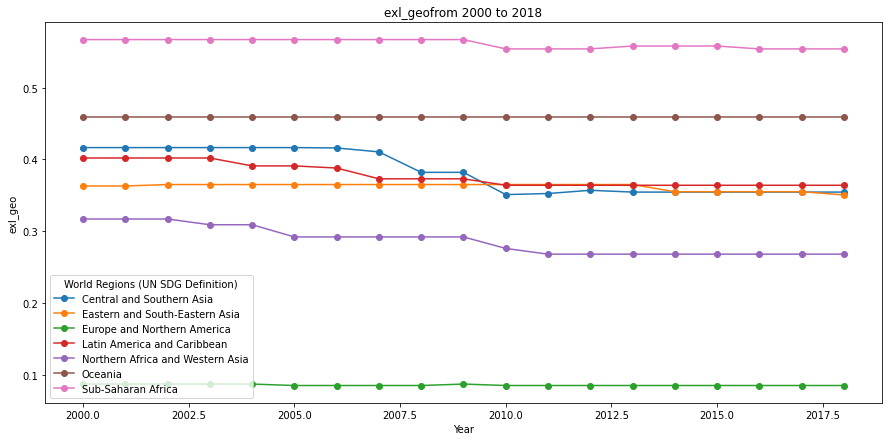

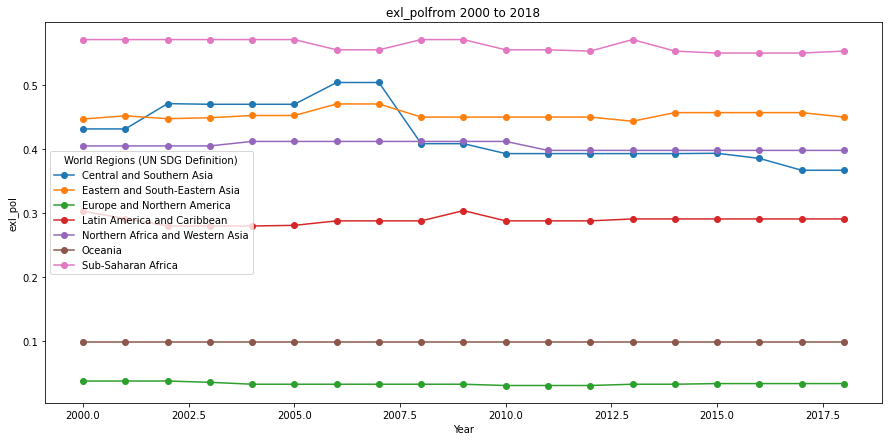

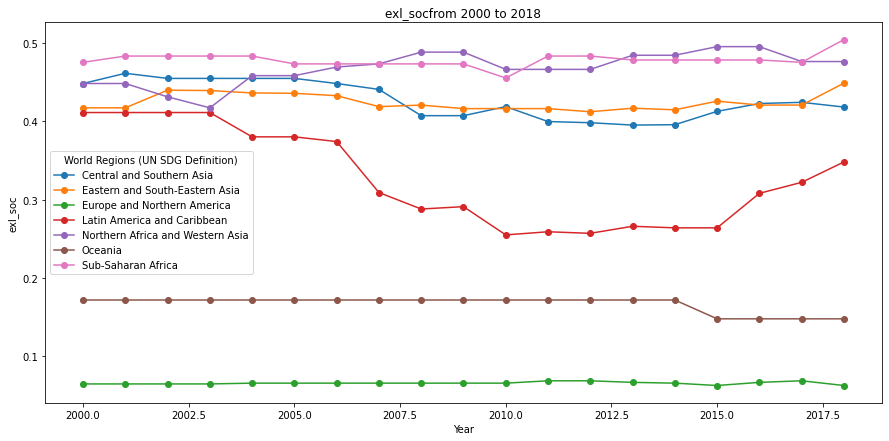

In [ ]:
for x in for_plt:
  fig, ax = plt.subplots(figsize=(15,7))
  ieq1.groupby(['Year','World Regions (UN SDG Definition)'])[x].median().unstack().plot(ax=ax,linestyle='-', marker='o')
  plt.title(str(x)+'from 2000 to 2018')
  plt.ylabel(x)
  plt.show()

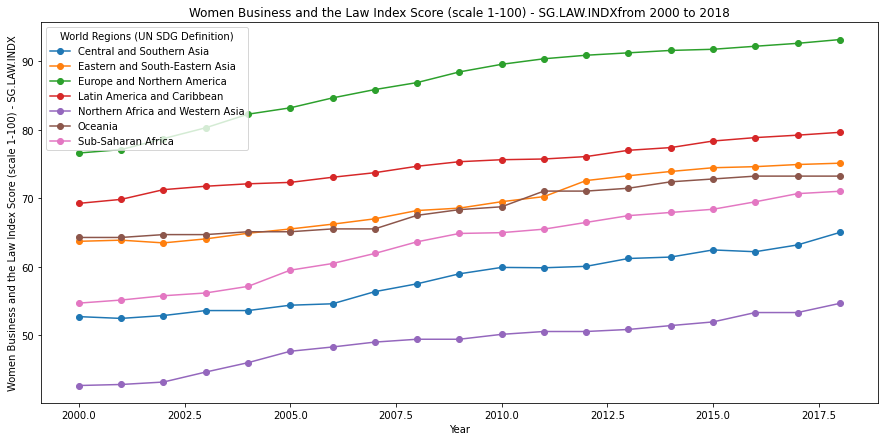

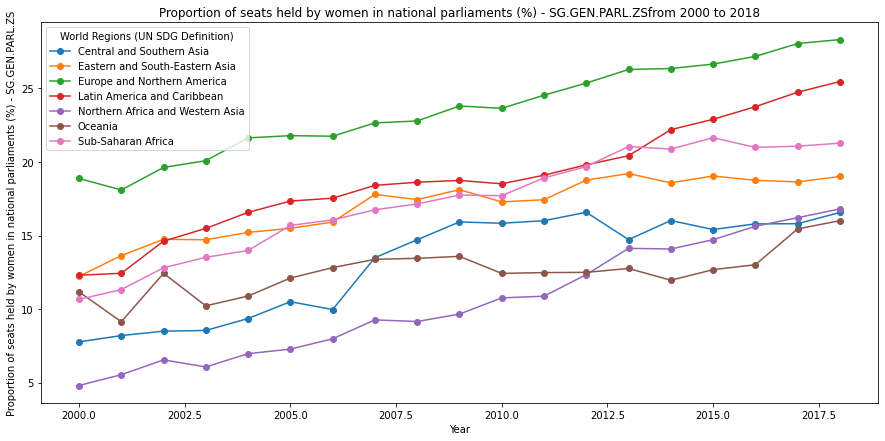

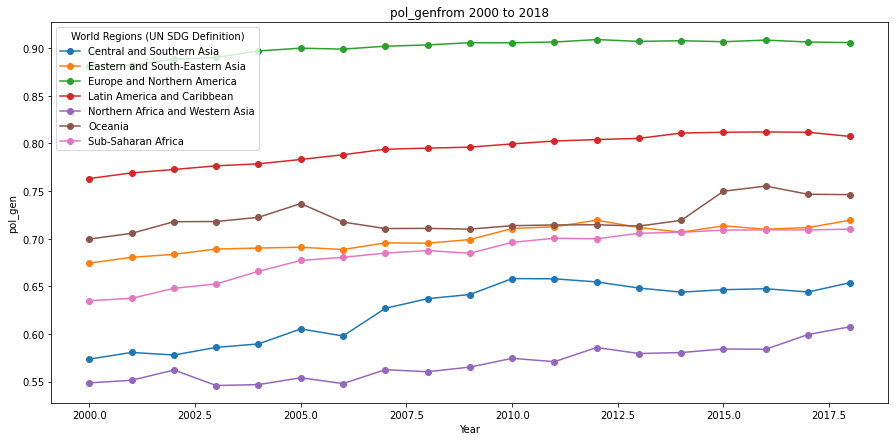

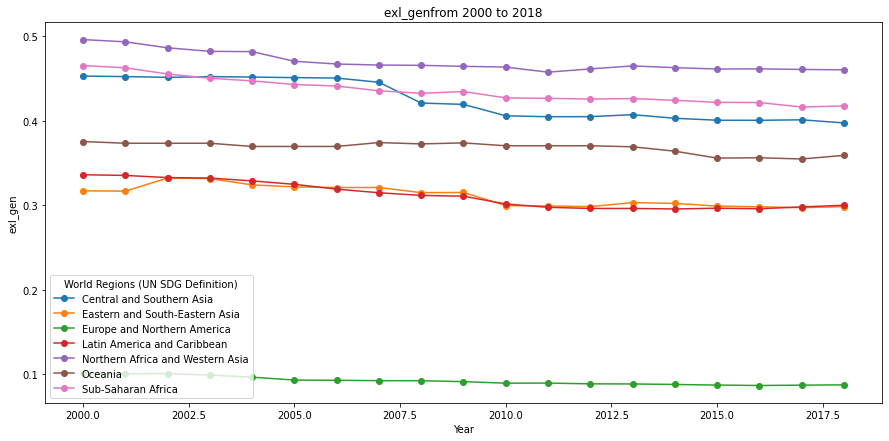

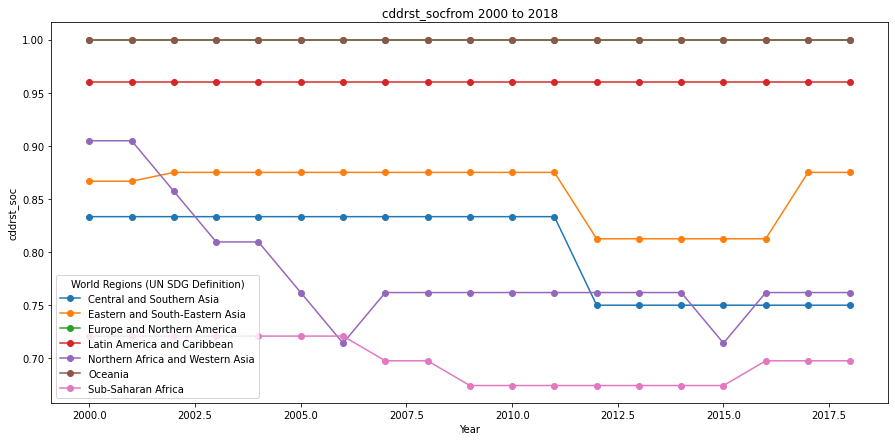

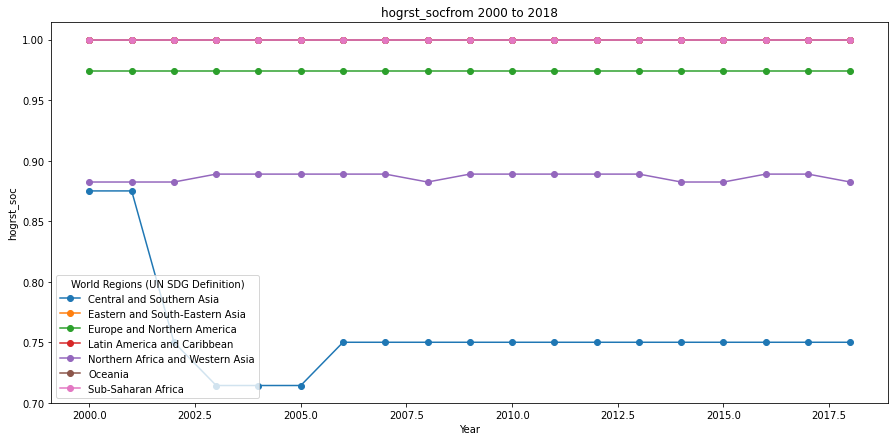

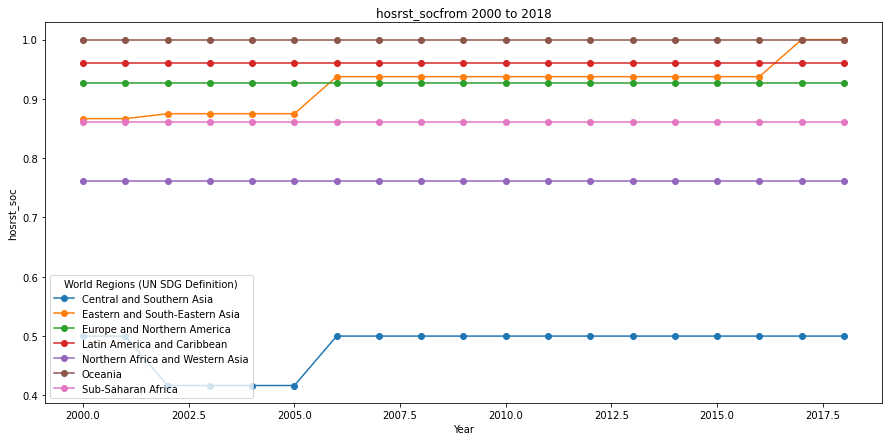

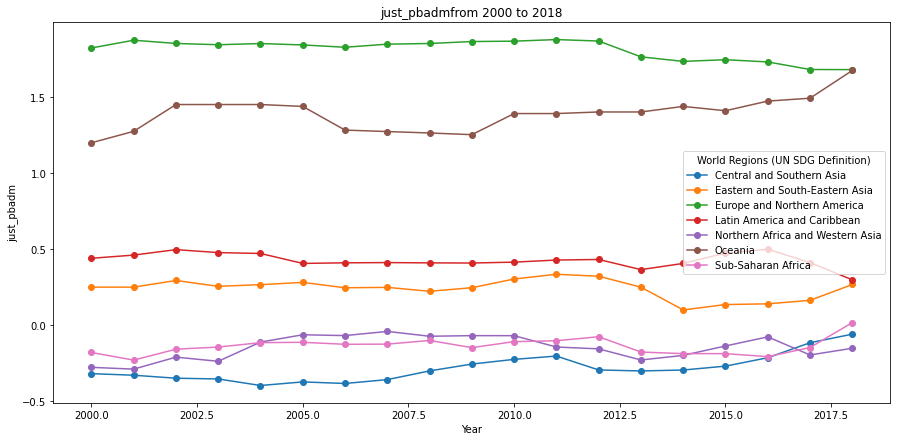

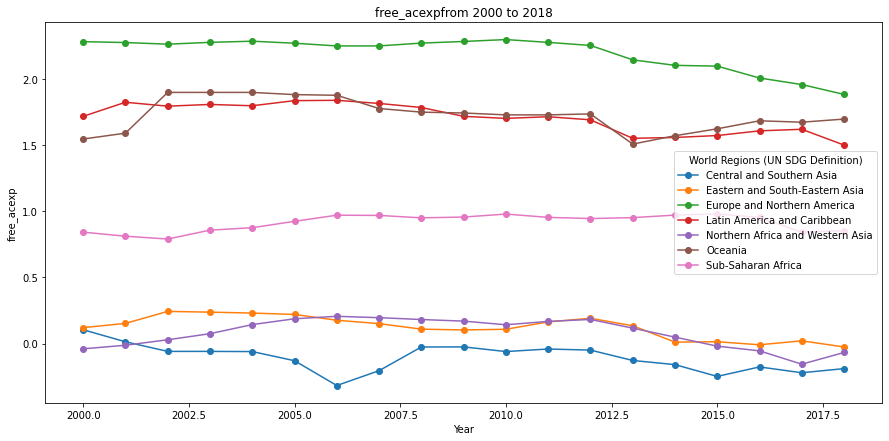

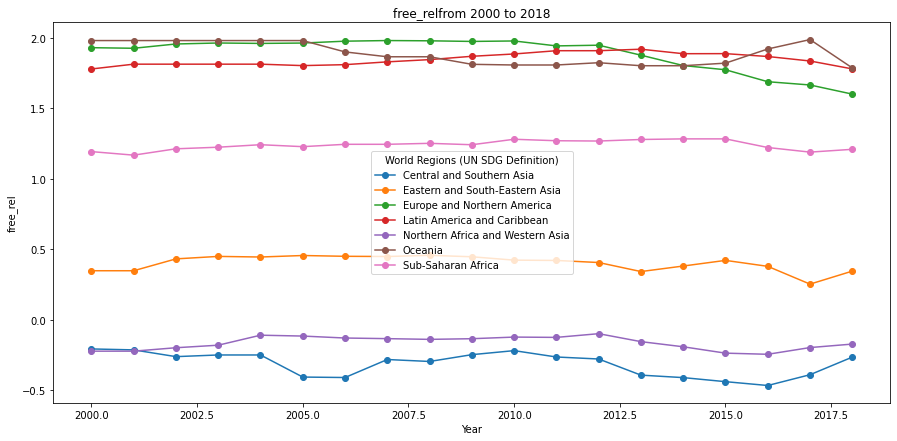

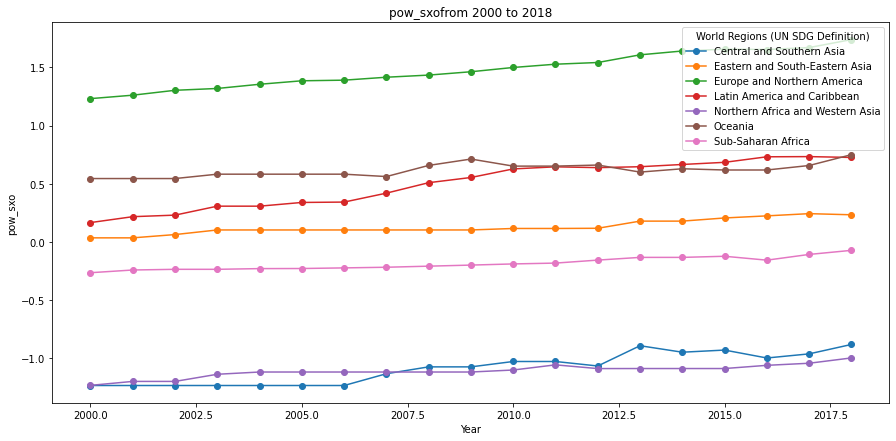

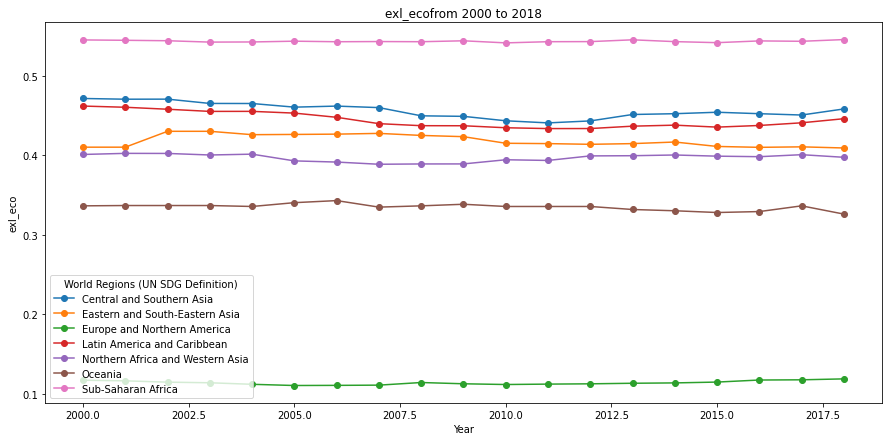

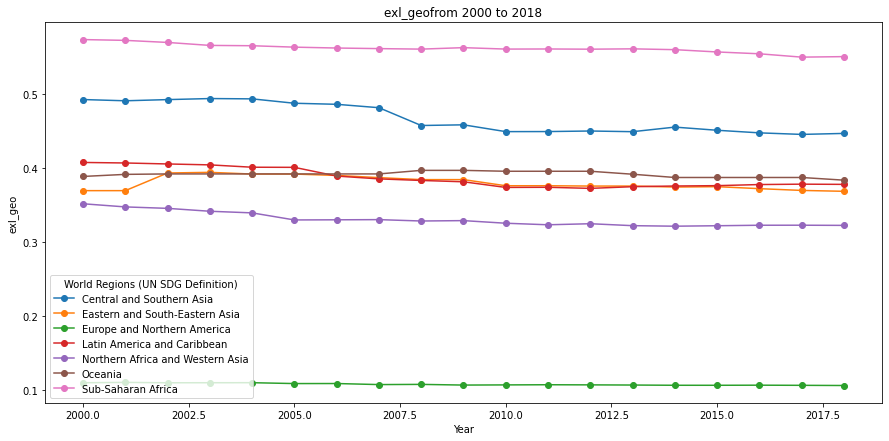

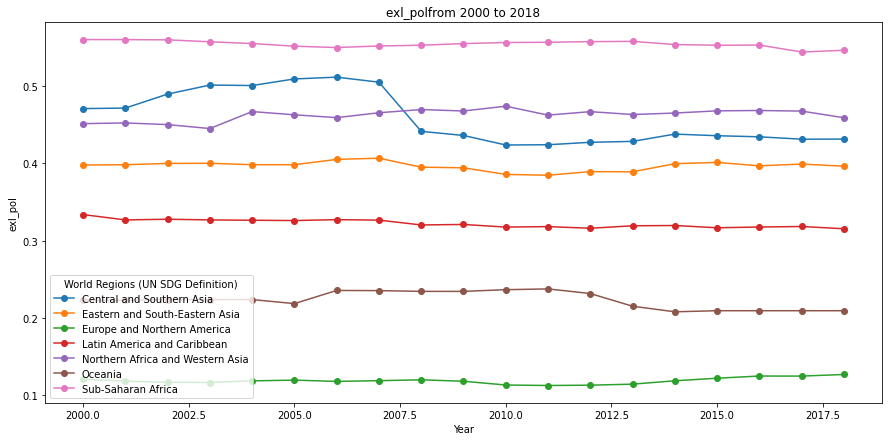

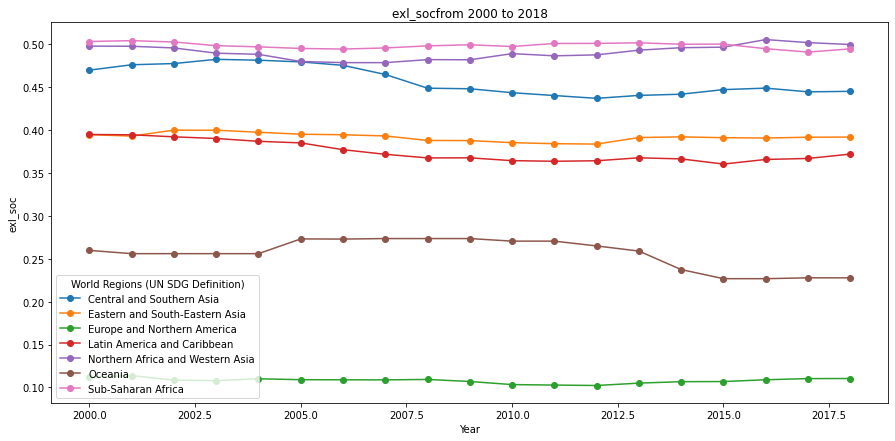

In [ ]:
for x in for_plt:
  fig, ax = plt.subplots(figsize=(15,7))
  ieq1.groupby(['Year','World Regions (UN SDG Definition)'])[x].mean().unstack().plot(ax=ax,linestyle='-', marker='o')
  plt.title(str(x)+'from 2000 to 2018')
  plt.ylabel(x)
  plt.show()

### Regime Type

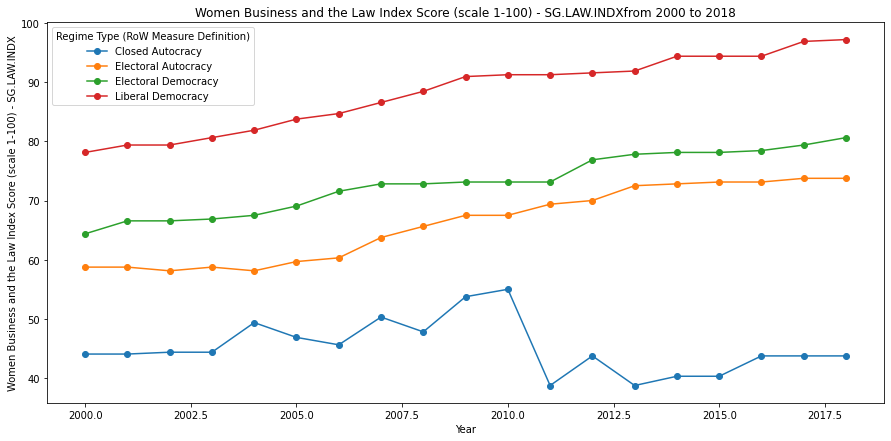

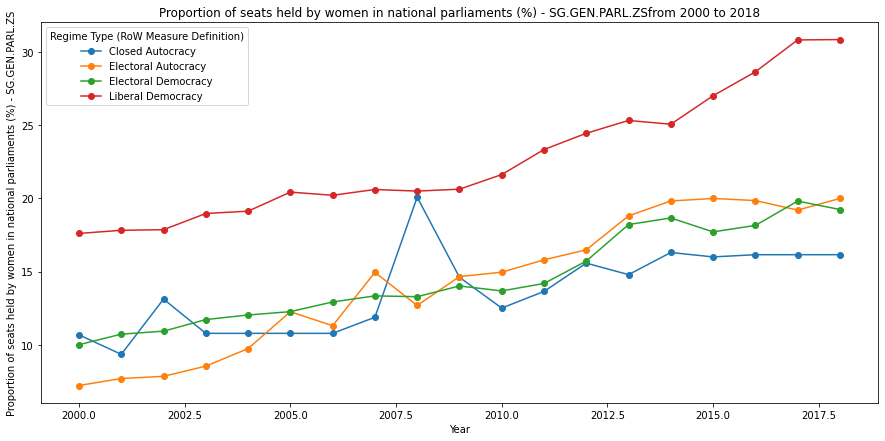

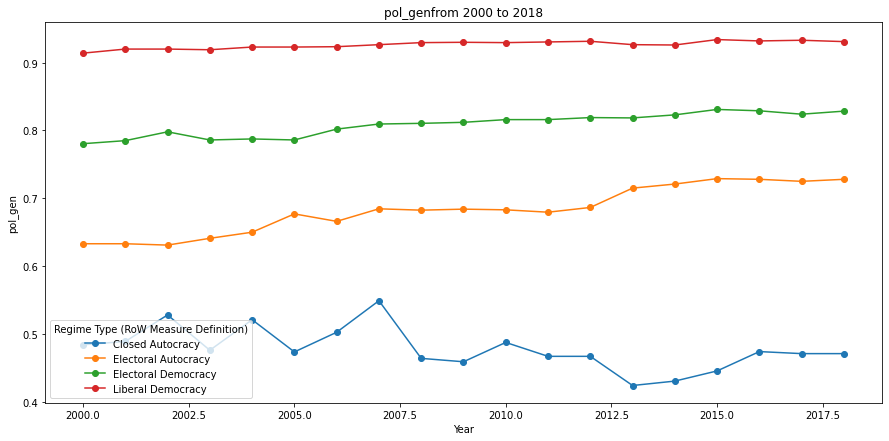

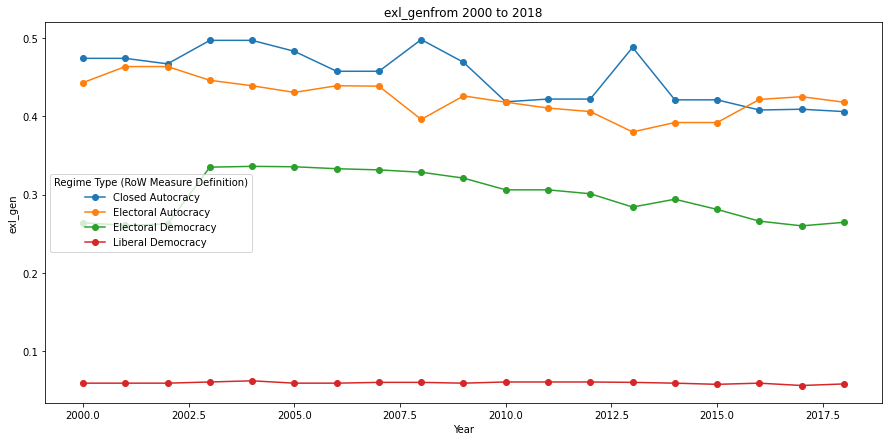

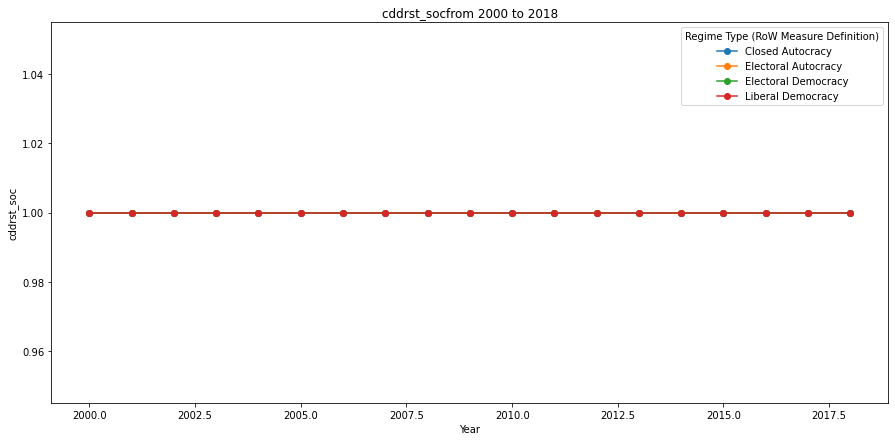

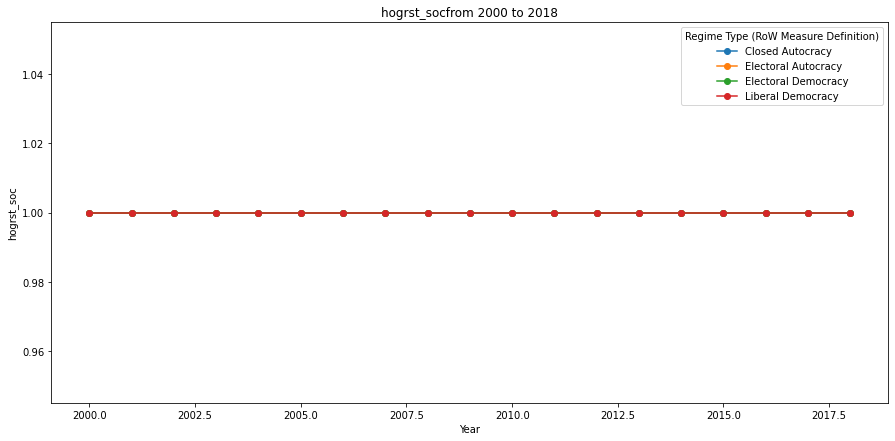

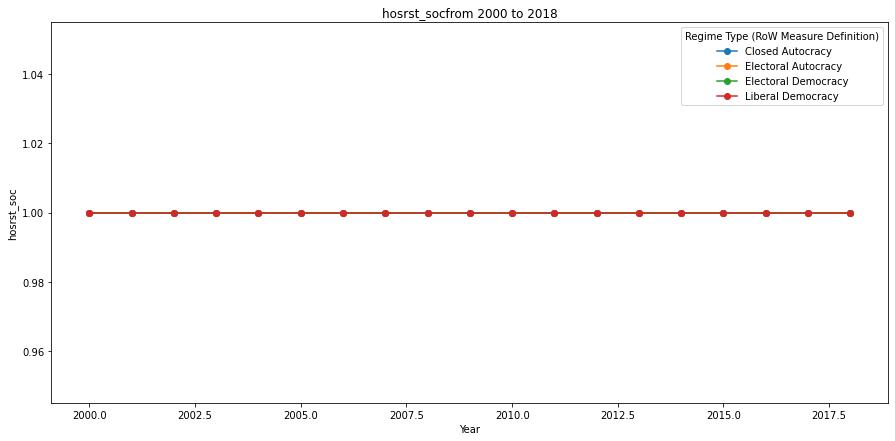

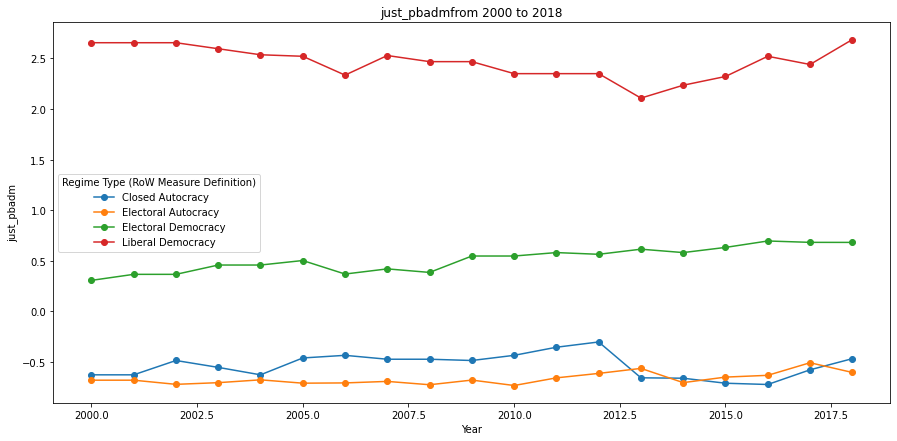

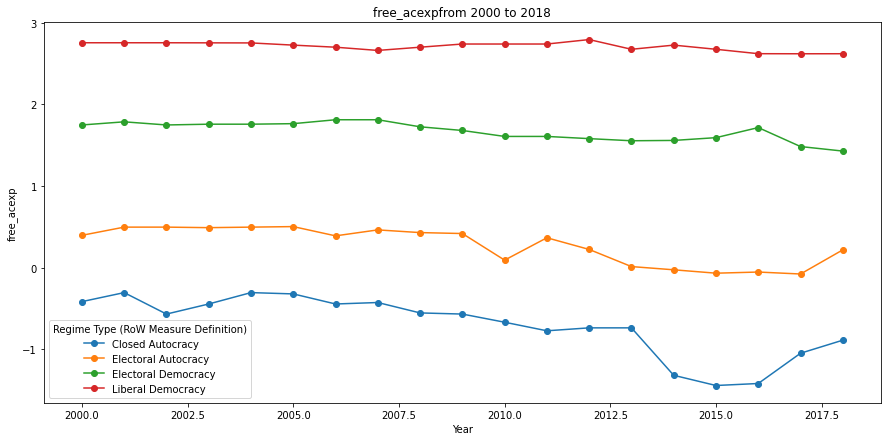

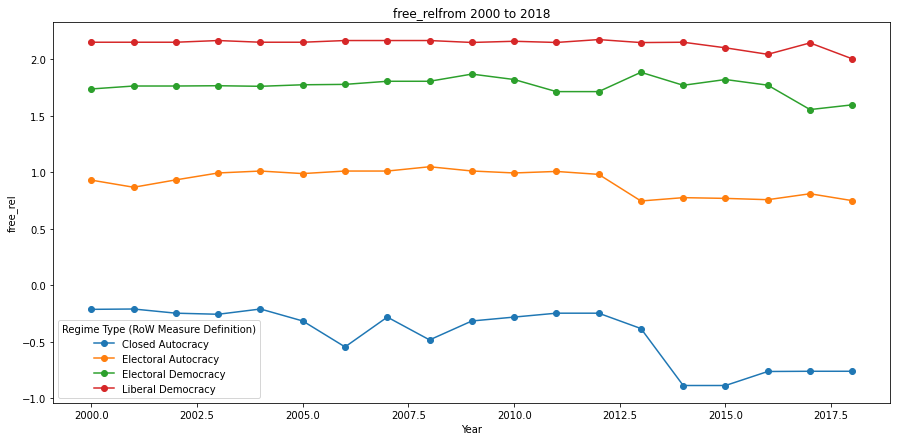

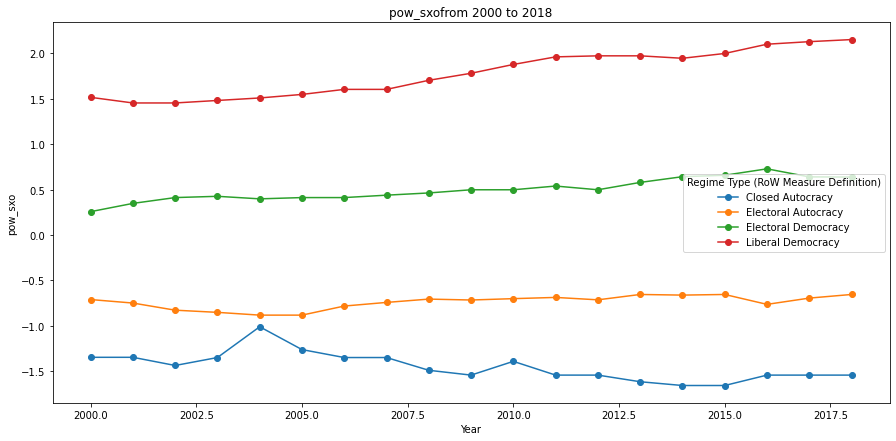

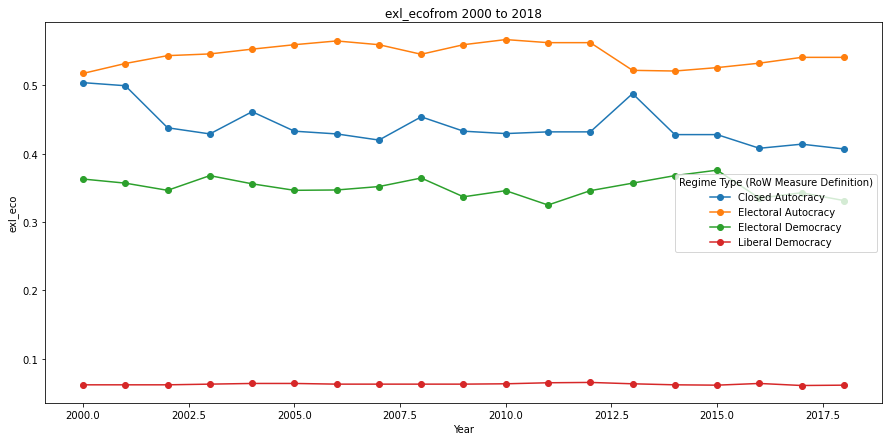

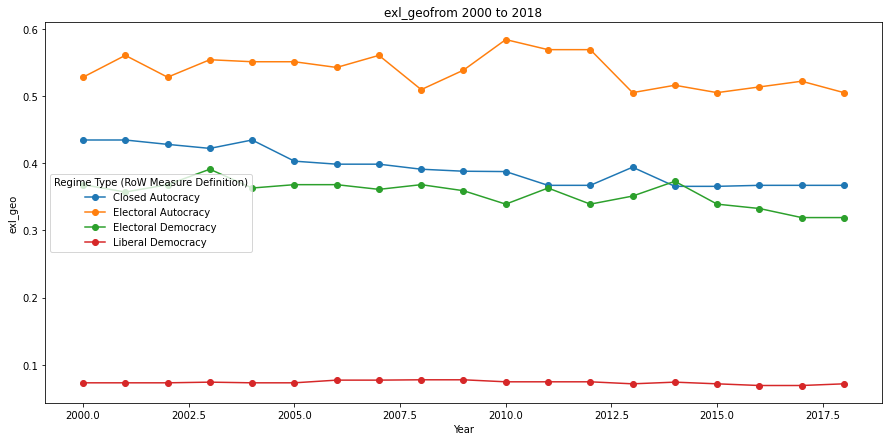

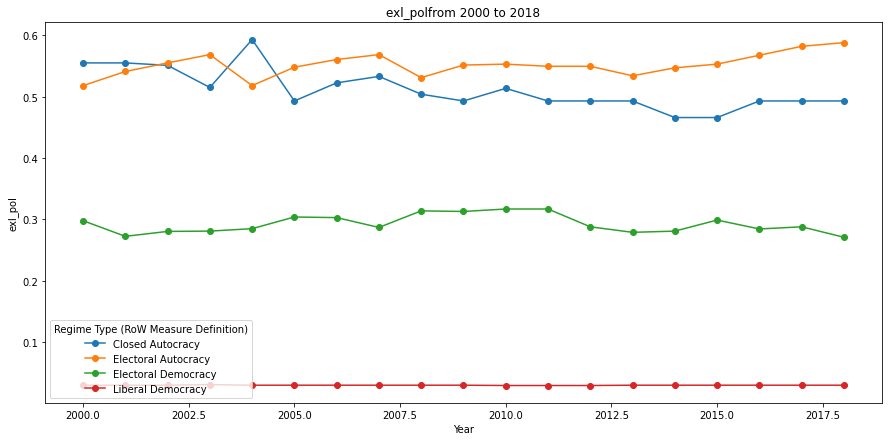

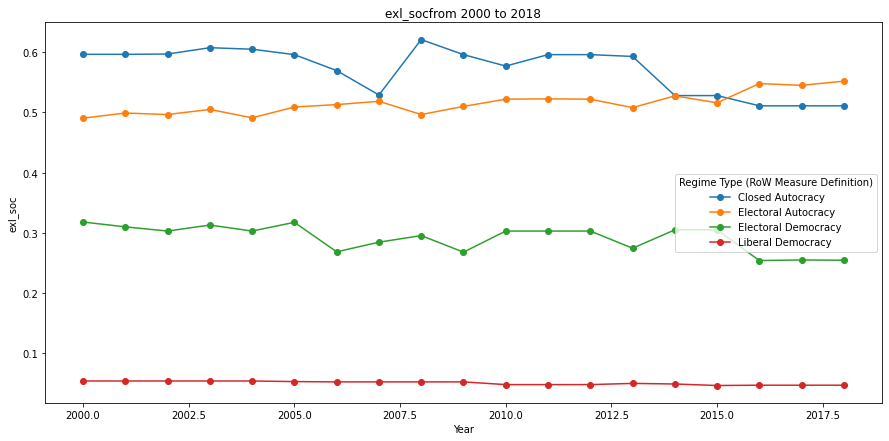

In [ ]:
for x in for_plt:
  fig, ax = plt.subplots(figsize=(15,7))
  ieq1.groupby(['Year','Regime Type (RoW Measure Definition)'])[x].median().unstack().plot(ax=ax,linestyle='-', marker='o')
  plt.title(str(x)+'from 2000 to 2018')
  plt.ylabel(x)
  plt.show()

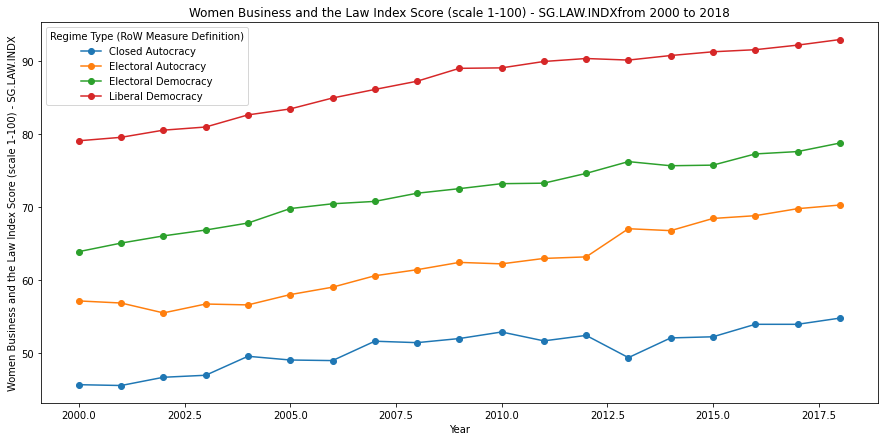

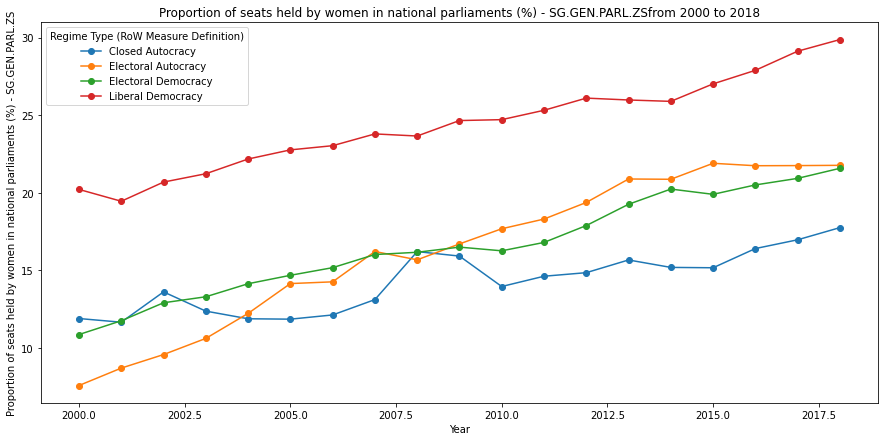

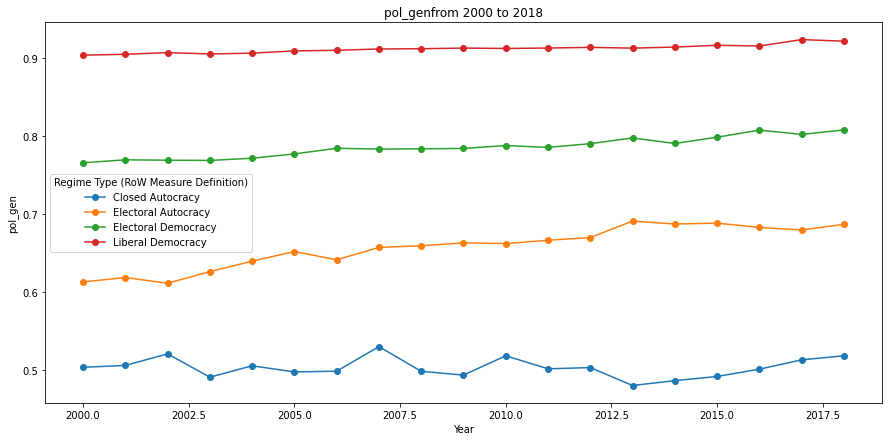

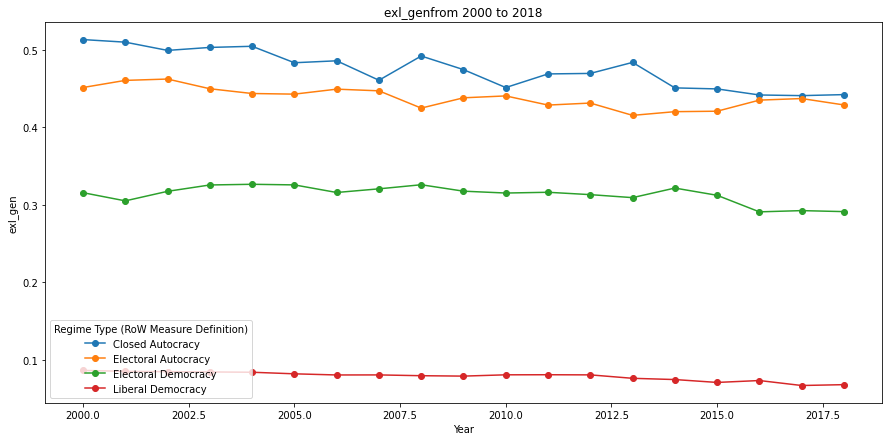

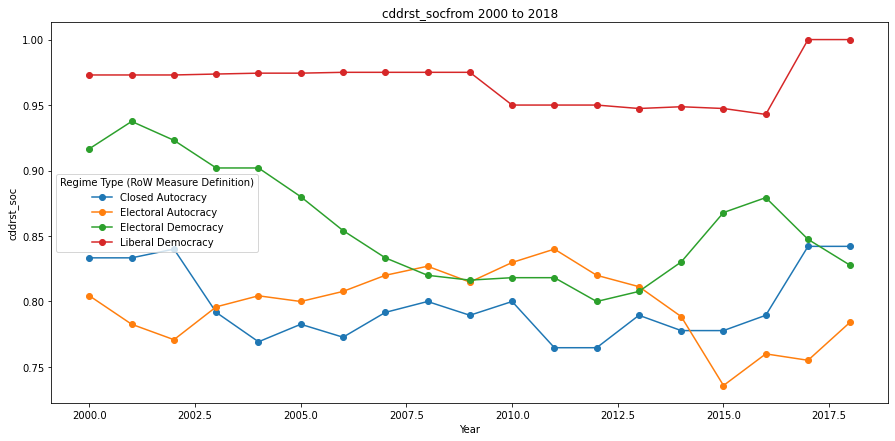

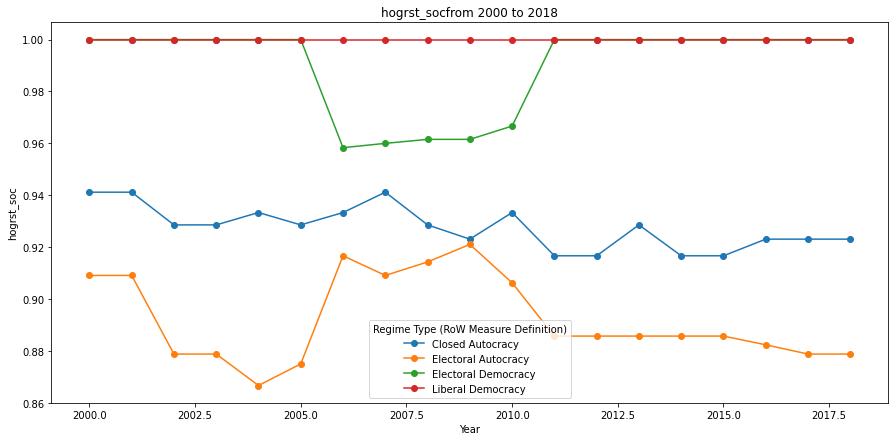

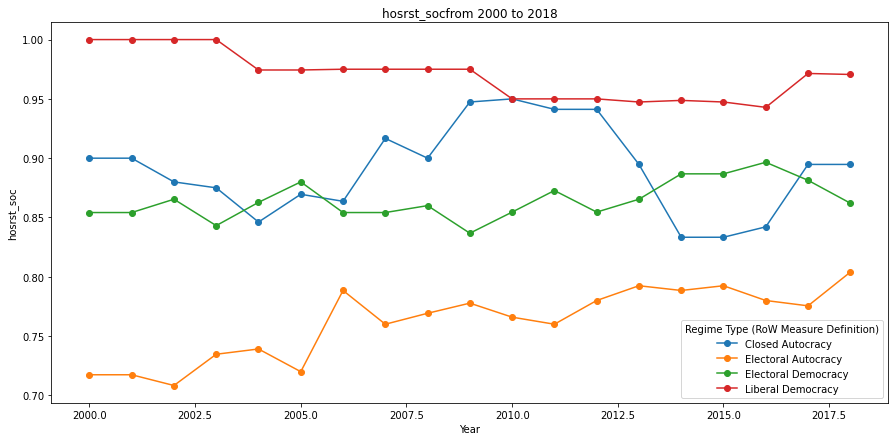

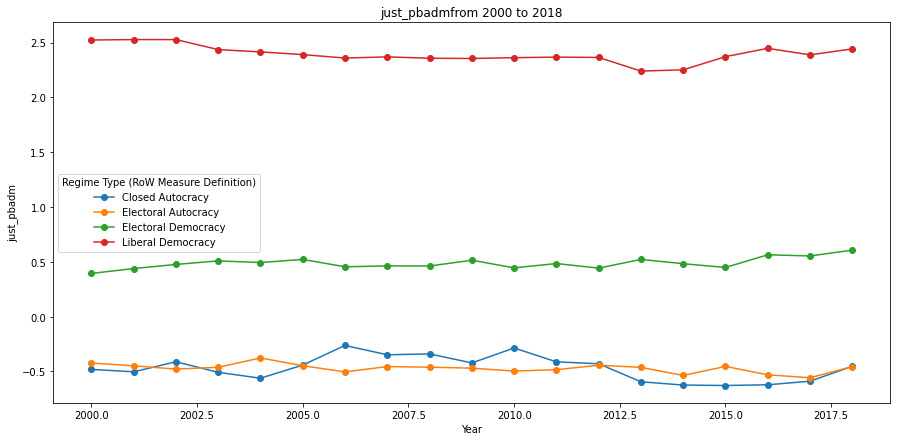

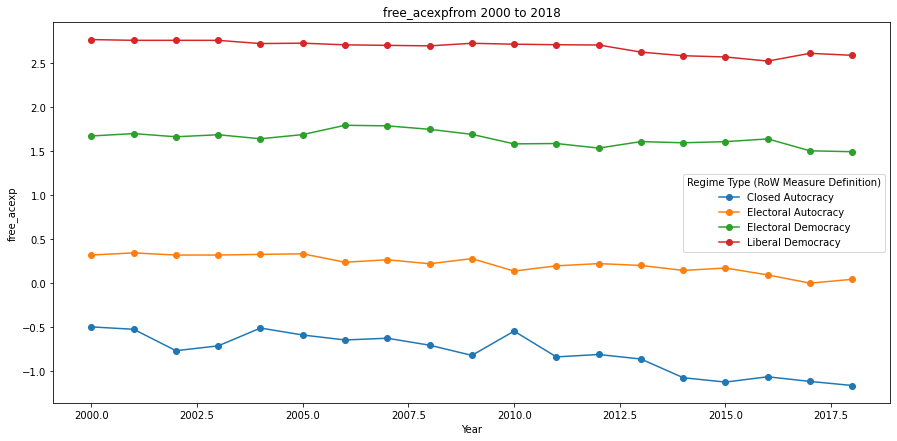

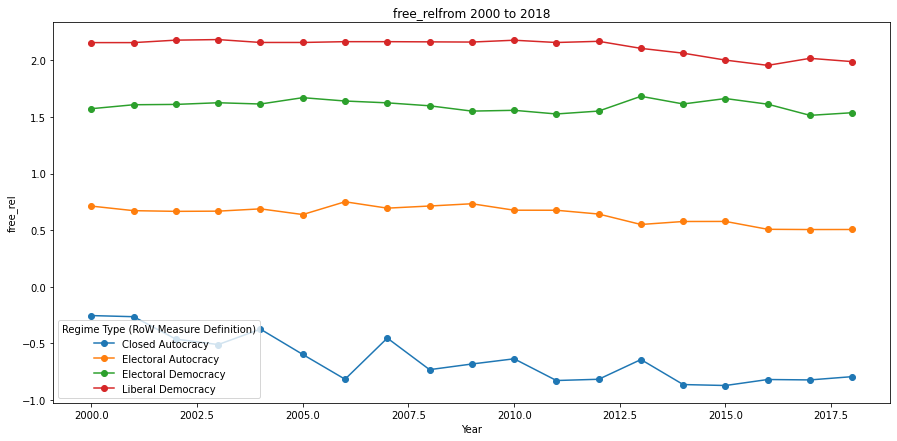

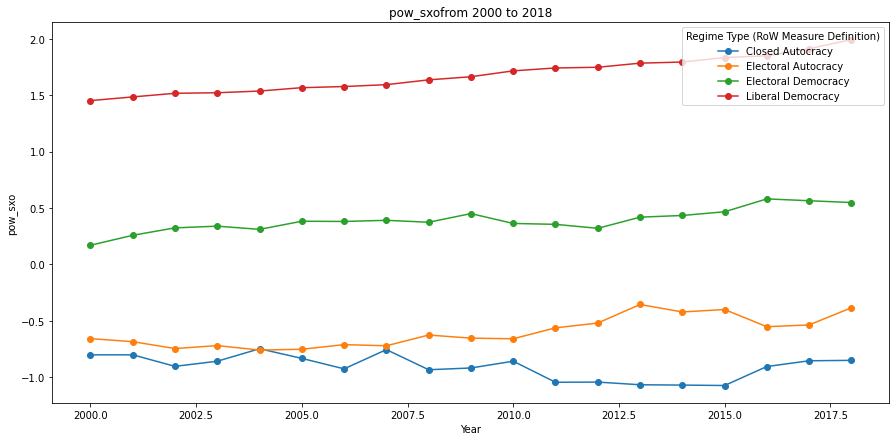

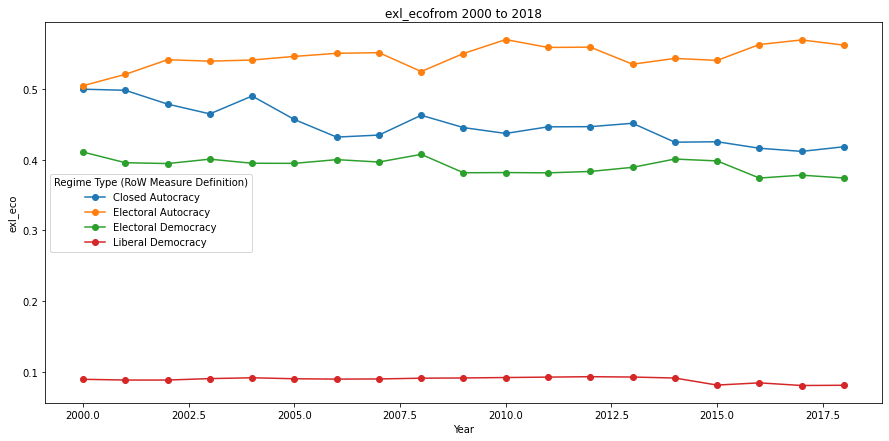

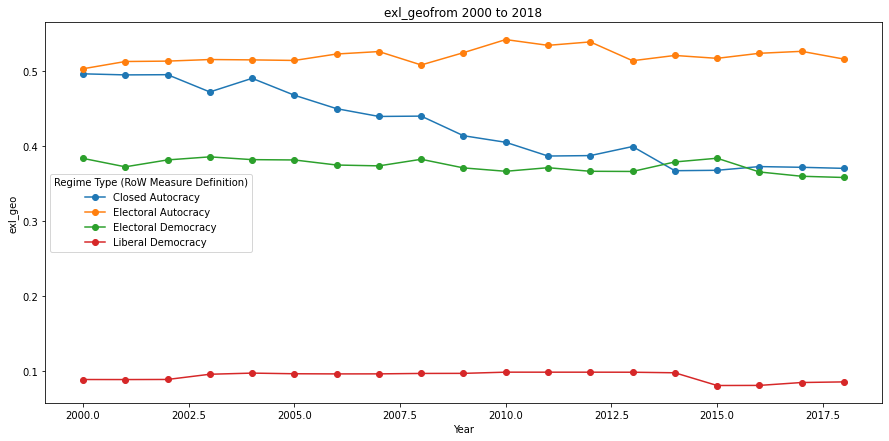

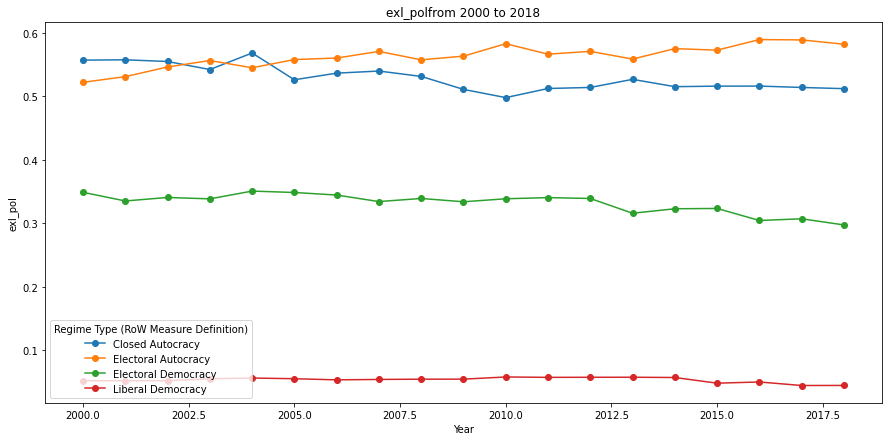

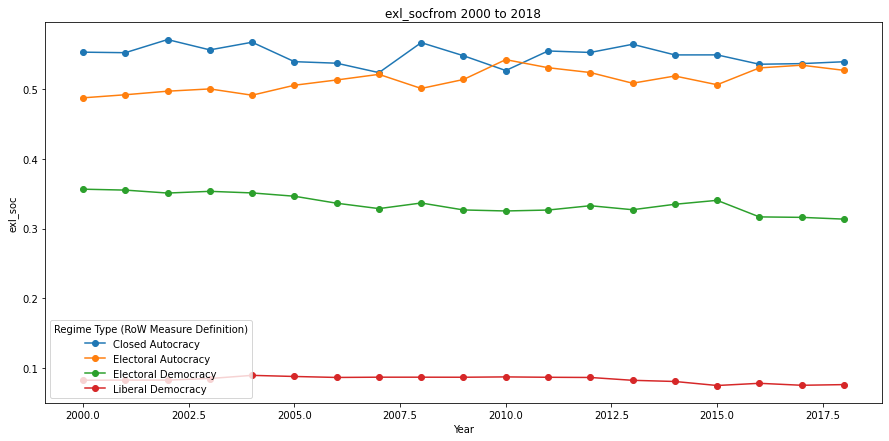

In [ ]:
for x in for_plt:
  fig, ax = plt.subplots(figsize=(15,7))
  ieq1.groupby(['Year','Regime Type (RoW Measure Definition)'])[x].mean().unstack().plot(ax=ax,linestyle='-', marker='o')
  plt.title(str(x)+'from 2000 to 2018')
  plt.ylabel(x)
  plt.show()

## Data Cleaning - fixing nulls

### Overall

In [4]:
ieq1.dtypes

Country Name_x                                                                     object
Country Code                                                                       object
Year                                                                                int64
Continent                                                                          object
World Regions (UN SDG Definition)                                                  object
Regime Type (RoW Measure Definition)                                               object
Income Classification (World Bank Definition)                                      object
Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX                float64
Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS    float64
Country Name_y                                                                     object
just_pbadm                                                                        float64
free_acexp

In [3]:
# Check the nulls
ieq1.isnull().sum()

## All the tg2 indicators has around 190 nulls, let's invitigate

Country Name_x                                                                       0
Country Code                                                                         0
Year                                                                                 0
Continent                                                                            2
World Regions (UN SDG Definition)                                                    2
Regime Type (RoW Measure Definition)                                               211
Income Classification (World Bank Definition)                                        2
Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX                  76
Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS     225
Country Name_y                                                                     190
just_pbadm                                                                         190
free_acexp                                 

### tg2 indicators

In [6]:
# What countries are not included in the tg2 dataset?
countries_todrop = ieq1.loc[ieq1['Country Name_y'].isnull()]['Country Name_x'].unique()
countries_todrop

array(['Aruba', 'Antigua and Barbuda', 'Bahamas, The', 'Belize',
       'Brunei Darussalam', 'Dominica', 'St. Lucia', 'Macao SAR, China',
       'Tonga', 'St. Vincent and the Grenadines'], dtype=object)

In [7]:
# Check which regions the above countries belong to
ieq1.loc[ieq1['Country Name_y'].isnull()][['Country Name_x','World Regions (UN SDG Definition)']].value_counts()

## The majority seems to be 'Latin America and Caribbean'
## though it will affect the overall 'Latin America and Caribbean' data
## these countries have too much nulls so we will have to drop them
## This shall be revisit as a key limitation

Country Name_x                  World Regions (UN SDG Definition)
Tonga                           Oceania                              19
St. Vincent and the Grenadines  Latin America and Caribbean          19
St. Lucia                       Latin America and Caribbean          19
Macao SAR, China                Eastern and South-Eastern Asia       19
Dominica                        Latin America and Caribbean          19
Brunei Darussalam               Eastern and South-Eastern Asia       19
Belize                          Latin America and Caribbean          19
Bahamas, The                    Latin America and Caribbean          19
Aruba                           Latin America and Caribbean          19
Antigua and Barbuda             Latin America and Caribbean          19
dtype: int64

In [9]:
# Drop the above countries
for i in range(ieq1.shape[0]):
  if ieq1['Country Name_x'][i] in countries_todrop:
    ieq1 = ieq1.drop(i)
ieq1.reset_index(inplace=True,drop=True)

# Check the shape and nulls
print(ieq1.shape,ieq1.isnull().sum(), sep='\n\n\n')

(3097, 24)


Country Name_x                                                                       0
Country Code                                                                         0
Year                                                                                 0
Continent                                                                            2
World Regions (UN SDG Definition)                                                    2
Regime Type (RoW Measure Definition)                                                21
Income Classification (World Bank Definition)                                        2
Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX                  38
Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS     166
Country Name_y                                                                       0
just_pbadm                                                                           0
free_acexp                    

In [10]:
# Since the 'HOG restirction' and 'Proportion of seats held by women' have big number of nulls
# also the are very similar to the indicators 'HOS restriction'&'Candidate restriction' and 'Female Political Empowerment'
# they are to be dropped
ieq1 = ieq1.drop(columns=['hogrst_soc','Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS'])

## Now let's move on to fix individual nulls
## starting from the indicator that has the least nulls

#### Exclusion by political groups

In [11]:
# Check what countries has nulls
ieq1.loc[ieq1['exl_pol'].isnull()]['Country Name_x'].value_counts()

Haiti    5
Iraq     4
Name: Country Name_x, dtype: int64

In [12]:
# Let's take a look at Haiti
haiti = ieq1.loc[ieq1['Country Name_x']=='Haiti']
haiti

## As shown above, all exclusion indicators are highly correlated
## since most exclusion values are identical/very similar throughout the year
## it is reasonable to impute the next available value

Country Name_x Country Code  Year  ... exl_geo exl_pol exl_soc
1216          Haiti          HTI  2000  ...   0.871     NaN   0.637
1217          Haiti          HTI  2001  ...   0.871     NaN   0.637
1218          Haiti          HTI  2002  ...   0.871     NaN   0.637
1219          Haiti          HTI  2003  ...   0.871     NaN   0.637
1220          Haiti          HTI  2004  ...   0.871     NaN   0.637
1221          Haiti          HTI  2005  ...   0.871   0.338   0.637
1222          Haiti          HTI  2006  ...   0.871   0.338   0.637
1223          Haiti          HTI  2007  ...   0.871   0.330   0.637
1224          Haiti          HTI  2008  ...   0.871   0.330   0.637
1225          Haiti          HTI  2009  ...   0.871   0.330   0.637
1226          Haiti          HTI  2010  ...   0.871   0.330   0.637
1227          Haiti          HTI  2011  ...   0.871   0.330   0.637
1228          Haiti          HTI  2012  ...   0.871   0.330   0.637
1229          Haiti          HTI  2013  ...   0.871   0.330   0.643
1230          Haiti          HTI  2014  ...   0.871   0.330   0.643
1231          Haiti          HTI  2015  ...   0.871   0.330   0.643
1232          Haiti          HTI  2016  ...   0.871   0.330   0.643
1233          Haiti          HTI  2017  ...   0.871   0.330   0.643
1234          Haiti          HTI  2018  ...   0.871   0.330   0.649

[19 rows x 22 columns]

In [13]:
# Let's take a look at Iraq
iraq = ieq1.loc[ieq1['Country Name_x']=='Iraq']
iraq

## As shown above, all exclusion indicators are highly correlated
## since most exclusion values are identical/very similar throughout the year
## it is reasonable to impute the next available value

Country Name_x Country Code  Year  ... exl_geo exl_pol exl_soc
1330           Iraq          IRQ  2000  ...   0.709     NaN   0.881
1331           Iraq          IRQ  2001  ...   0.709     NaN   0.881
1332           Iraq          IRQ  2002  ...   0.709     NaN   0.881
1333           Iraq          IRQ  2003  ...   0.709     NaN   0.816
1334           Iraq          IRQ  2004  ...   0.699   0.874   0.783
1335           Iraq          IRQ  2005  ...   0.699   0.874   0.783
1336           Iraq          IRQ  2006  ...   0.699   0.874   0.783
1337           Iraq          IRQ  2007  ...   0.699   0.874   0.783
1338           Iraq          IRQ  2008  ...   0.699   0.874   0.783
1339           Iraq          IRQ  2009  ...   0.699   0.874   0.790
1340           Iraq          IRQ  2010  ...   0.783   0.875   0.855
1341           Iraq          IRQ  2011  ...   0.783   0.875   0.855
1342           Iraq          IRQ  2012  ...   0.783   0.875   0.855
1343           Iraq          IRQ  2013  ...   0.783   0.875   0.863
1344           Iraq          IRQ  2014  ...   0.783   0.875   0.863
1345           Iraq          IRQ  2015  ...   0.783   0.875   0.863
1346           Iraq          IRQ  2016  ...   0.783   0.875   0.861
1347           Iraq          IRQ  2017  ...   0.783   0.875   0.864
1348           Iraq          IRQ  2018  ...   0.783   0.875   0.847

[19 rows x 22 columns]

In [14]:
# According to the above justificantion
# nulls are filled as follow:
for x in range(len(ieq1)):
  if pd.isna(ieq1['exl_pol'][x]):
    if ieq1['Country Name_x'][x] == 'Haiti':
      y = haiti['exl_pol'][1221]
    elif ieq1['Country Name_x'][x] == 'Iraq':
      y = iraq['exl_pol'][1334]
      
ieq1['exl_pol'] = ieq1['exl_pol'].fillna(y)
ieq1['exl_pol'].isnull().sum()

0

#### Exclusion by social groups

In [15]:
# Check what countries has nulls
ieq1.loc[ieq1['exl_soc'].isnull()]['Country Name_x'].value_counts()

Malta    4
Name: Country Name_x, dtype: int64

In [16]:
# Let's take a look at Malta
ieq1.loc[ieq1['Country Name_x']=='Malta']

## As shown above, all exclusion indicators are highly correlated
## since most exclusion values are identical/very similar throughout the year
## it is reasonable to impute the next available value

Country Name_x Country Code  Year  ... exl_geo exl_pol exl_soc
1862          Malta          MLT  2000  ...   0.085   0.370     NaN
1863          Malta          MLT  2001  ...   0.085   0.370     NaN
1864          Malta          MLT  2002  ...   0.085   0.370     NaN
1865          Malta          MLT  2003  ...   0.085   0.370     NaN
1866          Malta          MLT  2004  ...   0.085   0.370   0.161
1867          Malta          MLT  2005  ...   0.085   0.370   0.161
1868          Malta          MLT  2006  ...   0.085   0.370   0.161
1869          Malta          MLT  2007  ...   0.085   0.370   0.161
1870          Malta          MLT  2008  ...   0.085   0.370   0.161
1871          Malta          MLT  2009  ...   0.085   0.370   0.161
1872          Malta          MLT  2010  ...   0.085   0.370   0.161
1873          Malta          MLT  2011  ...   0.085   0.370   0.161
1874          Malta          MLT  2012  ...   0.085   0.370   0.161
1875          Malta          MLT  2013  ...   0.085   0.370   0.161
1876          Malta          MLT  2014  ...   0.085   0.383   0.161
1877          Malta          MLT  2015  ...   0.085   0.395   0.161
1878          Malta          MLT  2016  ...   0.085   0.395   0.161
1879          Malta          MLT  2017  ...   0.085   0.395   0.161
1880          Malta          MLT  2018  ...   0.085   0.395   0.161

[19 rows x 22 columns]

In [17]:
# According to the above justificantion
# nulls are filled as follow:
ieq1['exl_soc'] = ieq1['exl_soc'].fillna(ieq1.loc[ieq1['Country Name_x']=='Malta']['exl_soc'][1866])
ieq1['exl_soc'].isnull().sum()

0

#### Political fairness by gender

In [18]:
# Check what countries has nulls
ieq1.loc[ieq1['pol_gen'].isnull()]['Country Name_x'].value_counts()

Montenegro      6
Qatar           6
Oman            4
Saudi Arabia    3
Timor-Leste     1
Name: Country Name_x, dtype: int64

In [19]:
# Let's take a look at Montenegro
ieq1.loc[ieq1['Country Name_x']=='Montenegro']

## History Background: Serbia and Montenegro were one country from 1992-2005
## this explains why political index is missing
## so it is reasonable to fill the nulls with Serbia's data


Country Name_x Country Code  Year  ... exl_geo exl_pol exl_soc
1900     Montenegro          MNE  2000  ...   0.322   0.626   0.488
1901     Montenegro          MNE  2001  ...   0.322   0.626   0.488
1902     Montenegro          MNE  2002  ...   0.322   0.626   0.488
1903     Montenegro          MNE  2003  ...   0.322   0.626   0.488
1904     Montenegro          MNE  2004  ...   0.322   0.626   0.488
1905     Montenegro          MNE  2005  ...   0.322   0.626   0.488
1906     Montenegro          MNE  2006  ...   0.322   0.626   0.488
1907     Montenegro          MNE  2007  ...   0.301   0.626   0.488
1908     Montenegro          MNE  2008  ...   0.301   0.626   0.488
1909     Montenegro          MNE  2009  ...   0.275   0.574   0.402
1910     Montenegro          MNE  2010  ...   0.275   0.541   0.347
1911     Montenegro          MNE  2011  ...   0.275   0.541   0.347
1912     Montenegro          MNE  2012  ...   0.275   0.541   0.347
1913     Montenegro          MNE  2013  ...   0.275   0.541   0.347
1914     Montenegro          MNE  2014  ...   0.249   0.541   0.347
1915     Montenegro          MNE  2015  ...   0.249   0.541   0.347
1916     Montenegro          MNE  2016  ...   0.249   0.541   0.347
1917     Montenegro          MNE  2017  ...   0.249   0.541   0.347
1918     Montenegro          MNE  2018  ...   0.249   0.541   0.347

[19 rows x 22 columns]

In [20]:
# The first 6 values of Serbia's pol_gen will be imputed to Montenegro's nulls
ieq1.loc[ieq1['Country Name_x']=='Serbia']

Country Name_x Country Code  Year  ... exl_geo exl_pol exl_soc
2565         Serbia          SRB  2000  ...   0.178   0.302   0.219
2566         Serbia          SRB  2001  ...   0.178   0.260   0.211
2567         Serbia          SRB  2002  ...   0.178   0.215   0.211
2568         Serbia          SRB  2003  ...   0.178   0.215   0.211
2569         Serbia          SRB  2004  ...   0.178   0.215   0.211
2570         Serbia          SRB  2005  ...   0.178   0.215   0.211
2571         Serbia          SRB  2006  ...   0.178   0.215   0.211
2572         Serbia          SRB  2007  ...   0.178   0.215   0.211
2573         Serbia          SRB  2008  ...   0.178   0.215   0.218
2574         Serbia          SRB  2009  ...   0.178   0.215   0.212
2575         Serbia          SRB  2010  ...   0.178   0.215   0.209
2576         Serbia          SRB  2011  ...   0.178   0.215   0.209
2577         Serbia          SRB  2012  ...   0.178   0.215   0.209
2578         Serbia          SRB  2013  ...   0.178   0.215   0.244
2579         Serbia          SRB  2014  ...   0.178   0.215   0.250
2580         Serbia          SRB  2015  ...   0.178   0.245   0.253
2581         Serbia          SRB  2016  ...   0.178   0.245   0.253
2582         Serbia          SRB  2017  ...   0.178   0.245   0.256
2583         Serbia          SRB  2018  ...   0.178   0.245   0.262

[19 rows x 22 columns]

In [21]:
# Let's take a look at Qatar
ieq1.loc[ieq1['Country Name_x']=='Qatar']

## Historic background doesn't give much information
## since from 2006 to 2016 the values are quite close
## let's impute the nulls with their median

Country Name_x Country Code  Year  ... exl_geo exl_pol exl_soc
2375          Qatar          QAT  2000  ...   0.177   0.398    0.69
2376          Qatar          QAT  2001  ...   0.177   0.398    0.69
2377          Qatar          QAT  2002  ...   0.177   0.398    0.69
2378          Qatar          QAT  2003  ...   0.177   0.398    0.69
2379          Qatar          QAT  2004  ...   0.177   0.398    0.69
2380          Qatar          QAT  2005  ...   0.177   0.398    0.69
2381          Qatar          QAT  2006  ...   0.177   0.398    0.69
2382          Qatar          QAT  2007  ...   0.177   0.398    0.69
2383          Qatar          QAT  2008  ...   0.177   0.398    0.69
2384          Qatar          QAT  2009  ...   0.177   0.398    0.69
2385          Qatar          QAT  2010  ...   0.177   0.398    0.69
2386          Qatar          QAT  2011  ...   0.177   0.398    0.69
2387          Qatar          QAT  2012  ...   0.177   0.398    0.69
2388          Qatar          QAT  2013  ...   0.177   0.398    0.69
2389          Qatar          QAT  2014  ...   0.177   0.398    0.69
2390          Qatar          QAT  2015  ...   0.177   0.398    0.69
2391          Qatar          QAT  2016  ...   0.177   0.398    0.69
2392          Qatar          QAT  2017  ...   0.177   0.398    0.69
2393          Qatar          QAT  2018  ...   0.177   0.398    0.69

[19 rows x 22 columns]

In [22]:
# Let's take a look at Oman
ieq1.loc[ieq1['Country Name_x']=='Oman']

## Historic background doesn't give much information
## since the rest of the values are very close
## let's impute the nulls with their median

Country Name_x Country Code  Year  ... exl_geo exl_pol exl_soc
2185           Oman          OMN  2000  ...   0.403   0.261   0.597
2186           Oman          OMN  2001  ...   0.403   0.261   0.597
2187           Oman          OMN  2002  ...   0.394   0.261   0.597
2188           Oman          OMN  2003  ...   0.394   0.247   0.581
2189           Oman          OMN  2004  ...   0.394   0.247   0.570
2190           Oman          OMN  2005  ...   0.394   0.247   0.570
2191           Oman          OMN  2006  ...   0.394   0.247   0.570
2192           Oman          OMN  2007  ...   0.394   0.247   0.570
2193           Oman          OMN  2008  ...   0.394   0.247   0.558
2194           Oman          OMN  2009  ...   0.394   0.247   0.558
2195           Oman          OMN  2010  ...   0.394   0.247   0.558
2196           Oman          OMN  2011  ...   0.394   0.247   0.560
2197           Oman          OMN  2012  ...   0.394   0.247   0.556
2198           Oman          OMN  2013  ...   0.394   0.247   0.556
2199           Oman          OMN  2014  ...   0.394   0.247   0.554
2200           Oman          OMN  2015  ...   0.394   0.247   0.554
2201           Oman          OMN  2016  ...   0.394   0.247   0.554
2202           Oman          OMN  2017  ...   0.394   0.247   0.557
2203           Oman          OMN  2018  ...   0.394   0.247   0.557

[19 rows x 22 columns]

In [23]:
# Let's take a look at Saudi Arabia
ieq1.loc[ieq1['Country Name_x']=='Saudi Arabia']

## Historical Background: women were only allowed in the parliament since 2013,
## there is also a overall positive trend going on
## thus it's reasonable to impute the previous nulls with 0.1

Country Name_x Country Code  Year  ... exl_geo exl_pol exl_soc
2451   Saudi Arabia          SAU  2000  ...   0.552   0.139   0.698
2452   Saudi Arabia          SAU  2001  ...   0.552   0.139   0.698
2453   Saudi Arabia          SAU  2002  ...   0.552   0.139   0.698
2454   Saudi Arabia          SAU  2003  ...   0.526   0.139   0.698
2455   Saudi Arabia          SAU  2004  ...   0.492   0.139   0.702
2456   Saudi Arabia          SAU  2005  ...   0.403   0.123   0.666
2457   Saudi Arabia          SAU  2006  ...   0.403   0.123   0.666
2458   Saudi Arabia          SAU  2007  ...   0.403   0.123   0.666
2459   Saudi Arabia          SAU  2008  ...   0.360   0.123   0.646
2460   Saudi Arabia          SAU  2009  ...   0.360   0.123   0.646
2461   Saudi Arabia          SAU  2010  ...   0.360   0.123   0.646
2462   Saudi Arabia          SAU  2011  ...   0.360   0.123   0.646
2463   Saudi Arabia          SAU  2012  ...   0.360   0.134   0.646
2464   Saudi Arabia          SAU  2013  ...   0.360   0.134   0.646
2465   Saudi Arabia          SAU  2014  ...   0.360   0.132   0.646
2466   Saudi Arabia          SAU  2015  ...   0.360   0.131   0.645
2467   Saudi Arabia          SAU  2016  ...   0.360   0.131   0.645
2468   Saudi Arabia          SAU  2017  ...   0.360   0.131   0.645
2469   Saudi Arabia          SAU  2018  ...   0.360   0.112   0.645

[19 rows x 22 columns]

In [24]:
# Let's take a look at Haiti
ieq1.loc[ieq1['Country Name_x']=='Timor-Leste']

## Historical Background: Timor-Leste regained independence in 2002,
## and the 2002 Constitution had included/promoted gender equality in politics
## (see Constitution of the Democratic Republic of Timor-Leste, Section 63)
## therefore it's resonable to impute the 2002 null same as the following years

Country Name_x Country Code  Year  ... exl_geo exl_pol exl_soc
2793    Timor-Leste          TLS  2000  ...   0.843   0.618   0.628
2794    Timor-Leste          TLS  2001  ...   0.843   0.597   0.620
2795    Timor-Leste          TLS  2002  ...   0.752   0.443   0.507
2796    Timor-Leste          TLS  2003  ...   0.766   0.446   0.507
2797    Timor-Leste          TLS  2004  ...   0.797   0.505   0.507
2798    Timor-Leste          TLS  2005  ...   0.797   0.505   0.473
2799    Timor-Leste          TLS  2006  ...   0.797   0.502   0.465
2800    Timor-Leste          TLS  2007  ...   0.797   0.502   0.464
2801    Timor-Leste          TLS  2008  ...   0.797   0.475   0.468
2802    Timor-Leste          TLS  2009  ...   0.797   0.475   0.459
2803    Timor-Leste          TLS  2010  ...   0.797   0.475   0.459
2804    Timor-Leste          TLS  2011  ...   0.797   0.475   0.459
2805    Timor-Leste          TLS  2012  ...   0.797   0.475   0.451
2806    Timor-Leste          TLS  2013  ...   0.797   0.475   0.451
2807    Timor-Leste          TLS  2014  ...   0.797   0.475   0.442
2808    Timor-Leste          TLS  2015  ...   0.797   0.475   0.465
2809    Timor-Leste          TLS  2016  ...   0.797   0.475   0.450
2810    Timor-Leste          TLS  2017  ...   0.797   0.475   0.450
2811    Timor-Leste          TLS  2018  ...   0.797   0.475   0.468

[19 rows x 22 columns]

In [26]:
# According to the above justificantion
# nulls are filled as follow:
mon = list(ieq1.loc[ieq1['Country Name_x']=='Serbia']['pol_gen'][0:6])
qatar = ieq1.loc[ieq1['Country Name_x']=='Qatar']['pol_gen'][6:17].median()
oman = ieq1.loc[ieq1['Country Name_x']=='Oman']['pol_gen'].median()
tl = ieq1.loc[ieq1['Country Name_x']=='Timor-Leste']['pol_gen'][2796]
polgen_dict = {1900:mon[0],1901:mon[1],1902:mon[2],1903:mon[3],1904:mon[4],1905:mon[5],
            2375:qatar,2376:qatar,2377:qatar,2378:qatar,2379:qatar,2380:qatar,
            2185:oman,2186:oman,2187:oman,2188:oman,
            2451:0.1,2452:0.1,2453:0.1,
            2795:tl}
ieq1['pol_gen'] = ieq1['pol_gen'].fillna(value=polgen_dict)
ieq1['pol_gen'].isnull().sum()

0

#### Women Business and the Law Index

In [27]:
# Check what countries has nulls
wbl = ieq1.loc[ieq1['Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX'].isnull()]
wbl['Country Name_x'].value_counts()

## Since theeir regime type are both 'Closed Autocracy'
## Lets impute the nulls with the medians groupby the year

Korea, Dem. People's Rep.    19
Cuba                         19
Name: Country Name_x, dtype: int64

In [30]:
# Build a dataframe of the countries that has been under closed autocracy's rule for the past 19 years
cl_au = pd.DataFrame(ieq1.loc[ieq1['Regime Type (RoW Measure Definition)']=='Closed Autocracy']['Country Name_x'].value_counts())
cl_au = cl_au.loc[cl_au.iloc[:,0]==19]
cl_au

Country Name_x
Jordan                                 19
Oman                                   19
Korea, Dem. People's Rep.              19
Saudi Arabia                           19
Hong Kong SAR, China                   19
Eritrea                                19
Bahrain                                19
China                                  19
Kuwait                                 19
Cuba                                   19
Morocco                                19
United Arab Emirates                   19
Lao PDR                                19
Qatar                                  19
Eswatini                               19

In [31]:
# Hong Kong is not cloased autocracy so drop it and return the index as the countries' names
cl_au = cl_au.drop('Hong Kong SAR, China')
cl_au = cl_au.index

In [39]:
# Impute the nulls with the median of their fellow autocratic regimes
clau = ieq1.iloc[list(ieq1['Country Name_x'][x] in cl_au for x in range(len(ieq1))),:8].groupby('Year').median()
for x in range(len(ieq1)):
  if pd.isna(ieq1['Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX'][x]):
    for y in range(2000,2019):
      if x in wbl.loc[ieq1['Year']==y].index:
        z = clau.iloc[y-2000,0]

ieq1['Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX'] = ieq1['Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX'].fillna(y)
ieq1['Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX'].isnull().sum()

0

###**Regime Types -- needa work on this more**

In [40]:
ieq1.loc[ieq1['Regime Type (RoW Measure Definition)'].isnull()]['Country Name_x'].value_counts()

West Bank and Gaza    19
Timor-Leste            2
Name: Country Name_x, dtype: int64

In [45]:
ieq1 = ieq1.drop(columns='Country Name_y')

## PCA

In [41]:
# Perform PCA to reduce multi-collinearily and high dimensionality
# Import the needed Library
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [50]:
# Load the Scaler and build dataframe for PCA
scaler = StandardScaler()

ieq2 = ieq1.iloc[:,7:]
ieq2 = scaler.fit_transform(ieq2)

pca = PCA()
ieq_pca = pca.fit(ieq2)

In [53]:
# Check the length of the generated possible principal components
len(ieq_pca.explained_variance_ratio_)

14

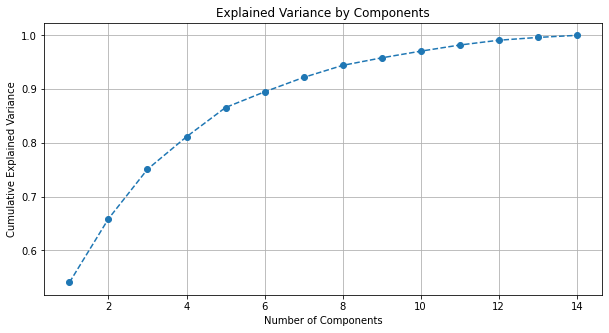

In [55]:
# Check the Variance to choose the number of needed components
plt.figure(figsize=(10,5))
plt.plot(range(1,15),ieq_pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

## so 4 components 

In [56]:
# Fit the PCA to the dataset
pca = PCA(n_components=4)
pca.fit(ieq2)

# Check the actuall explained_variance_ratio
pca.explained_variance_ratio_.cumsum()

## Since the first 2 pc already covers 65.86% variance
## we can do with the first two only

array([0.54024788, 0.65868894, 0.75085293, 0.811295  ])

In [62]:
# Fit the PCA to the dataset
pca = PCA(n_components=2)
pca.fit(ieq2)

# Build a new dataframe
X_pca = pd.DataFrame(pca.transform(ieq2),columns = ['PC1', 'PC2'])

In [65]:
# Join the grouping varibles back with the newly generatied pcs
ieq3 = ieq1.iloc[:,:7].join(X_pca)
ieq3

Country Name_x Country Code  ...       PC1       PC2
0            Angola          AGO  ...  4.786057 -1.464679
1            Angola          AGO  ...  4.787449 -1.478420
2            Angola          AGO  ...  4.360214 -1.695607
3            Angola          AGO  ...  3.651906 -1.346309
4            Angola          AGO  ...  3.637312 -1.368169
...             ...          ...  ...       ...       ...
3092       Zimbabwe          ZWE  ...  1.923870 -0.593068
3093       Zimbabwe          ZWE  ...  1.925610 -0.592030
3094       Zimbabwe          ZWE  ...  2.243905 -0.297342
3095       Zimbabwe          ZWE  ...  1.903431 -0.827129
3096       Zimbabwe          ZWE  ...  1.888251 -0.768192

[3097 rows x 9 columns]

In [ ]:
# Create a loading dataframe to check at the weighting for all indicators per pc
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=ieq1.iloc[:,3:].columns)
loadings

PC1       PC2
Women Business and the Law Index Score (scale 1...  0.024616  0.367739
pol_gen                                            -0.325419 -0.125723
cddrst_soc                                         -0.073775 -0.235392
hosrst_soc                                         -0.067428 -0.409749
just_pbadm                                         -0.320798 -0.025900
free_acexp                                         -0.292791 -0.326744
free_rel                                           -0.248050 -0.452817
pow_sxo                                            -0.302441 -0.164215
exl_eco                                             0.325245 -0.312828
exl_gen                                             0.336043 -0.187821
exl_geo                                             0.309611 -0.333476
exl_pol                                             0.329028 -0.088732
exl_soc                                             0.345024 -0.184387

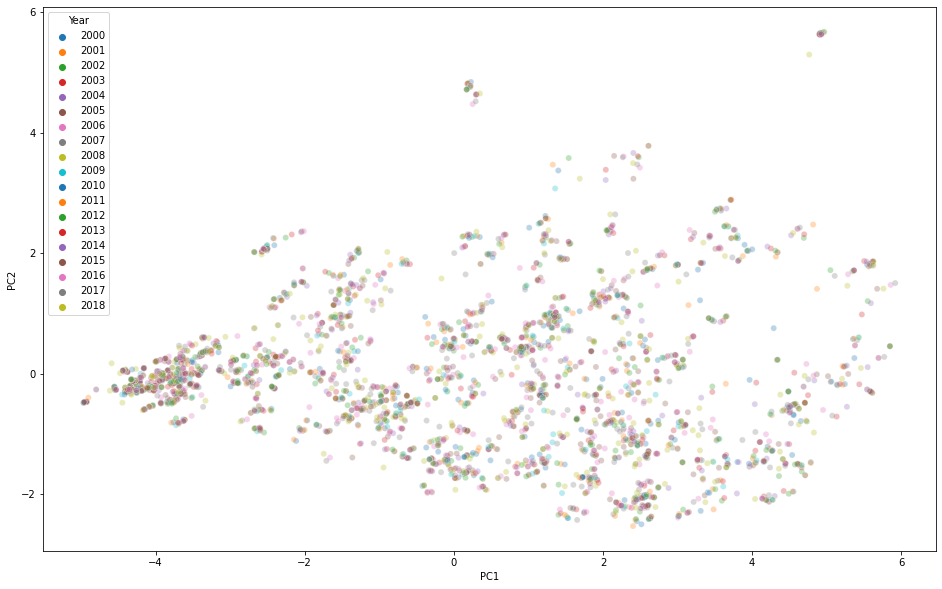

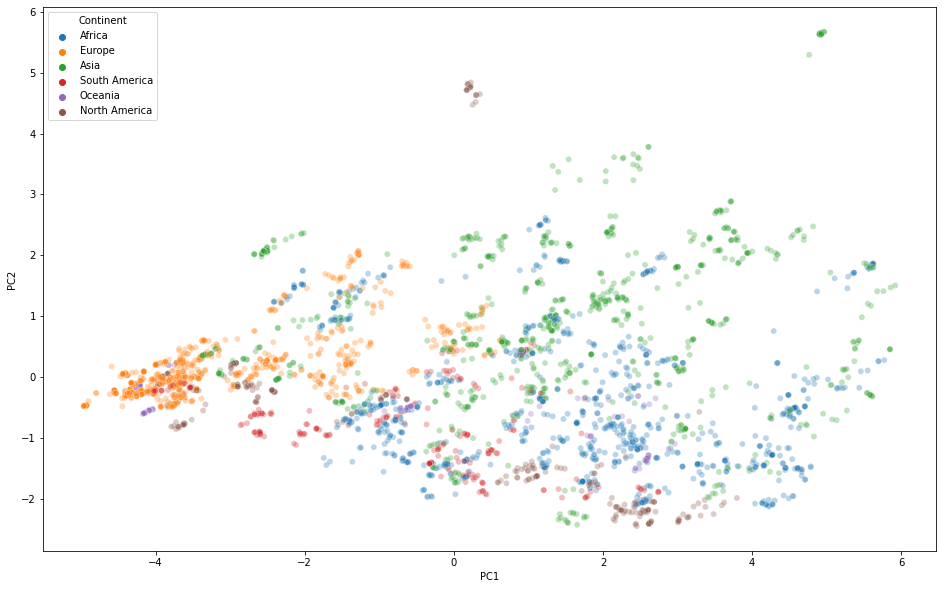

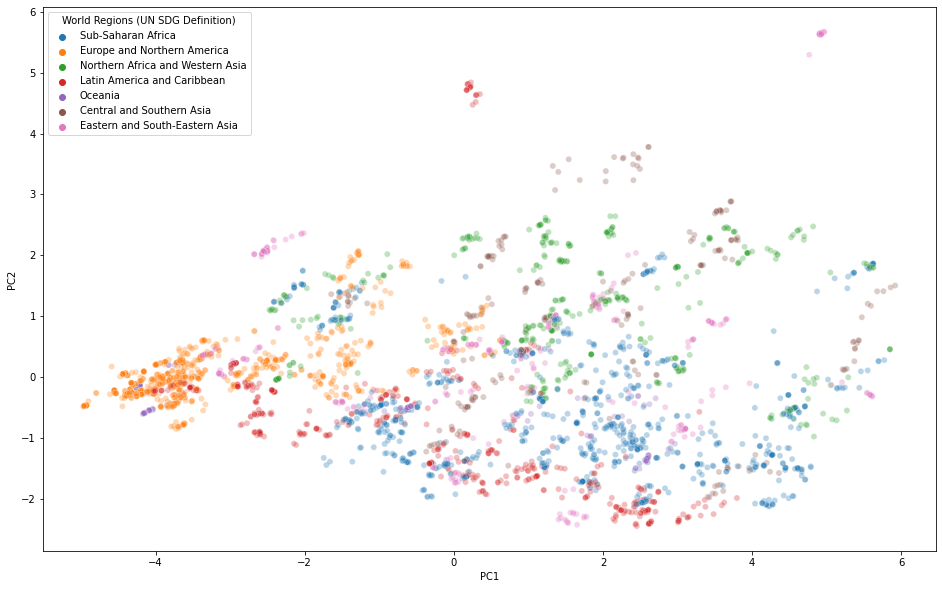

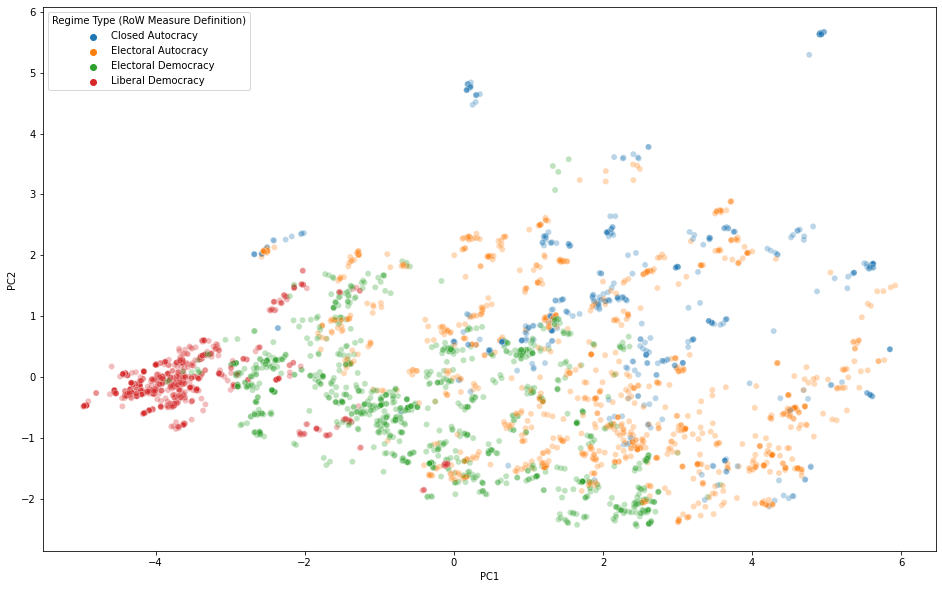

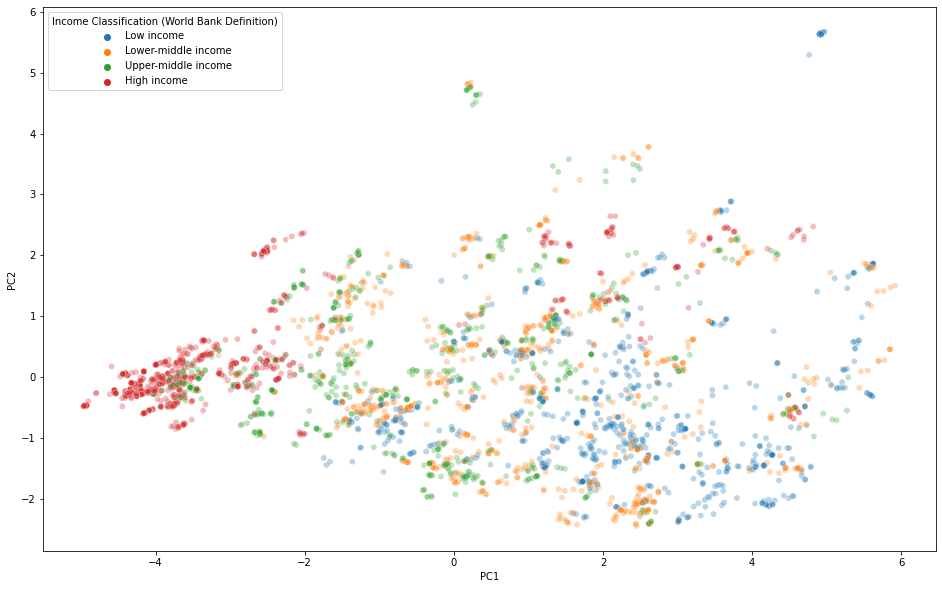

In [77]:
# Plot clustering graph group by different grouping variables
for x in range(2,7):
  plt.figure(figsize=(16,10))
  sns.scatterplot(x='PC1', y='PC2',hue=ieq3.columns[x],data=ieq3,legend="full",alpha=0.3,
                  palette=sns.color_palette('tab10', ieq3[ieq3.columns[x]].nunique()))